# 1) Background

This is our main notebook to train the model and test within our neuromodulated system with goal-driven perception with uncertain goal identity and uncertain goal validity. 

We have modified the PyTorch implementation of EB and c-EB by Sam Greydanus (https://github.com/greydanus/excitationbp/). The code script utils.py in the current directory was modified from his package based on our own network architecture. The two code scripts including *\__*init*\__*.py in the current directory and eb_linear.py in the subdirectory called functions were directly from his package. All the rest code scripts (including load_mnist_data_pair.py, define_model.py, predict_w_cEB.py, train_n_test_model.py, show_cEB_results.py, and regulate_MNIST_pair_uncertainty.py) and two ipython notebook files (including train_n_test_results.ipynb and neuromodulated_goal_driven_perception_results.ipynb) in this entire folder were written completely by us for this project. 

For an in-depth explanation of EB and c-EB, refer to [this paper](https://arxiv.org/abs/1608.00507). Their [original code](https://github.com/jimmie33/Caffe-ExcitationBP) of EB and c-EB is in Caffe.

This ipython notebook was completely written by us, who are anonymous authors of the submitted paper under review.

In [1]:
import torch
import numpy as np
import os, sys, copy ; sys.path.append('..')
from train_n_test_model import train_model
from predict_w_cEB import get_each_ceb_accuracy
from show_cEB_results import print_all_overall_stats, show_cEB_example
from regulate_MNIST_pair_uncertainty import MNIST_uncertainty_task, plot_MNIST_uncertainty, average_probs

reseed = lambda: np.random.seed(seed=1) ; ms = torch.manual_seed(1) # for reproducibility
reseed()

if torch.cuda.is_available():
    useCuda = True
else:
    useCuda = False

print(useCuda)

True


# 2) Train the model

In [2]:
model, dataloader = train_model(total_steps = 4400,test_every = 200,test_pair_num = 2000,toTest = False)


Start to train 4400 steps, each with 256 all-combination pairs.


# 4) Neuromodulated goal-driven perception with uncertainties
Part 4 directly follows Part 2. Part 3, which is independent of Part 4, is in the other ipython notebook file named train_n_test_results.ipynb in the same directory.

In [3]:
ACH_CORRECT=1.20
ACH_INCORRECT=0.85
NE_INCORRECT=1.10
NE_CORRECT=0.85
trialRange=30
trialInterval=400
num_considered=10
num_threshold=8
hasAChLesion=False
hasNELesion=True

## 4.1: Single Valid Cue
Randomly change trial interval within the range (200+/-20) and have a single valid cue for each cue switch, and use one of the validity options: 0.99, 0.85, 0.70

In [4]:
alterValid=False

### 4.1.1: validity_choices=0.99

A cue was randomly picked among integers 0~3 (i.e. even, odd, low, high respectively) every 400+/-30 trials for 10 times.
The cue validity was randomly selected among 0.99 in each trial.
28/4035 = 0.7% trials occurred when the predicted digit matched the cued digit but the cue was invalid
1664/4035 = 41.2% trials occurred when the predicted digit did not match the cued digit.
    419/4035 trials occurred when the predicted digit did not match the guess-target digit.
    1384/4035 trials occurred when the guess-target digit did not match the cued digit, i.e. when the guessed action was wrong.
2343/4035 = 58.1% trials occurred when the predicted digit matches the major cued digit and is valid
0/4035 = 0.0% trials occurred when the predicted digit matches the minor cued digit and is valid
Lag length for stable prediction of each major cue is: [ 21  50  46  73  98 129 282 426 387 369], and mean of lag length (excluding consistently same cue) is 206.66666666666666


/home/xinyunz5/.local/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


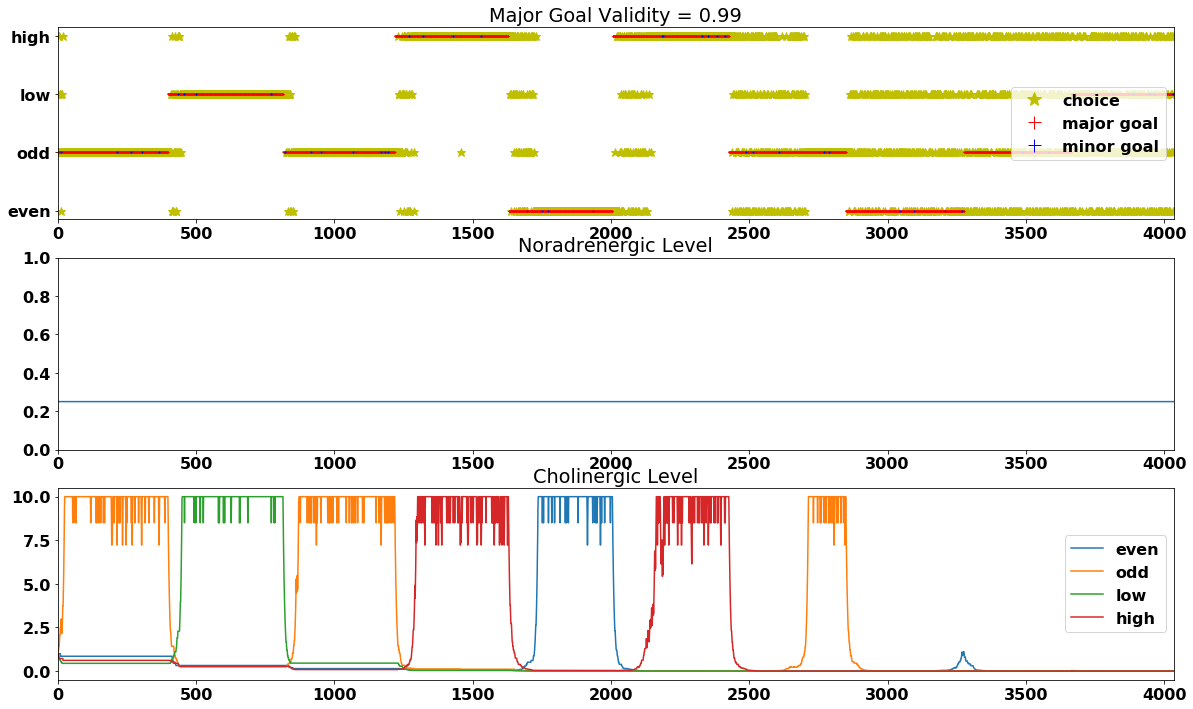

In [5]:
# trialRange+/-30 and single valid cue (1) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_99_1 = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=0.99,ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold,previous_cues=np.array([1,2,1,3,0,3,1,0,1,2]),hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=0.99)


A cue was randomly picked among integers 0~3 (i.e. even, odd, low, high respectively) every 400+/-30 trials for 10 times.
The cue validity was randomly selected among 0.99 in each trial.
22/4035 = 0.5% trials occurred when the predicted digit matched the cued digit but the cue was invalid
1736/4035 = 43.0% trials occurred when the predicted digit did not match the cued digit.
    373/4035 trials occurred when the predicted digit did not match the guess-target digit.
    1510/4035 trials occurred when the guess-target digit did not match the cued digit, i.e. when the guessed action was wrong.
2277/4035 = 56.4% trials occurred when the predicted digit matches the major cued digit and is valid
0/4035 = 0.0% trials occurred when the predicted digit matches the minor cued digit and is valid
Lag length for stable prediction of each major cue is: [ 19  25  22  57 118 229 362 426 387  35], and mean of lag length (excluding consistently same cue) is 184.55555555555554


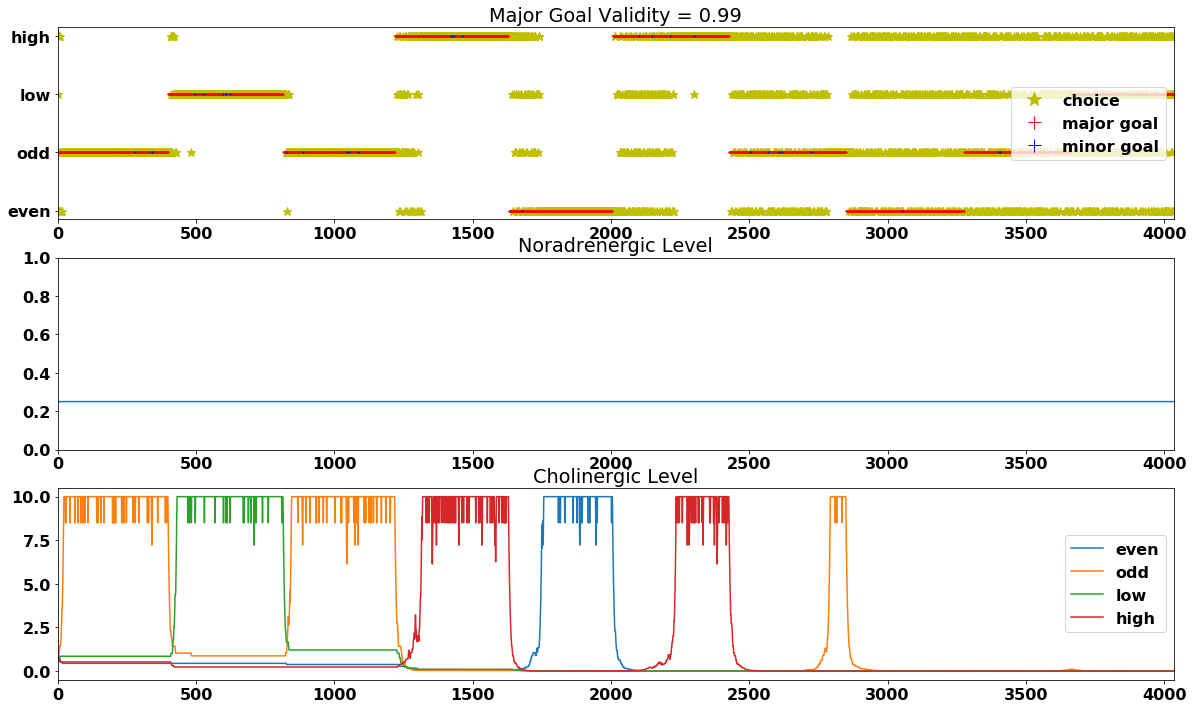

In [6]:
# trialRange+/-30 and single valid cue (2) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_99_2 = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=0.99,ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold, previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=0.99)


A cue was randomly picked among integers 0~3 (i.e. even, odd, low, high respectively) every 400+/-30 trials for 10 times.
The cue validity was randomly selected among 0.99 in each trial.
24/4035 = 0.6% trials occurred when the predicted digit matched the cued digit but the cue was invalid
1850/4035 = 45.8% trials occurred when the predicted digit did not match the cued digit.
    399/4035 trials occurred when the predicted digit did not match the guess-target digit.
    1616/4035 trials occurred when the guess-target digit did not match the cued digit, i.e. when the guessed action was wrong.
2161/4035 = 53.6% trials occurred when the predicted digit matches the major cued digit and is valid
0/4035 = 0.0% trials occurred when the predicted digit matches the minor cued digit and is valid
Lag length for stable prediction of each major cue is: [ 32  52  47 115 133 193 422 426 387 369], and mean of lag length (excluding consistently same cue) is 238.22222222222223


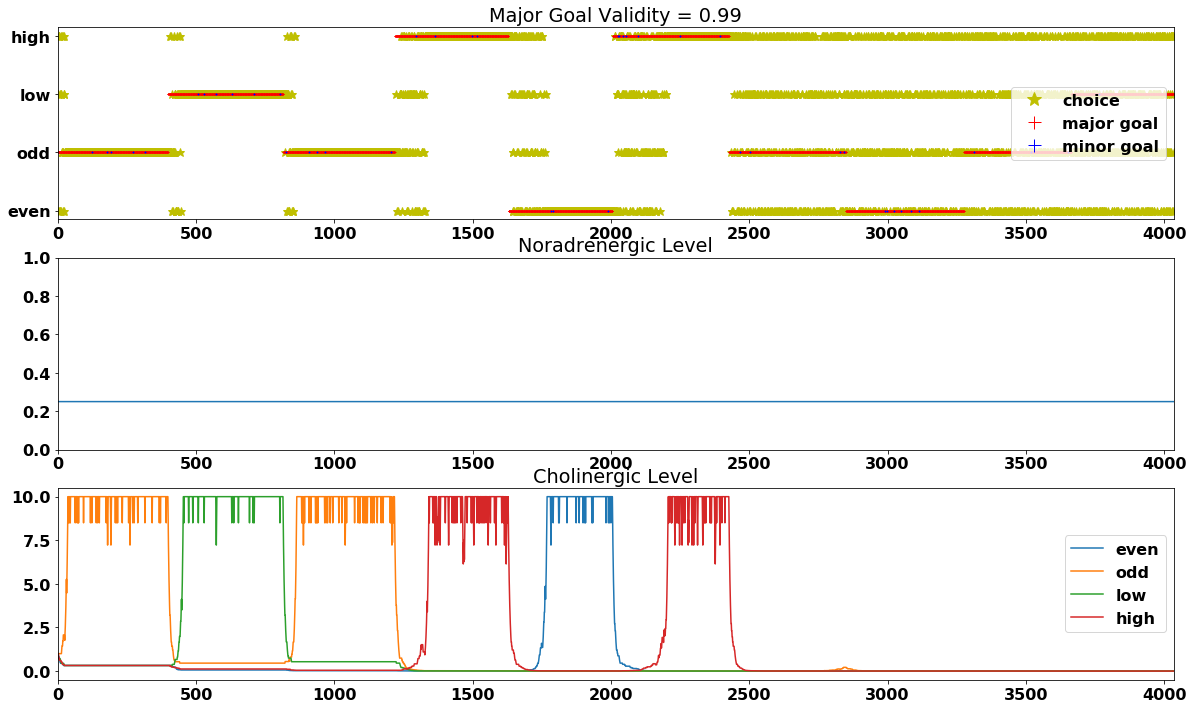

In [7]:
# trialRange+/-30 and single valid cue (3) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_99_3 = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=0.99,ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold, previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=0.99)


A cue was randomly picked among integers 0~3 (i.e. even, odd, low, high respectively) every 400+/-30 trials for 10 times.
The cue validity was randomly selected among 0.99 in each trial.
25/4035 = 0.6% trials occurred when the predicted digit matched the cued digit but the cue was invalid
1215/4035 = 30.1% trials occurred when the predicted digit did not match the cued digit.
    356/4035 trials occurred when the predicted digit did not match the guess-target digit.
    953/4035 trials occurred when the guess-target digit did not match the cued digit, i.e. when the guessed action was wrong.
2795/4035 = 69.3% trials occurred when the predicted digit matches the major cued digit and is valid
0/4035 = 0.0% trials occurred when the predicted digit matches the minor cued digit and is valid
Lag length for stable prediction of each major cue is: [ 28  35  22  58 101  94 161 233 228 369], and mean of lag length (excluding consistently same cue) is 144.55555555555554


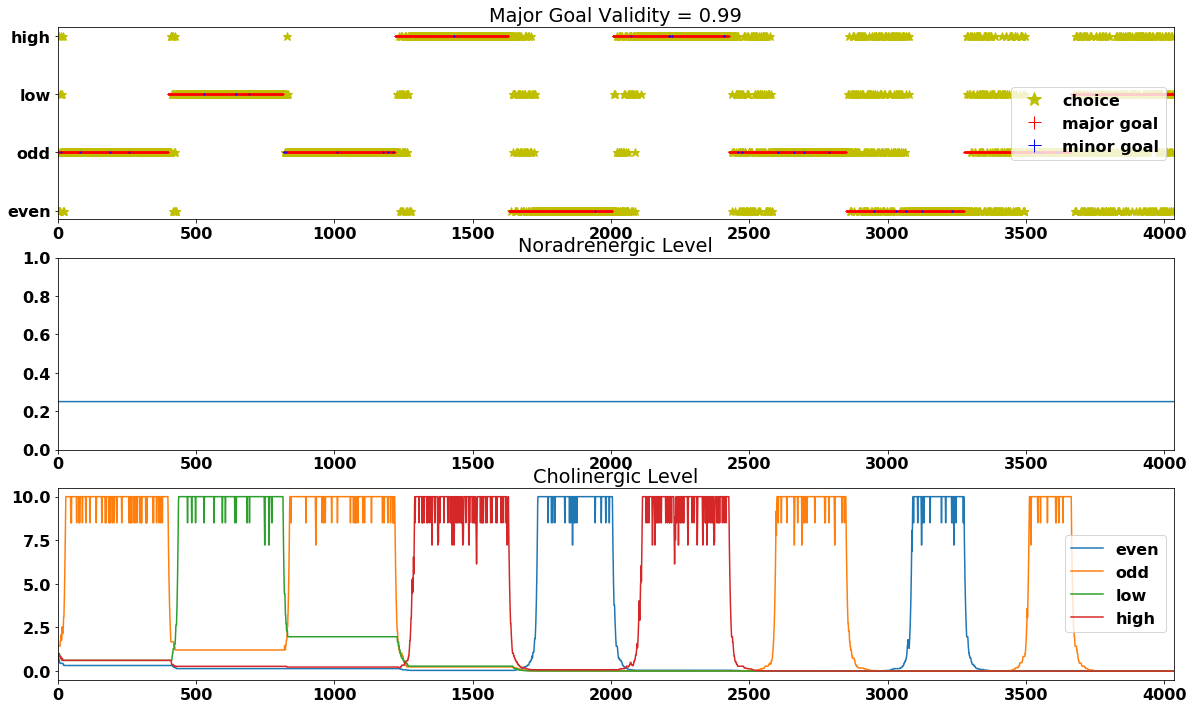

In [8]:
# trialRange+/-30 and single valid cue (4) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_99_4 = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=0.99,ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold, previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=0.99)


A cue was randomly picked among integers 0~3 (i.e. even, odd, low, high respectively) every 400+/-30 trials for 10 times.
The cue validity was randomly selected among 0.99 in each trial.
24/4035 = 0.6% trials occurred when the predicted digit matched the cued digit but the cue was invalid
1390/4035 = 34.4% trials occurred when the predicted digit did not match the cued digit.
    380/4035 trials occurred when the predicted digit did not match the guess-target digit.
    1098/4035 trials occurred when the guess-target digit did not match the cued digit, i.e. when the guessed action was wrong.
2621/4035 = 65.0% trials occurred when the predicted digit matches the major cued digit and is valid
0/4035 = 0.0% trials occurred when the predicted digit matches the minor cued digit and is valid
Lag length for stable prediction of each major cue is: [ 17  40  35  66 105 110 225 291 266 130], and mean of lag length (excluding consistently same cue) is 140.88888888888889


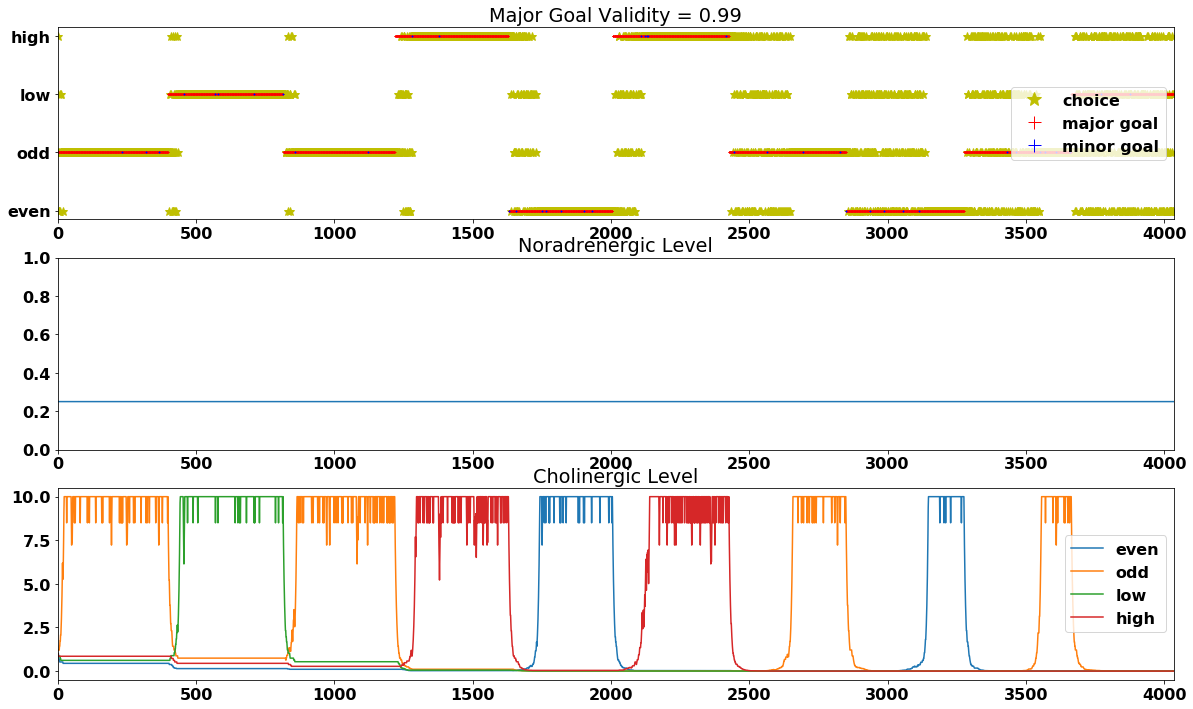

In [9]:
# trialRange+/-30 and single valid cue (5) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_99_5 = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=0.99,ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold, previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=0.99)


A cue was randomly picked among integers 0~3 (i.e. even, odd, low, high respectively) every 400+/-30 trials for 10 times.
The cue validity was randomly selected among 0.99 in each trial.
28/4035 = 0.7% trials occurred when the predicted digit matched the cued digit but the cue was invalid
1867/4035 = 46.3% trials occurred when the predicted digit did not match the cued digit.
    395/4035 trials occurred when the predicted digit did not match the guess-target digit.
    1629/4035 trials occurred when the guess-target digit did not match the cued digit, i.e. when the guessed action was wrong.
2140/4035 = 53.0% trials occurred when the predicted digit matches the major cued digit and is valid
0/4035 = 0.0% trials occurred when the predicted digit matches the minor cued digit and is valid
Lag length for stable prediction of each major cue is: [ 19  40  55  89 156 205 422 426 387 369], and mean of lag length (excluding consistently same cue) is 238.77777777777777


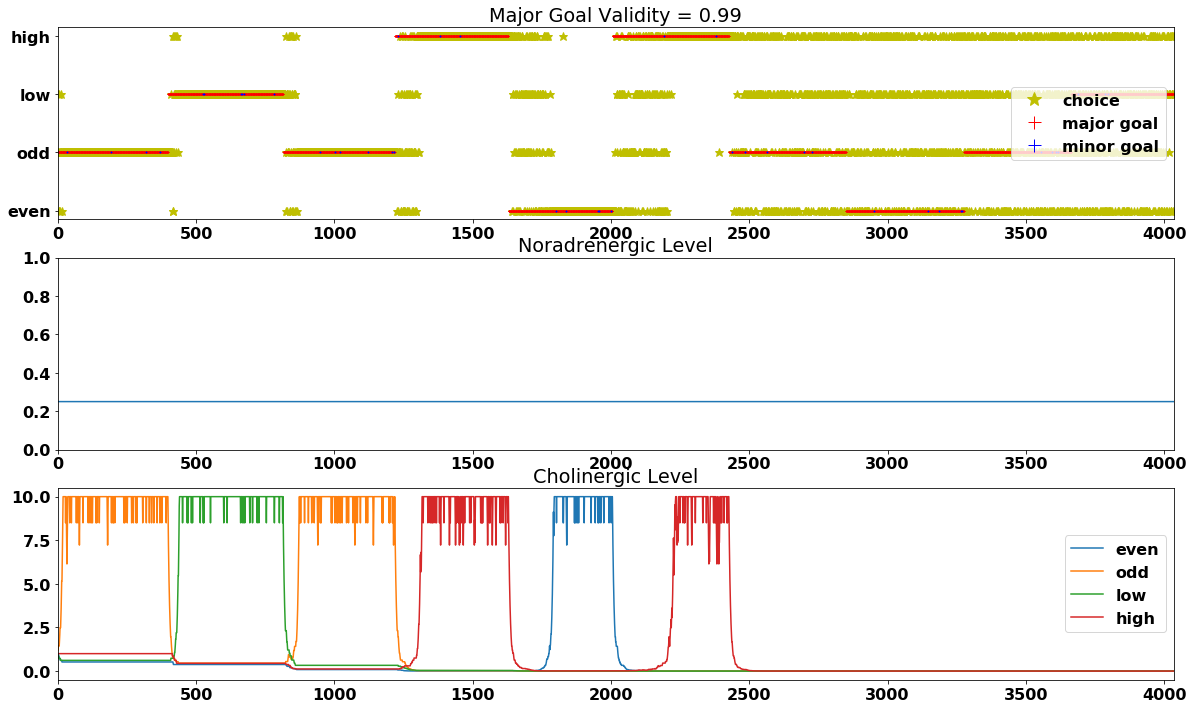

In [10]:
# trialRange+/-30 and single valid cue (6) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_99_6 = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=0.99,ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold, previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=0.99)


A cue was randomly picked among integers 0~3 (i.e. even, odd, low, high respectively) every 400+/-30 trials for 10 times.
The cue validity was randomly selected among 0.99 in each trial.
23/4035 = 0.6% trials occurred when the predicted digit matched the cued digit but the cue was invalid
1728/4035 = 42.8% trials occurred when the predicted digit did not match the cued digit.
    427/4035 trials occurred when the predicted digit did not match the guess-target digit.
    1443/4035 trials occurred when the guess-target digit did not match the cued digit, i.e. when the guessed action was wrong.
2284/4035 = 56.6% trials occurred when the predicted digit matches the major cued digit and is valid
0/4035 = 0.0% trials occurred when the predicted digit matches the minor cued digit and is valid
Lag length for stable prediction of each major cue is: [ 26  35  26  74 105 150 171 426 387 369], and mean of lag length (excluding consistently same cue) is 193.66666666666666


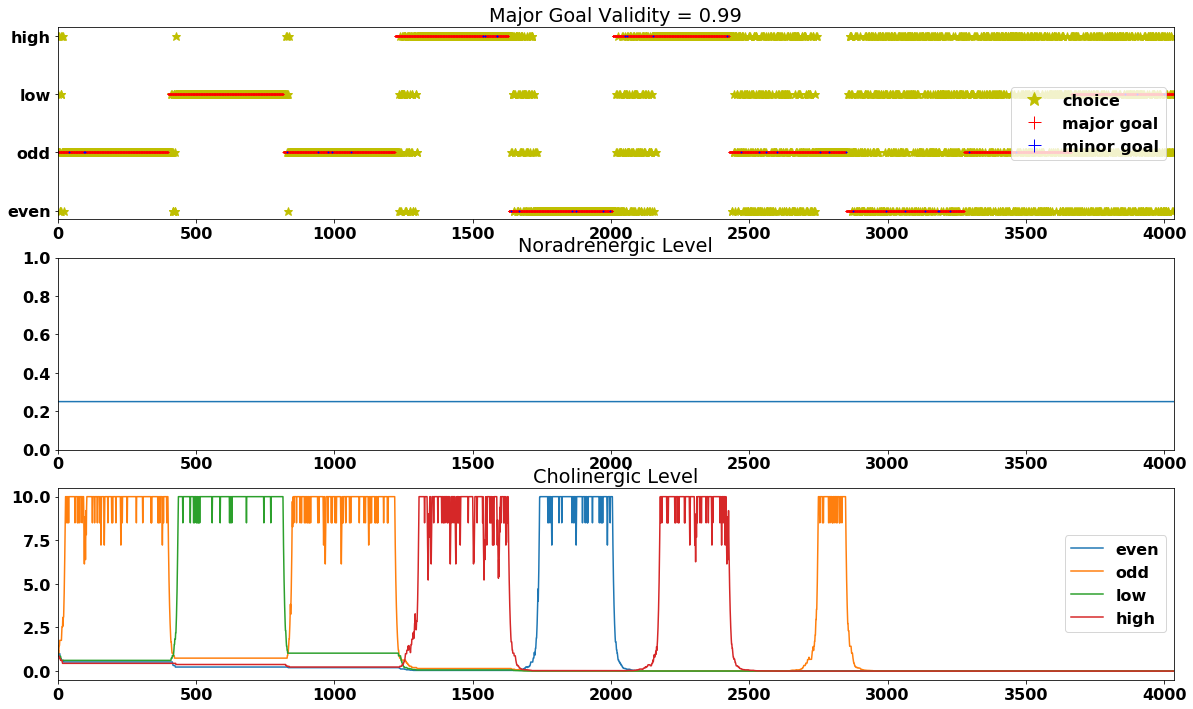

In [11]:
# trialRange+/-30 and single valid cue (7) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_99_7 = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=0.99,ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold, previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=0.99)


A cue was randomly picked among integers 0~3 (i.e. even, odd, low, high respectively) every 400+/-30 trials for 10 times.
The cue validity was randomly selected among 0.99 in each trial.
14/4035 = 0.3% trials occurred when the predicted digit matched the cued digit but the cue was invalid
2155/4035 = 53.4% trials occurred when the predicted digit did not match the cued digit.
    370/4035 trials occurred when the predicted digit did not match the guess-target digit.
    1976/4035 trials occurred when the guess-target digit did not match the cued digit, i.e. when the guessed action was wrong.
1866/4035 = 46.2% trials occurred when the predicted digit matches the major cued digit and is valid
0/4035 = 0.0% trials occurred when the predicted digit matches the minor cued digit and is valid
Lag length for stable prediction of each major cue is: [ 22  41  56 180 318 408 422 426 387 369], and mean of lag length (excluding consistently same cue) is 289.6666666666667


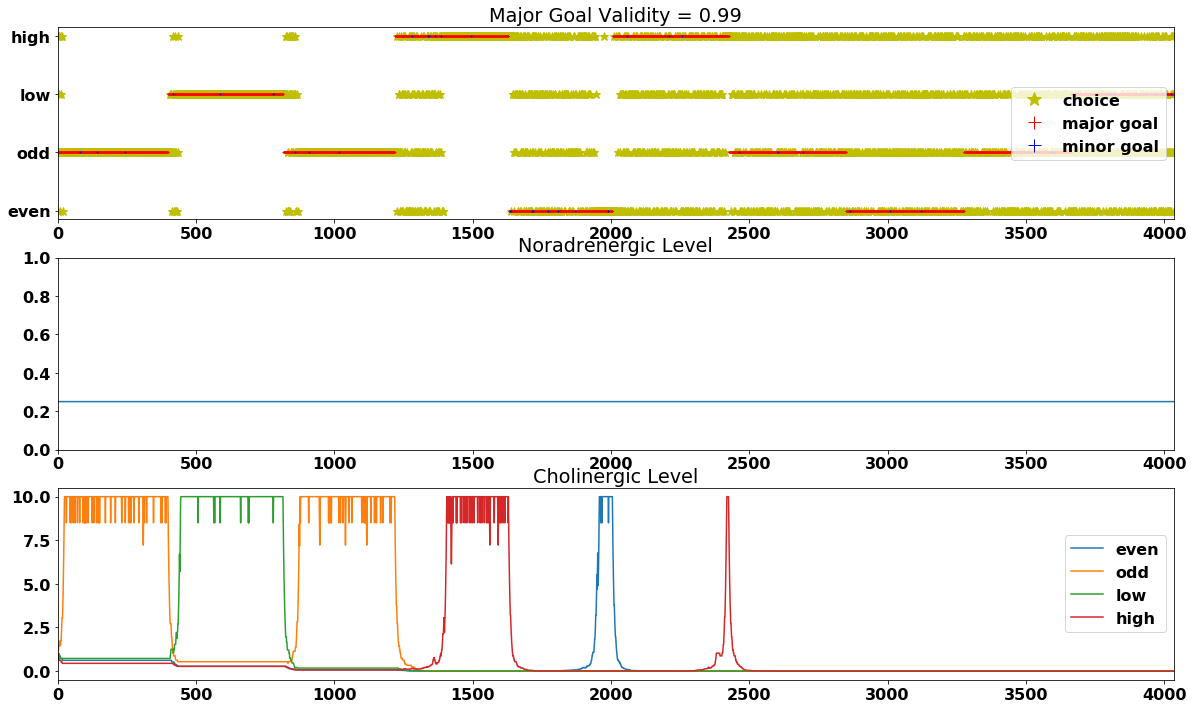

In [12]:
# trialRange+/-30 and single valid cue (8) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_99_8 = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=0.99,ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold, previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=0.99)


A cue was randomly picked among integers 0~3 (i.e. even, odd, low, high respectively) every 400+/-30 trials for 10 times.
The cue validity was randomly selected among 0.99 in each trial.
30/4035 = 0.7% trials occurred when the predicted digit matched the cued digit but the cue was invalid
1138/4035 = 28.2% trials occurred when the predicted digit did not match the cued digit.
    398/4035 trials occurred when the predicted digit did not match the guess-target digit.
    836/4035 trials occurred when the guess-target digit did not match the cued digit, i.e. when the guessed action was wrong.
2867/4035 = 71.1% trials occurred when the predicted digit matches the major cued digit and is valid
0/4035 = 0.0% trials occurred when the predicted digit matches the minor cued digit and is valid
Lag length for stable prediction of each major cue is: [ 19  42  45  83  40  50  63 172 166 369], and mean of lag length (excluding consistently same cue) is 114.44444444444444


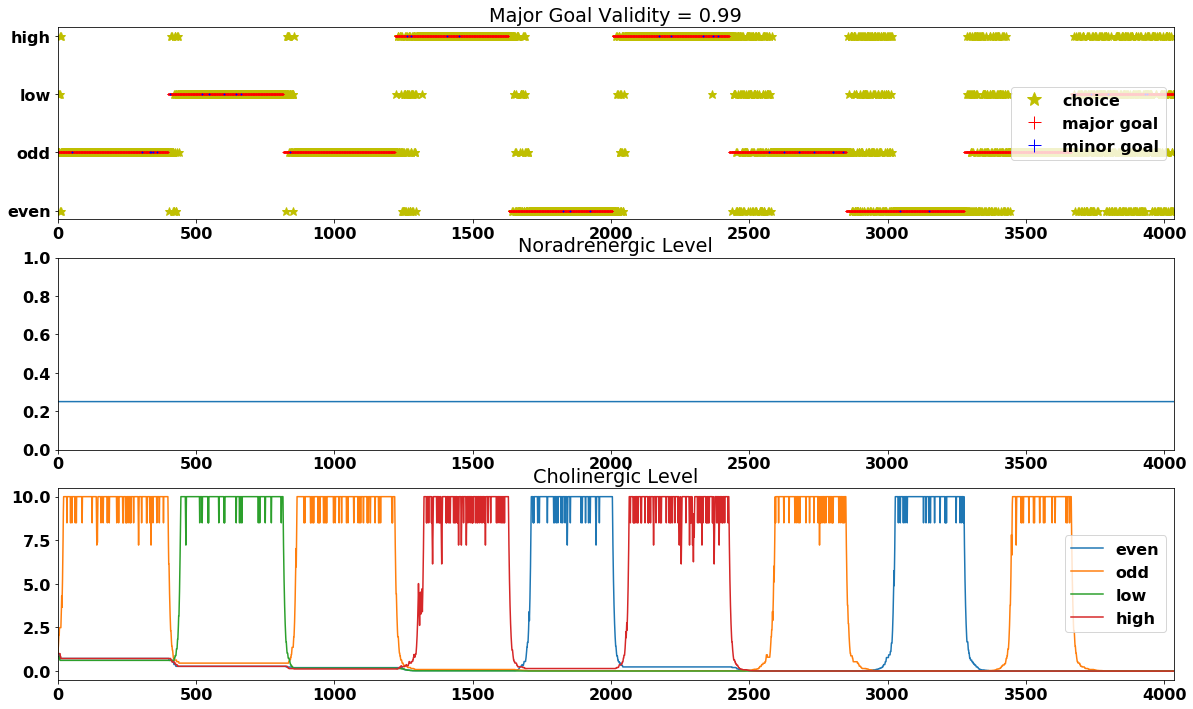

In [13]:
# trialRange+/-30 and single valid cue (9) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_99_9 = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=0.99,ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold, previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=0.99)


A cue was randomly picked among integers 0~3 (i.e. even, odd, low, high respectively) every 400+/-30 trials for 10 times.
The cue validity was randomly selected among 0.99 in each trial.
21/4035 = 0.5% trials occurred when the predicted digit matched the cued digit but the cue was invalid
2267/4035 = 56.2% trials occurred when the predicted digit did not match the cued digit.
    364/4035 trials occurred when the predicted digit did not match the guess-target digit.
    2087/4035 trials occurred when the guess-target digit did not match the cued digit, i.e. when the guessed action was wrong.
1747/4035 = 43.3% trials occurred when the predicted digit matches the major cued digit and is valid
0/4035 = 0.0% trials occurred when the predicted digit matches the minor cued digit and is valid
Lag length for stable prediction of each major cue is: [ 27  58  85 213 350 420 422 426 387 369], and mean of lag length (excluding consistently same cue) is 303.3333333333333


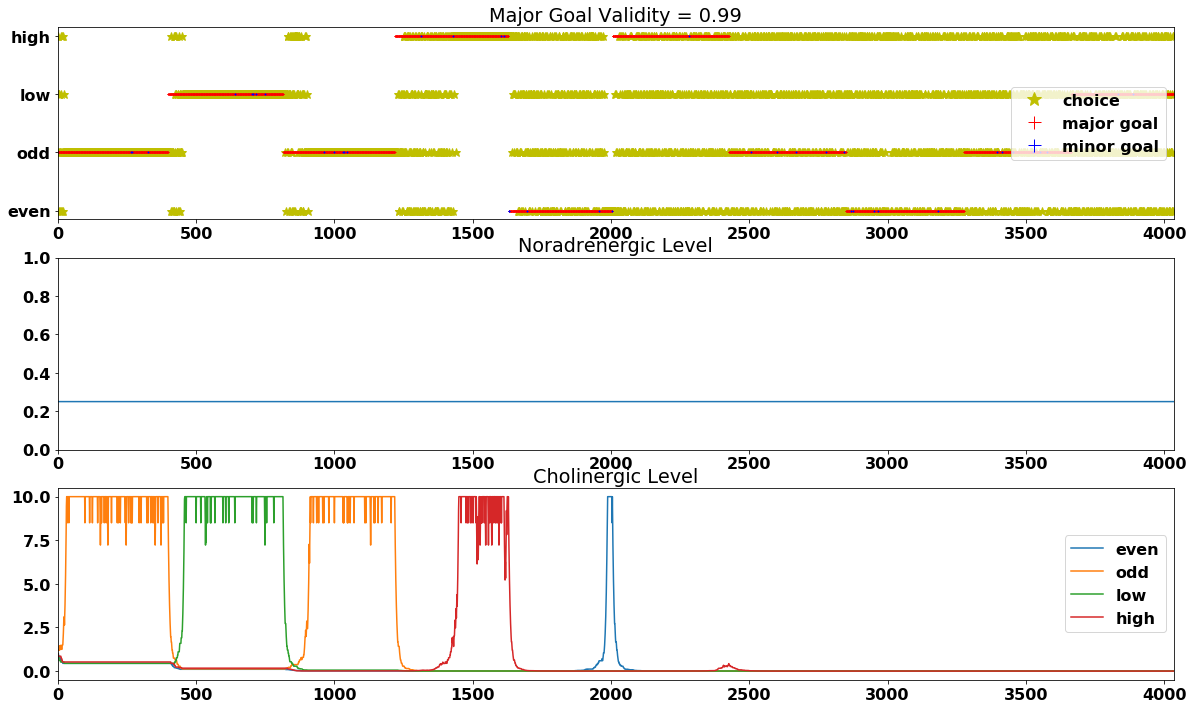

In [14]:
# trialRange+/-30 and single valid cue (10) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_99_10 = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=0.99,ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold, previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=0.99)


In [15]:
all_99_case_probs = [all_prob_99_1,all_prob_99_2,all_prob_99_3,all_prob_99_4,all_prob_99_5,\
                     all_prob_99_6,all_prob_99_7,all_prob_99_8,all_prob_99_9,all_prob_99_10]
averages_99 = average_probs(all_99_case_probs)


Average lag length is: 205
Average prob pred wrong, prob pred cue A valid, prob pred cue B valid, prob pred cue A invalid,
    prob guess not match cue, prob pred not match guess, prob match cue A invalid alter: 
[0.4215613382899628, 0.5725154894671624, 0.0, 0.005923172242874844, 0.36014869888475837, 0.09618339529120198, 0.0]


### 4.1.2: validity_choices=0.85

A cue was randomly picked among integers 0~3 (i.e. even, odd, low, high respectively) every 400+/-30 trials for 10 times.
The cue validity was randomly selected among 0.85 in each trial.
292/4035 = 7.2% trials occurred when the predicted digit matched the cued digit but the cue was invalid
2197/4035 = 54.4% trials occurred when the predicted digit did not match the cued digit.
    363/4035 trials occurred when the predicted digit did not match the guess-target digit.
    2013/4035 trials occurred when the guess-target digit did not match the cued digit, i.e. when the guessed action was wrong.
1546/4035 = 38.3% trials occurred when the predicted digit matches the major cued digit and is valid
0/4035 = 0.0% trials occurred when the predicted digit matches the minor cued digit and is valid
Lag length for stable prediction of each major cue is: [ 18  30  60 202 337 420 422 426 387 369], and mean of lag length (excluding consistently same cue) is 294.77777777777777


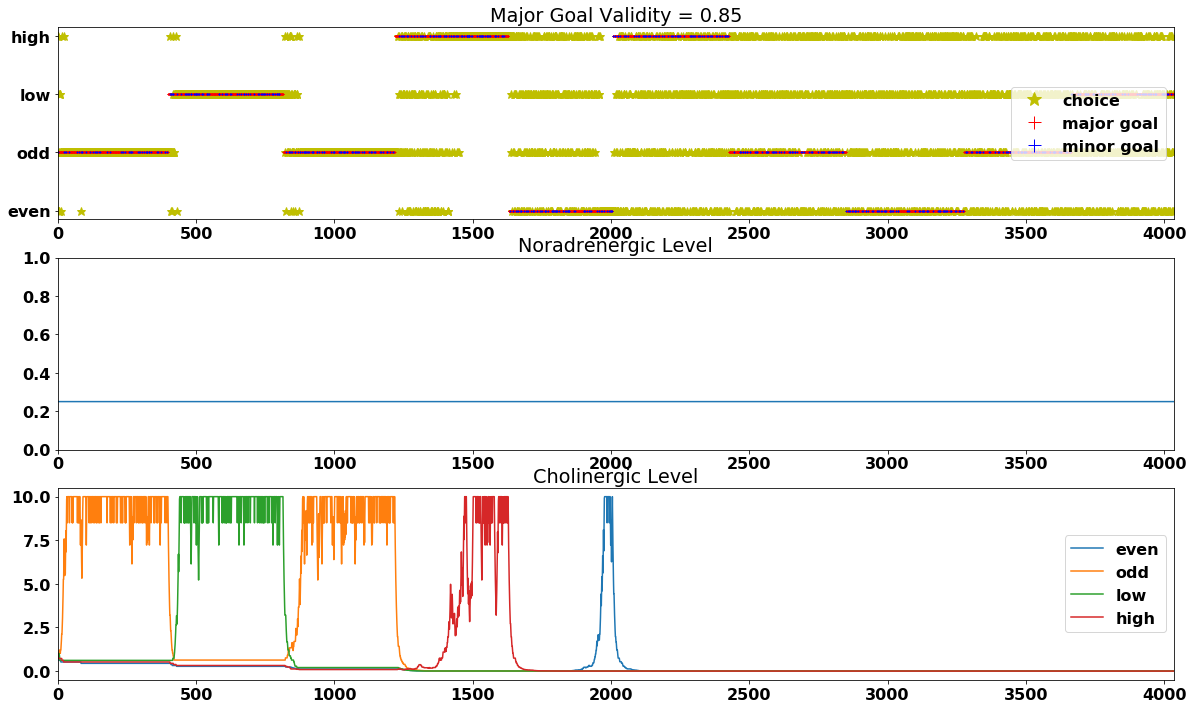

In [16]:
# trialRange+/-30 and single valid cue (1) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_85_1 = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=0.85,ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold, previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=0.85)


A cue was randomly picked among integers 0~3 (i.e. even, odd, low, high respectively) every 400+/-30 trials for 10 times.
The cue validity was randomly selected among 0.85 in each trial.
295/4035 = 7.3% trials occurred when the predicted digit matched the cued digit but the cue was invalid
1975/4035 = 48.9% trials occurred when the predicted digit did not match the cued digit.
    392/4035 trials occurred when the predicted digit did not match the guess-target digit.
    1730/4035 trials occurred when the guess-target digit did not match the cued digit, i.e. when the guessed action was wrong.
1765/4035 = 43.7% trials occurred when the predicted digit matches the major cued digit and is valid
0/4035 = 0.0% trials occurred when the predicted digit matches the minor cued digit and is valid
Lag length for stable prediction of each major cue is: [ 18  27  45  97 154 420 422 426 387 369], and mean of lag length (excluding consistently same cue) is 260.77777777777777


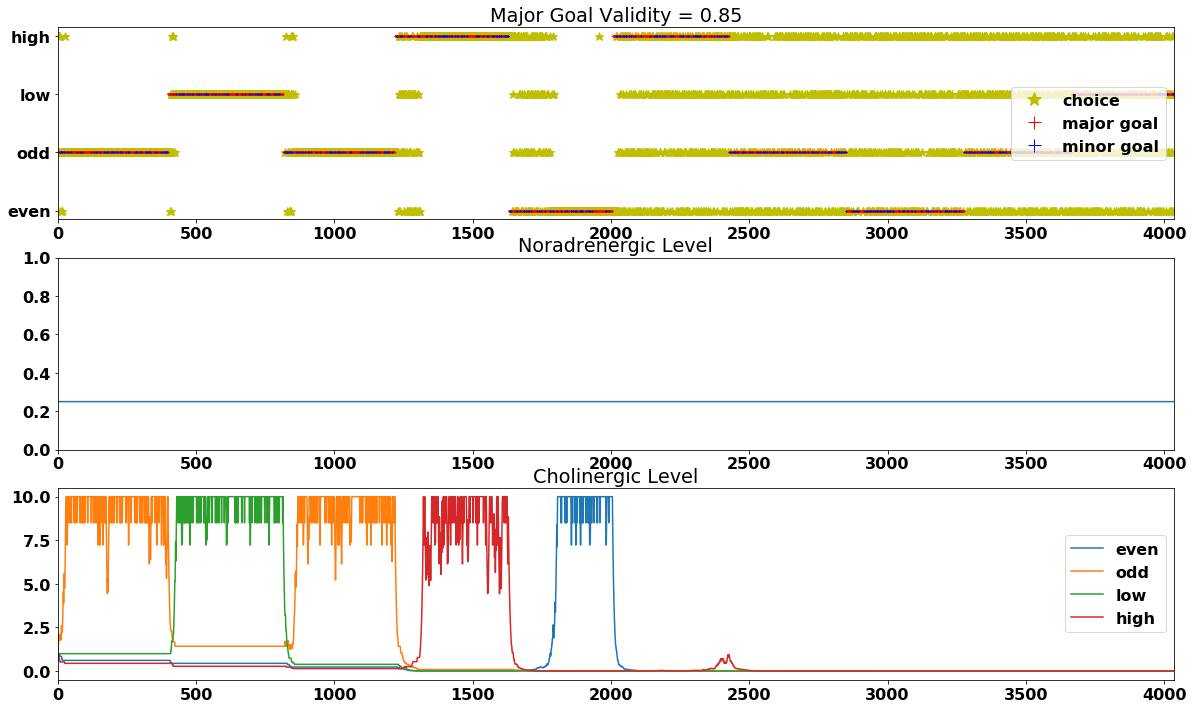

In [17]:
# trialRange+/-30 and single valid cue (2) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_85_2 = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=0.85,ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold, previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=0.85)


A cue was randomly picked among integers 0~3 (i.e. even, odd, low, high respectively) every 400+/-30 trials for 10 times.
The cue validity was randomly selected among 0.85 in each trial.
330/4035 = 8.2% trials occurred when the predicted digit matched the cued digit but the cue was invalid
2015/4035 = 49.9% trials occurred when the predicted digit did not match the cued digit.
    355/4035 trials occurred when the predicted digit did not match the guess-target digit.
    1819/4035 trials occurred when the guess-target digit did not match the cued digit, i.e. when the guessed action was wrong.
1690/4035 = 41.9% trials occurred when the predicted digit matches the major cued digit and is valid
0/4035 = 0.0% trials occurred when the predicted digit matches the minor cued digit and is valid
Lag length for stable prediction of each major cue is: [ 27  53  76 158 206 406 422 426 172 354], and mean of lag length (excluding consistently same cue) is 252.55555555555554


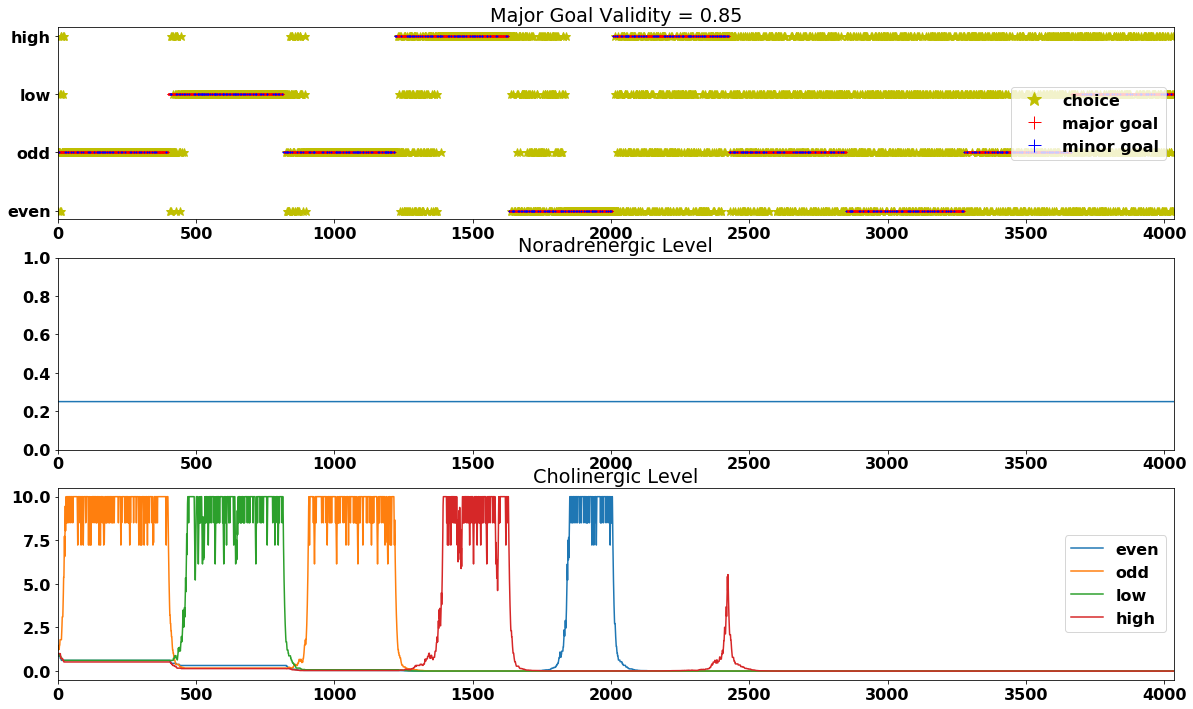

In [18]:
# trialRange+/-30 and single valid cue (3) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_85_3 = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=0.85,ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold, previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=0.85)


A cue was randomly picked among integers 0~3 (i.e. even, odd, low, high respectively) every 400+/-30 trials for 10 times.
The cue validity was randomly selected among 0.85 in each trial.
341/4035 = 8.5% trials occurred when the predicted digit matched the cued digit but the cue was invalid
1929/4035 = 47.8% trials occurred when the predicted digit did not match the cued digit.
    370/4035 trials occurred when the predicted digit did not match the guess-target digit.
    1711/4035 trials occurred when the guess-target digit did not match the cued digit, i.e. when the guessed action was wrong.
1765/4035 = 43.7% trials occurred when the predicted digit matches the major cued digit and is valid
0/4035 = 0.0% trials occurred when the predicted digit matches the minor cued digit and is valid
Lag length for stable prediction of each major cue is: [ 19  28  64  67 158 340 422 426 387 369], and mean of lag length (excluding consistently same cue) is 251.22222222222223


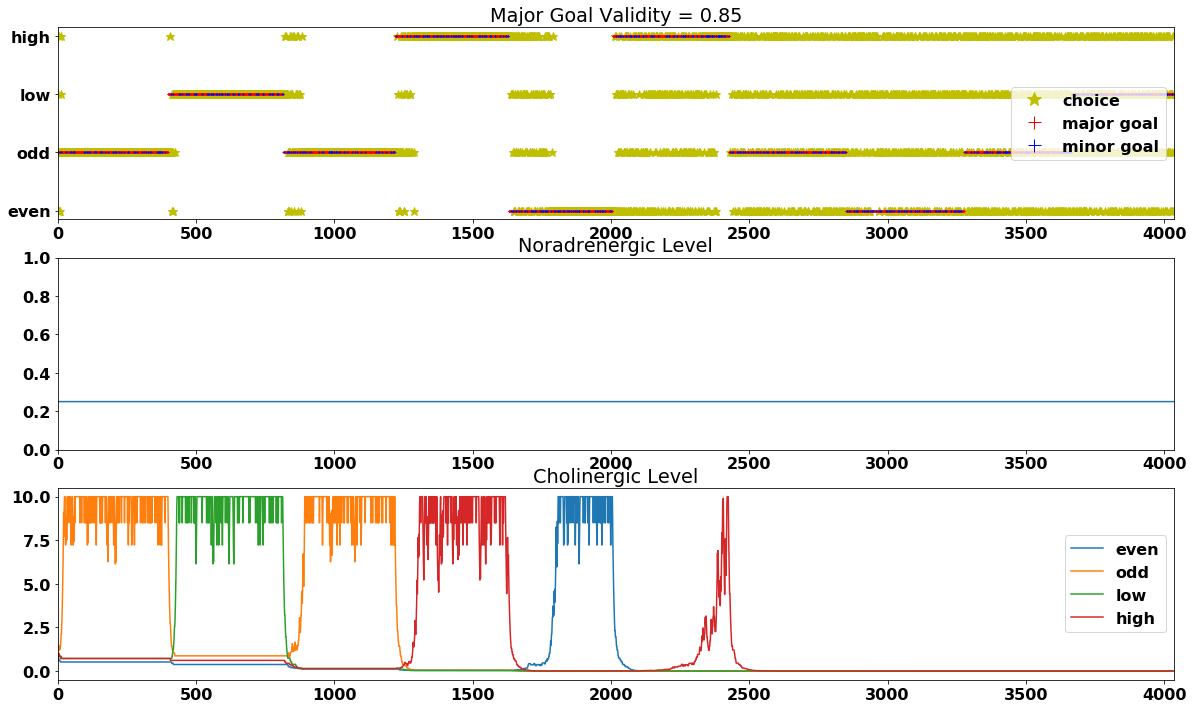

In [19]:
# trialRange+/-30 and single valid cue (4) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_85_4 = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=0.85,ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold, previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=0.85)


A cue was randomly picked among integers 0~3 (i.e. even, odd, low, high respectively) every 400+/-30 trials for 10 times.
The cue validity was randomly selected among 0.85 in each trial.
240/4035 = 5.9% trials occurred when the predicted digit matched the cued digit but the cue was invalid
2447/4035 = 60.6% trials occurred when the predicted digit did not match the cued digit.
    352/4035 trials occurred when the predicted digit did not match the guess-target digit.
    2307/4035 trials occurred when the guess-target digit did not match the cued digit, i.e. when the guessed action was wrong.
1348/4035 = 33.4% trials occurred when the predicted digit matches the major cued digit and is valid
0/4035 = 0.0% trials occurred when the predicted digit matches the minor cued digit and is valid
Lag length for stable prediction of each major cue is: [ 27  73 122 410 375 420 422 426 387 369], and mean of lag length (excluding consistently same cue) is 333.77777777777777


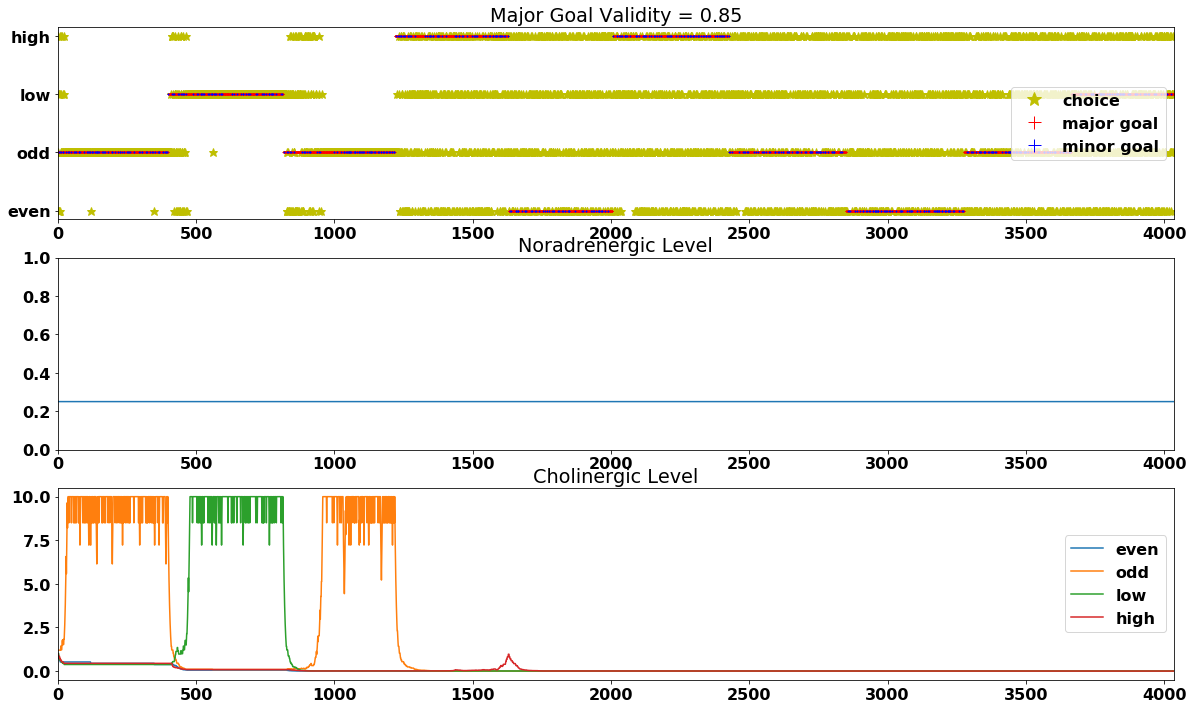

In [20]:
# trialRange+/-30 and single valid cue (5) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_85_5 = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=0.85,ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold, previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=0.85)


A cue was randomly picked among integers 0~3 (i.e. even, odd, low, high respectively) every 400+/-30 trials for 10 times.
The cue validity was randomly selected among 0.85 in each trial.
291/4035 = 7.2% trials occurred when the predicted digit matched the cued digit but the cue was invalid
2096/4035 = 51.9% trials occurred when the predicted digit did not match the cued digit.
    342/4035 trials occurred when the predicted digit did not match the guess-target digit.
    1913/4035 trials occurred when the guess-target digit did not match the cued digit, i.e. when the guessed action was wrong.
1648/4035 = 40.8% trials occurred when the predicted digit matches the major cued digit and is valid
0/4035 = 0.0% trials occurred when the predicted digit matches the minor cued digit and is valid
Lag length for stable prediction of each major cue is: [ 21  34  61 116 283 420 422 426 387 369], and mean of lag length (excluding consistently same cue) is 279.77777777777777


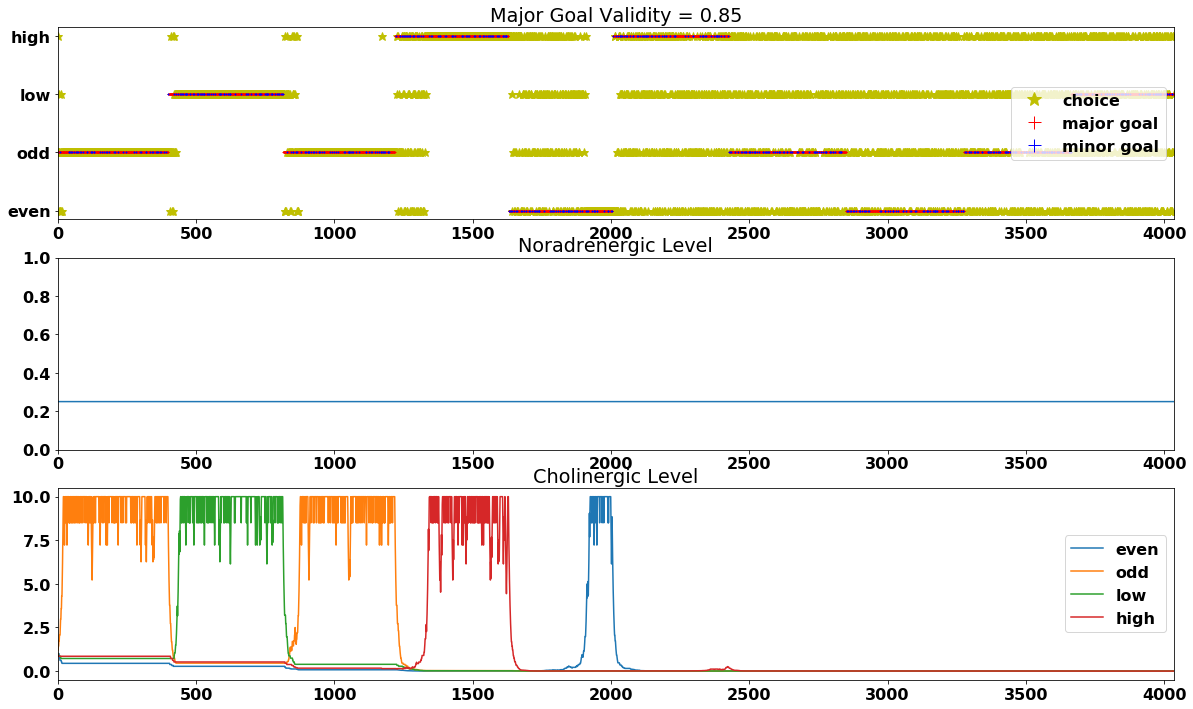

In [21]:
# trialRange+/-30 and single valid cue (6) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_85_6 = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=0.85,ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold, previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=0.85)


A cue was randomly picked among integers 0~3 (i.e. even, odd, low, high respectively) every 400+/-30 trials for 10 times.
The cue validity was randomly selected among 0.85 in each trial.
302/4035 = 7.5% trials occurred when the predicted digit matched the cued digit but the cue was invalid
2121/4035 = 52.6% trials occurred when the predicted digit did not match the cued digit.
    354/4035 trials occurred when the predicted digit did not match the guess-target digit.
    1930/4035 trials occurred when the guess-target digit did not match the cued digit, i.e. when the guessed action was wrong.
1612/4035 = 40.0% trials occurred when the predicted digit matches the major cued digit and is valid
0/4035 = 0.0% trials occurred when the predicted digit matches the minor cued digit and is valid
Lag length for stable prediction of each major cue is: [  8  37  55 193 311 420 256 426 387 369], and mean of lag length (excluding consistently same cue) is 272.6666666666667


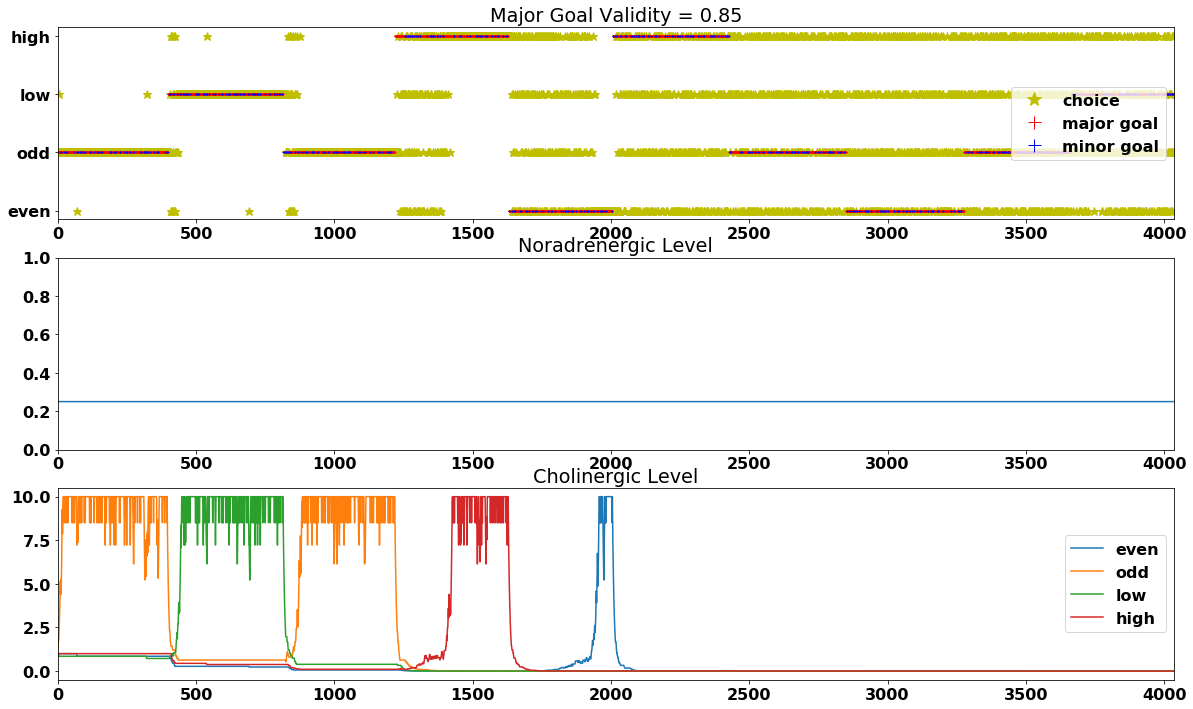

In [22]:
# trialRange+/-30 and single valid cue (7) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_85_7 = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=0.85,ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold, previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=0.85)


A cue was randomly picked among integers 0~3 (i.e. even, odd, low, high respectively) every 400+/-30 trials for 10 times.
The cue validity was randomly selected among 0.85 in each trial.
275/4035 = 6.8% trials occurred when the predicted digit matched the cued digit but the cue was invalid
2314/4035 = 57.3% trials occurred when the predicted digit did not match the cued digit.
    366/4035 trials occurred when the predicted digit did not match the guess-target digit.
    2123/4035 trials occurred when the guess-target digit did not match the cued digit, i.e. when the guessed action was wrong.
1446/4035 = 35.8% trials occurred when the predicted digit matches the major cued digit and is valid
0/4035 = 0.0% trials occurred when the predicted digit matches the minor cued digit and is valid
Lag length for stable prediction of each major cue is: [ 30  57  98 303 375 420 422 426 387 247], and mean of lag length (excluding consistently same cue) is 303.8888888888889


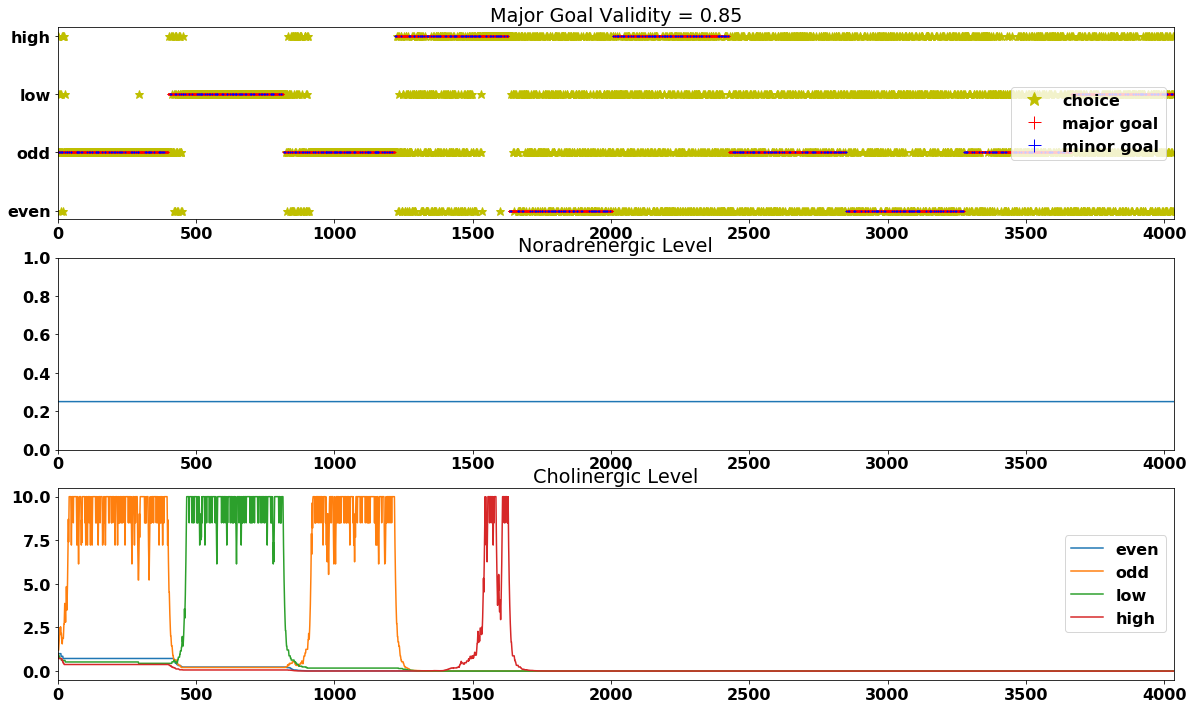

In [23]:
# trialRange+/-30 and single valid cue (8) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_85_8 = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=0.85,ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold, previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=0.85)


A cue was randomly picked among integers 0~3 (i.e. even, odd, low, high respectively) every 400+/-30 trials for 10 times.
The cue validity was randomly selected among 0.85 in each trial.
278/4035 = 6.9% trials occurred when the predicted digit matched the cued digit but the cue was invalid
2294/4035 = 56.9% trials occurred when the predicted digit did not match the cued digit.
    376/4035 trials occurred when the predicted digit did not match the guess-target digit.
    2111/4035 trials occurred when the guess-target digit did not match the cued digit, i.e. when the guessed action was wrong.
1463/4035 = 36.3% trials occurred when the predicted digit matches the major cued digit and is valid
0/4035 = 0.0% trials occurred when the predicted digit matches the minor cued digit and is valid
Lag length for stable prediction of each major cue is: [ 39  52 122 241 375 420 422 426 387 369], and mean of lag length (excluding consistently same cue) is 312.6666666666667


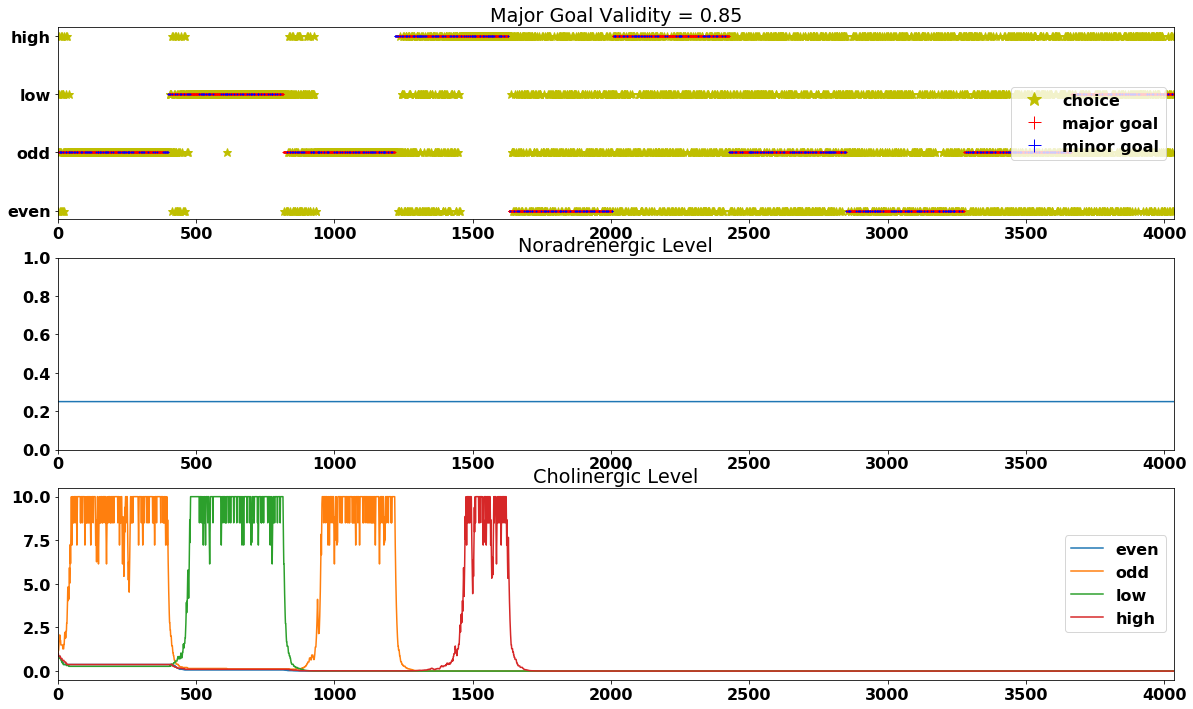

In [24]:
# trialRange+/-30 and single valid cue (9) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_85_9 = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=0.85,ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold, previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=0.85)


A cue was randomly picked among integers 0~3 (i.e. even, odd, low, high respectively) every 400+/-30 trials for 10 times.
The cue validity was randomly selected among 0.85 in each trial.
305/4035 = 7.6% trials occurred when the predicted digit matched the cued digit but the cue was invalid
1988/4035 = 49.3% trials occurred when the predicted digit did not match the cued digit.
    379/4035 trials occurred when the predicted digit did not match the guess-target digit.
    1786/4035 trials occurred when the guess-target digit did not match the cued digit, i.e. when the guessed action was wrong.
1742/4035 = 43.2% trials occurred when the predicted digit matches the major cued digit and is valid
0/4035 = 0.0% trials occurred when the predicted digit matches the minor cued digit and is valid
Lag length for stable prediction of each major cue is: [ 26  38  32 101 202 376 422 426 387 369], and mean of lag length (excluding consistently same cue) is 261.44444444444446


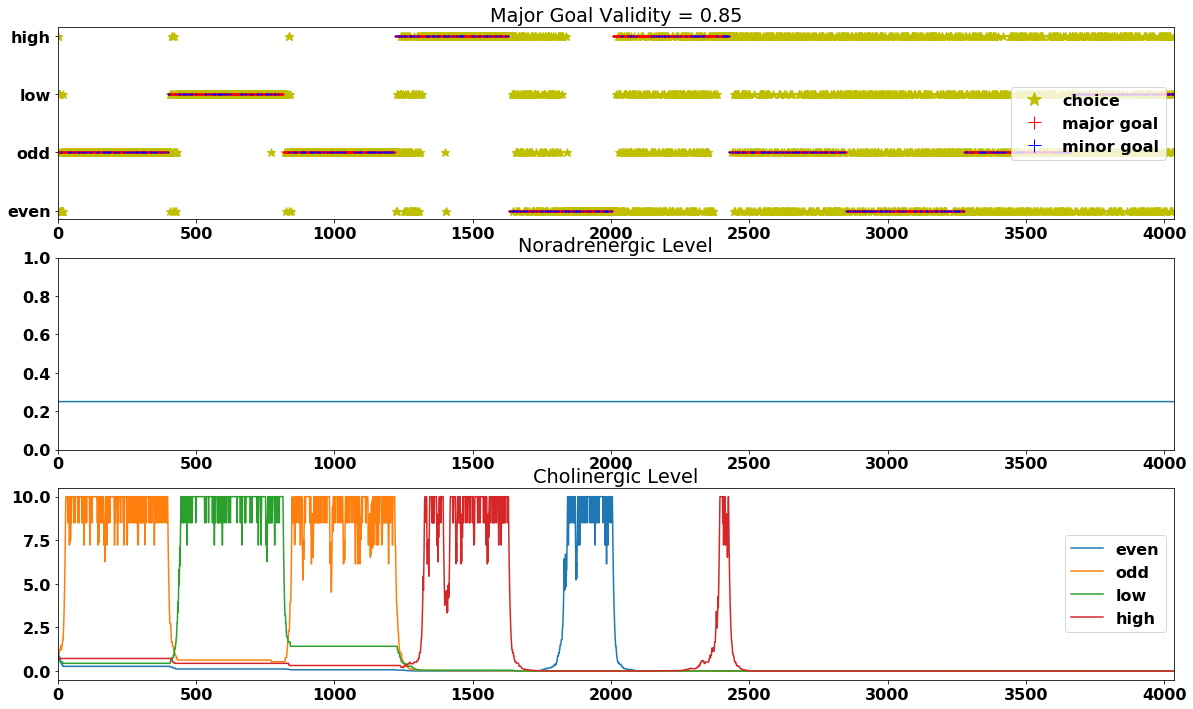

In [25]:
# trialRange+/-30 and single valid cue (10) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_85_10 = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=0.85,ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold, previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=0.85)


In [26]:
all_85_case_probs = [all_prob_85_1,all_prob_85_2,all_prob_85_3,all_prob_85_4,all_prob_85_5,\
                     all_prob_85_6,all_prob_85_7,all_prob_85_8,all_prob_85_9,all_prob_85_10]
averages_85 = average_probs(all_85_case_probs)


Average lag length is: 282
Average prob pred wrong, prob pred cue A valid, prob pred cue B valid, prob pred cue A invalid,
    prob guess not match cue, prob pred not match guess, prob match cue A invalid alter: 
[0.5297645600991325, 0.39714993804213133, 0.0, 0.07308550185873605, 0.4818587360594795, 0.09043370508054524, 0.0]


### 4.1.3: validity_choices=0.7

A cue was randomly picked among integers 0~3 (i.e. even, odd, low, high respectively) every 400+/-30 trials for 10 times.
The cue validity was randomly selected among 0.7 in each trial.
490/4035 = 12.1% trials occurred when the predicted digit matched the cued digit but the cue was invalid
2532/4035 = 62.8% trials occurred when the predicted digit did not match the cued digit.
    343/4035 trials occurred when the predicted digit did not match the guess-target digit.
    2386/4035 trials occurred when the guess-target digit did not match the cued digit, i.e. when the guessed action was wrong.
1013/4035 = 25.1% trials occurred when the predicted digit matches the major cued digit and is valid
0/4035 = 0.0% trials occurred when the predicted digit matches the minor cued digit and is valid
Lag length for stable prediction of each major cue is: [ 18  98 161 410 375 420 422 426 387 369], and mean of lag length (excluding consistently same cue) is 340.8888888888889


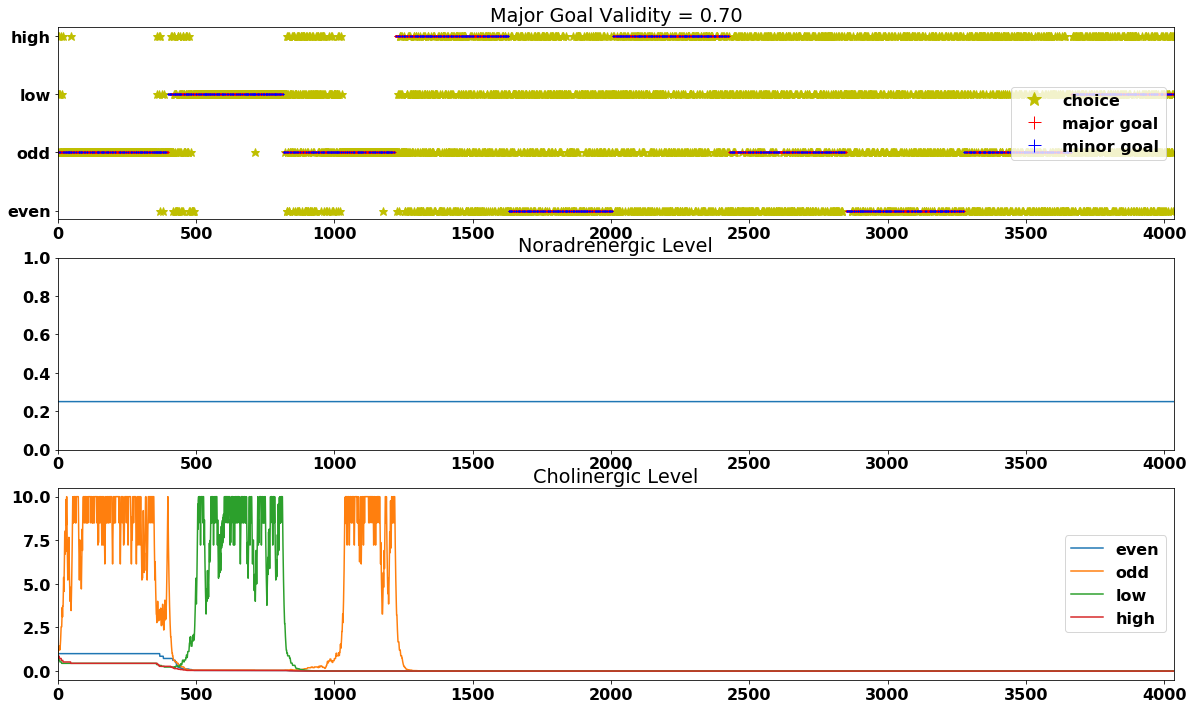

In [27]:
# trialRange+/-30 and single valid cue (1) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_70_1 = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=0.70,ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold, previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=0.70)


A cue was randomly picked among integers 0~3 (i.e. even, odd, low, high respectively) every 400+/-30 trials for 10 times.
The cue validity was randomly selected among 0.7 in each trial.
378/4035 = 9.4% trials occurred when the predicted digit matched the cued digit but the cue was invalid
2776/4035 = 68.8% trials occurred when the predicted digit did not match the cued digit.
    362/4035 trials occurred when the predicted digit did not match the guess-target digit.
    2643/4035 trials occurred when the guess-target digit did not match the cued digit, i.e. when the guessed action was wrong.
881/4035 = 21.8% trials occurred when the predicted digit matches the major cued digit and is valid
0/4035 = 0.0% trials occurred when the predicted digit matches the minor cued digit and is valid
Lag length for stable prediction of each major cue is: [ 80 215 403 317 375 420 422 426 387 369], and mean of lag length (excluding consistently same cue) is 370.44444444444446


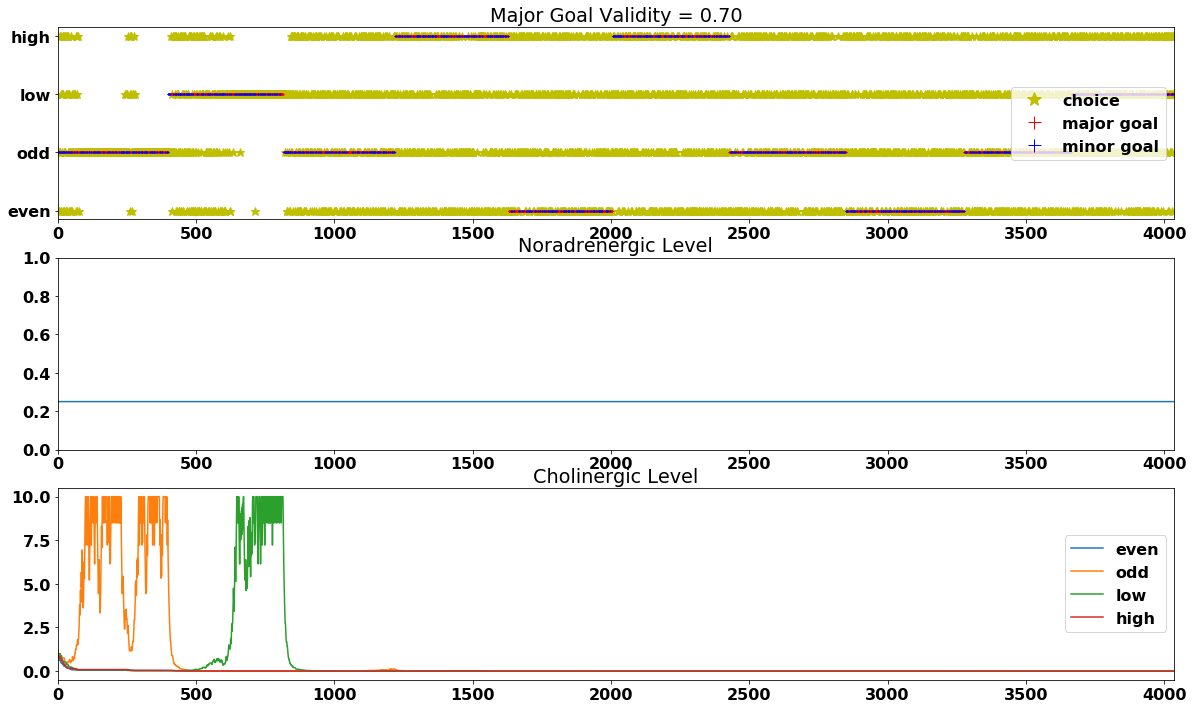

In [28]:
# trialRange+/-30 and single valid cue (2) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_70_2 = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=0.70,ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold, previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=0.70)


A cue was randomly picked among integers 0~3 (i.e. even, odd, low, high respectively) every 400+/-30 trials for 10 times.
The cue validity was randomly selected among 0.7 in each trial.
501/4035 = 12.4% trials occurred when the predicted digit matched the cued digit but the cue was invalid
2456/4035 = 60.9% trials occurred when the predicted digit did not match the cued digit.
    349/4035 trials occurred when the predicted digit did not match the guess-target digit.
    2324/4035 trials occurred when the guess-target digit did not match the cued digit, i.e. when the guessed action was wrong.
1078/4035 = 26.7% trials occurred when the predicted digit matches the major cued digit and is valid
0/4035 = 0.0% trials occurred when the predicted digit matches the minor cued digit and is valid
Lag length for stable prediction of each major cue is: [ 35  82 159 410 375 420 422 426 387 369], and mean of lag length (excluding consistently same cue) is 338.8888888888889


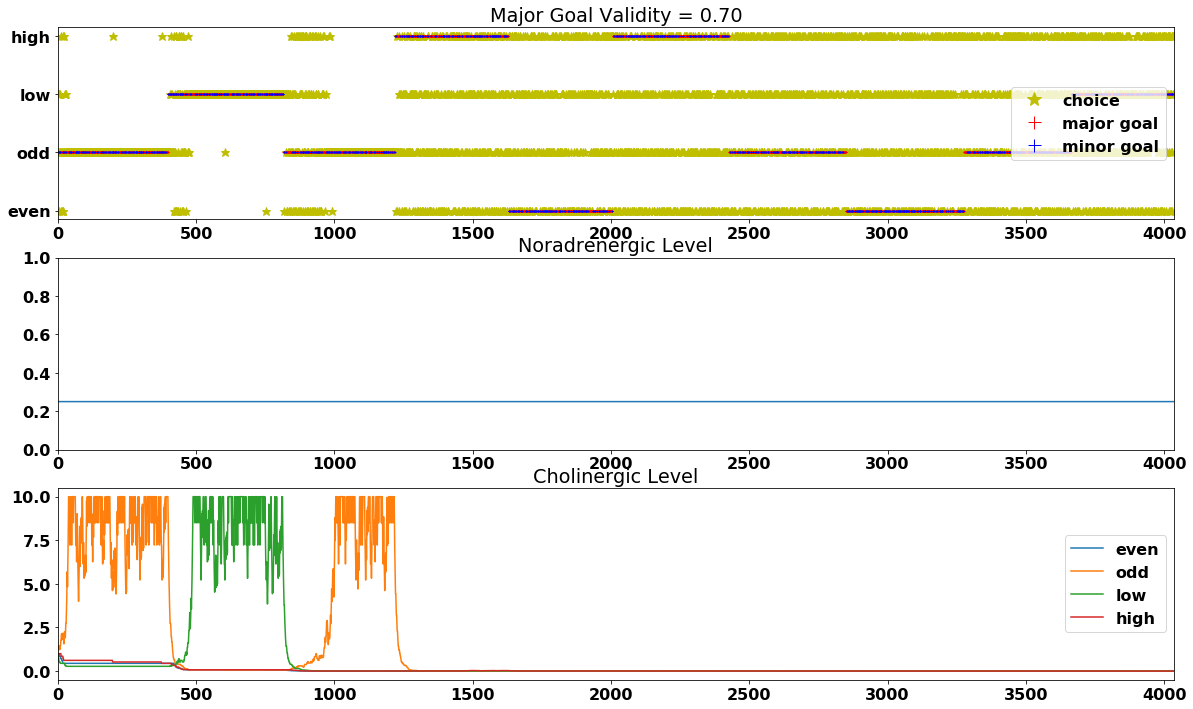

In [29]:
# trialRange+/-30 and single valid cue (3) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_70_3 = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=0.70,ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold, previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=0.70)


A cue was randomly picked among integers 0~3 (i.e. even, odd, low, high respectively) every 400+/-30 trials for 10 times.
The cue validity was randomly selected among 0.7 in each trial.
431/4035 = 10.7% trials occurred when the predicted digit matched the cued digit but the cue was invalid
2572/4035 = 63.7% trials occurred when the predicted digit did not match the cued digit.
    354/4035 trials occurred when the predicted digit did not match the guess-target digit.
    2435/4035 trials occurred when the guess-target digit did not match the cued digit, i.e. when the guessed action was wrong.
1032/4035 = 25.6% trials occurred when the predicted digit matches the major cued digit and is valid
0/4035 = 0.0% trials occurred when the predicted digit matches the minor cued digit and is valid
Lag length for stable prediction of each major cue is: [ 34 108 252 388 375 420 422 426 387 369], and mean of lag length (excluding consistently same cue) is 349.6666666666667


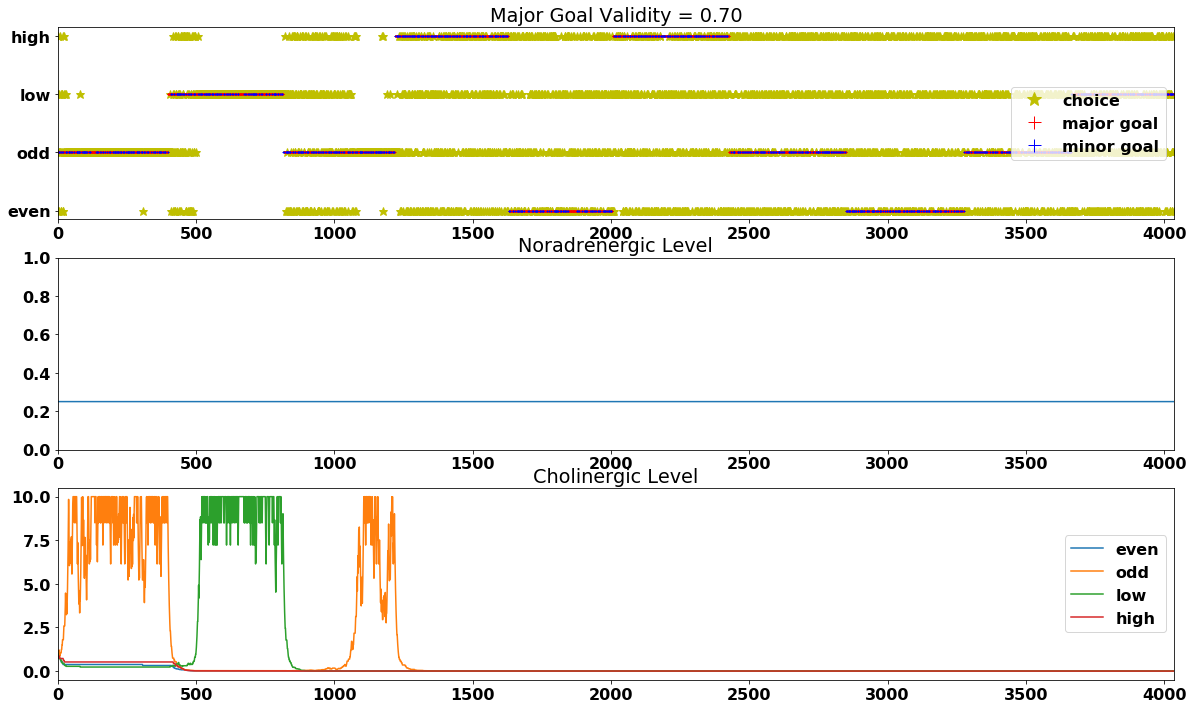

In [30]:
# trialRange+/-30 and single valid cue (4) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_70_4 = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=0.70,ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold, previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=0.70)


A cue was randomly picked among integers 0~3 (i.e. even, odd, low, high respectively) every 400+/-30 trials for 10 times.
The cue validity was randomly selected among 0.7 in each trial.
412/4035 = 10.2% trials occurred when the predicted digit matched the cued digit but the cue was invalid
2639/4035 = 65.4% trials occurred when the predicted digit did not match the cued digit.
    350/4035 trials occurred when the predicted digit did not match the guess-target digit.
    2505/4035 trials occurred when the guess-target digit did not match the cued digit, i.e. when the guessed action was wrong.
984/4035 = 24.4% trials occurred when the predicted digit matches the major cued digit and is valid
0/4035 = 0.0% trials occurred when the predicted digit matches the minor cued digit and is valid
Lag length for stable prediction of each major cue is: [ 21 153 403 410 310 420 422 426 387 369], and mean of lag length (excluding consistently same cue) is 366.6666666666667


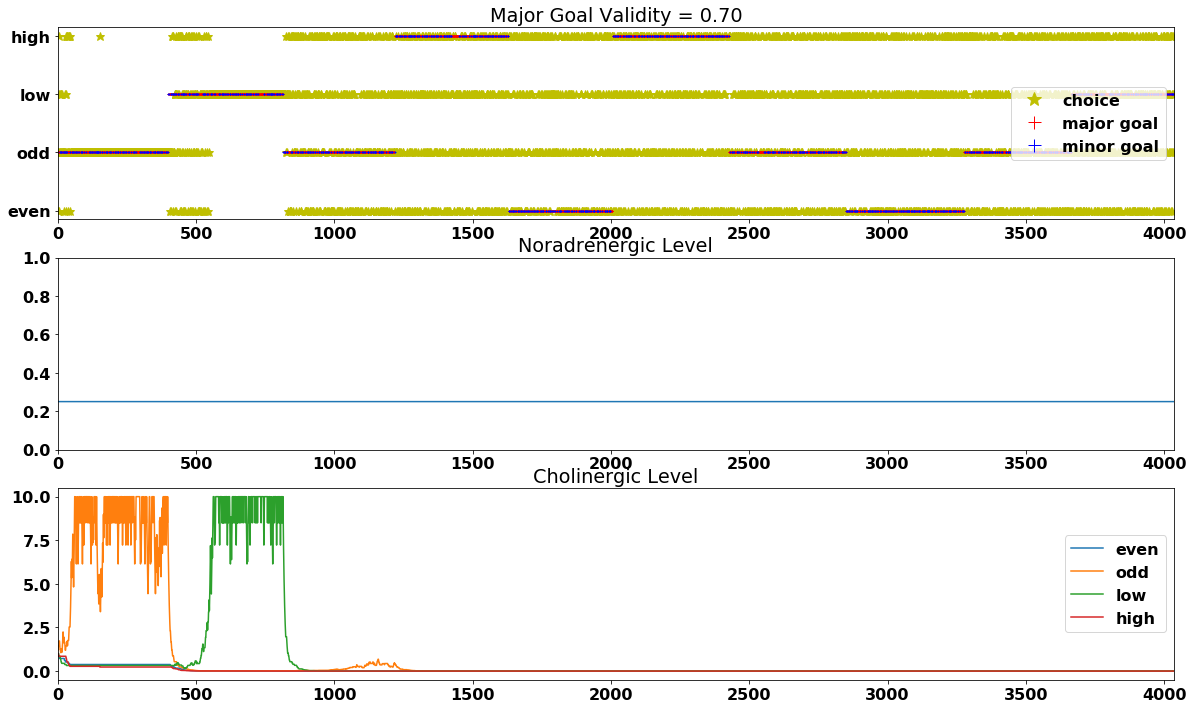

In [31]:
# trialRange+/-30 and single valid cue (5) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_70_5 = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=0.70,ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold, previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=0.70)


A cue was randomly picked among integers 0~3 (i.e. even, odd, low, high respectively) every 400+/-30 trials for 10 times.
The cue validity was randomly selected among 0.7 in each trial.
420/4035 = 10.4% trials occurred when the predicted digit matched the cued digit but the cue was invalid
2681/4035 = 66.4% trials occurred when the predicted digit did not match the cued digit.
    361/4035 trials occurred when the predicted digit did not match the guess-target digit.
    2556/4035 trials occurred when the guess-target digit did not match the cued digit, i.e. when the guessed action was wrong.
934/4035 = 23.1% trials occurred when the predicted digit matches the major cued digit and is valid
0/4035 = 0.0% trials occurred when the predicted digit matches the minor cued digit and is valid
Lag length for stable prediction of each major cue is: [ 32 174 403 410 375 420 381 426 387 369], and mean of lag length (excluding consistently same cue) is 371.6666666666667


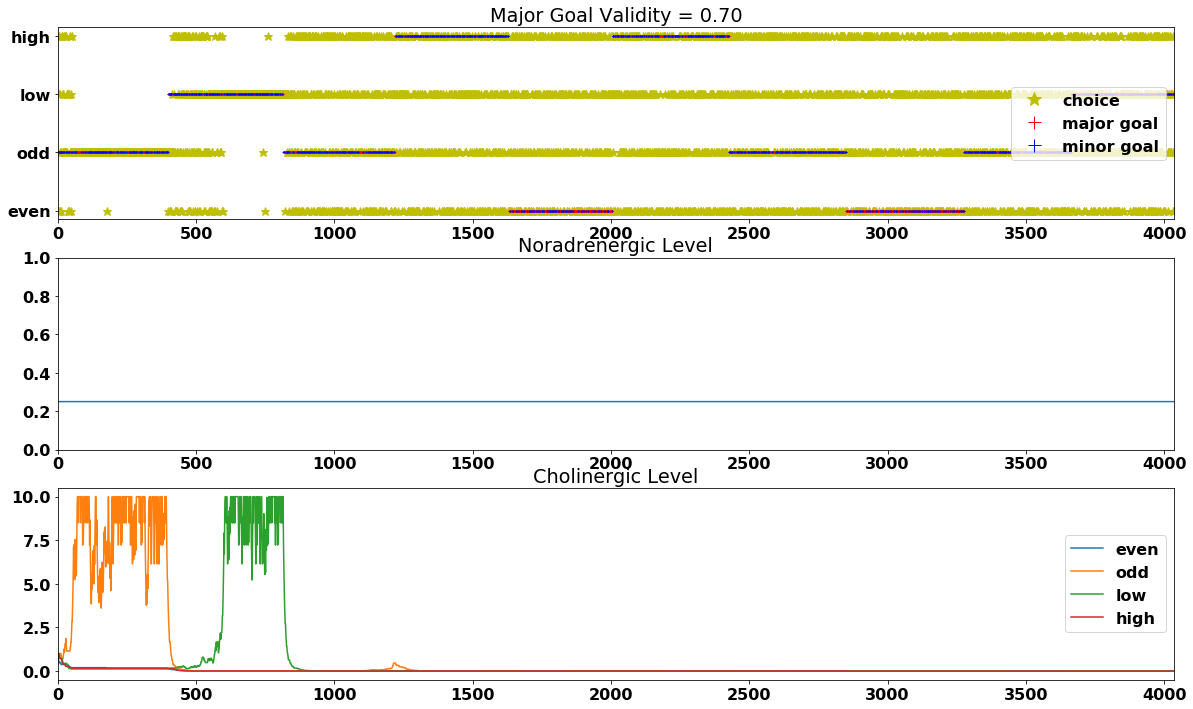

In [32]:
# trialRange+/-30 and single valid cue (6) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_70_6 = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=0.70,ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold, previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=0.70)


A cue was randomly picked among integers 0~3 (i.e. even, odd, low, high respectively) every 400+/-30 trials for 10 times.
The cue validity was randomly selected among 0.7 in each trial.
484/4035 = 12.0% trials occurred when the predicted digit matched the cued digit but the cue was invalid
2395/4035 = 59.4% trials occurred when the predicted digit did not match the cued digit.
    329/4035 trials occurred when the predicted digit did not match the guess-target digit.
    2252/4035 trials occurred when the guess-target digit did not match the cued digit, i.e. when the guessed action was wrong.
1156/4035 = 28.6% trials occurred when the predicted digit matches the major cued digit and is valid
0/4035 = 0.0% trials occurred when the predicted digit matches the minor cued digit and is valid
Lag length for stable prediction of each major cue is: [ 27  40  90 410 375 420 422 282 387 369], and mean of lag length (excluding consistently same cue) is 310.55555555555554


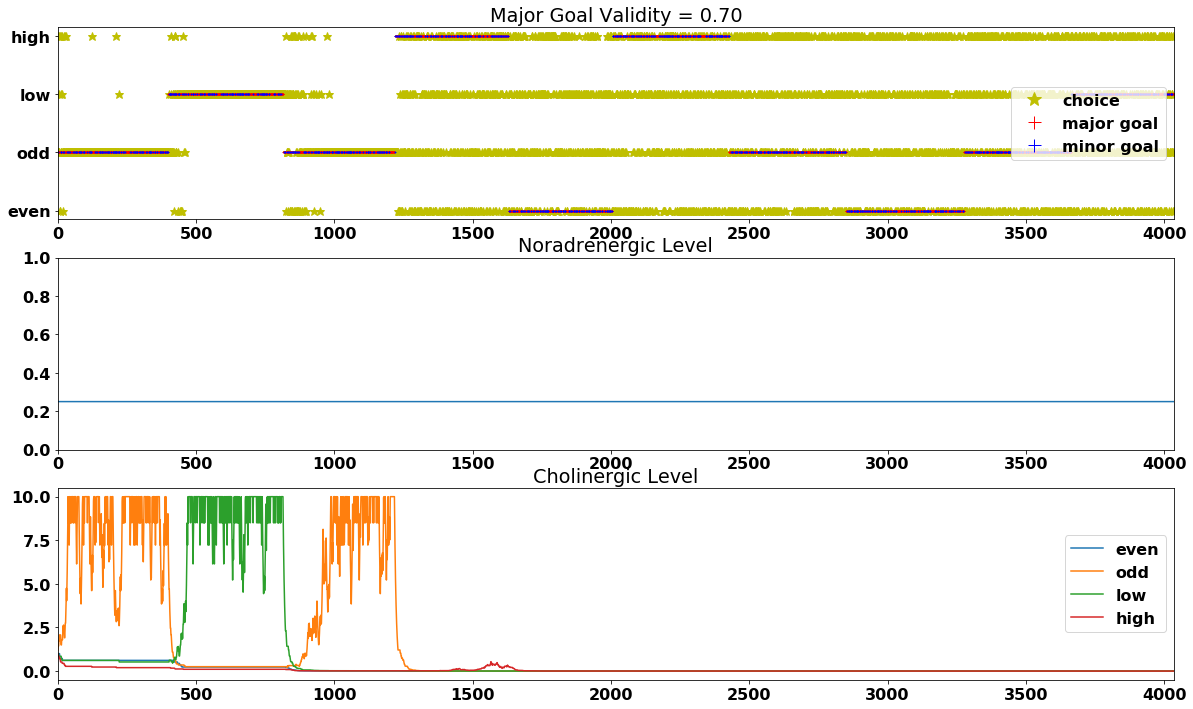

In [33]:
# trialRange+/-30 and single valid cue (7) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_70_7 = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=0.70,ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold, previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=0.70)


A cue was randomly picked among integers 0~3 (i.e. even, odd, low, high respectively) every 400+/-30 trials for 10 times.
The cue validity was randomly selected among 0.7 in each trial.
466/4035 = 11.5% trials occurred when the predicted digit matched the cued digit but the cue was invalid
2516/4035 = 62.4% trials occurred when the predicted digit did not match the cued digit.
    340/4035 trials occurred when the predicted digit did not match the guess-target digit.
    2386/4035 trials occurred when the guess-target digit did not match the cued digit, i.e. when the guessed action was wrong.
1053/4035 = 26.1% trials occurred when the predicted digit matches the major cued digit and is valid
0/4035 = 0.0% trials occurred when the predicted digit matches the minor cued digit and is valid
Lag length for stable prediction of each major cue is: [ 52  75 225 410 375 420 422 426 387 369], and mean of lag length (excluding consistently same cue) is 345.44444444444446


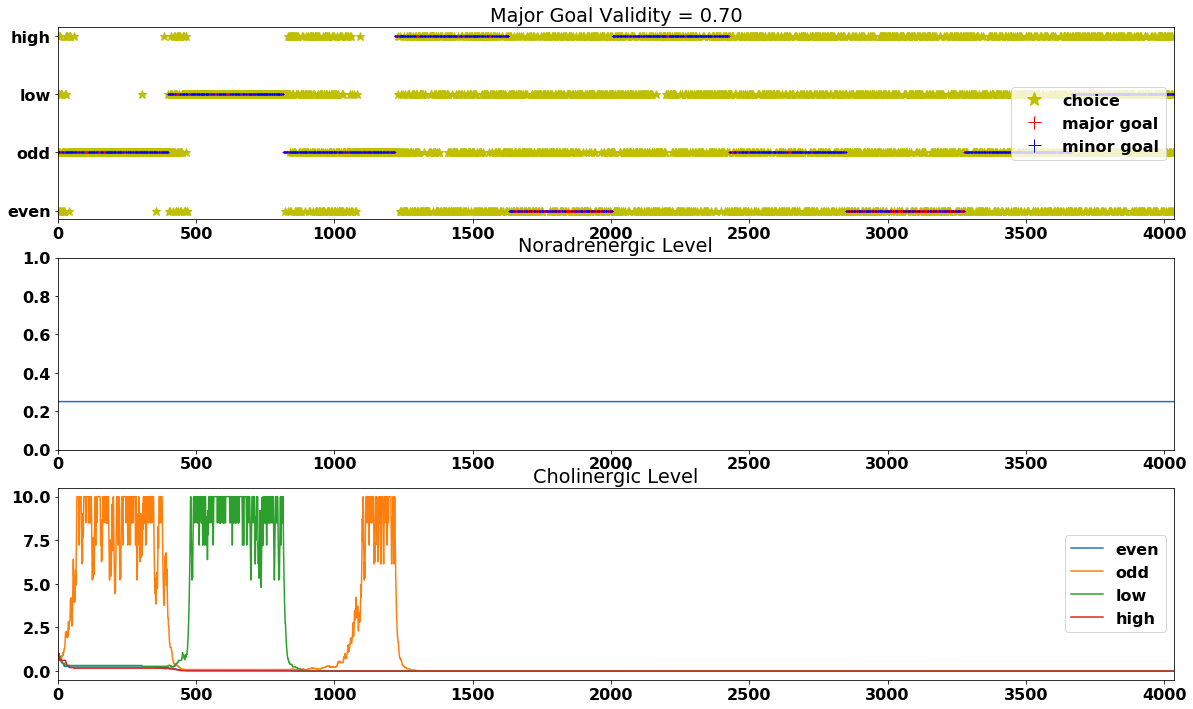

In [34]:
# trialRange+/-30 and single valid cue (8) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_70_8 = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=0.70,ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold, previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=0.70)


A cue was randomly picked among integers 0~3 (i.e. even, odd, low, high respectively) every 400+/-30 trials for 10 times.
The cue validity was randomly selected among 0.7 in each trial.
459/4035 = 11.4% trials occurred when the predicted digit matched the cued digit but the cue was invalid
2404/4035 = 59.6% trials occurred when the predicted digit did not match the cued digit.
    357/4035 trials occurred when the predicted digit did not match the guess-target digit.
    2249/4035 trials occurred when the guess-target digit did not match the cued digit, i.e. when the guessed action was wrong.
1172/4035 = 29.0% trials occurred when the predicted digit matches the major cued digit and is valid
0/4035 = 0.0% trials occurred when the predicted digit matches the minor cued digit and is valid
Lag length for stable prediction of each major cue is: [ 19  59 116 410 375 420 422 426 387 369], and mean of lag length (excluding consistently same cue) is 331.55555555555554


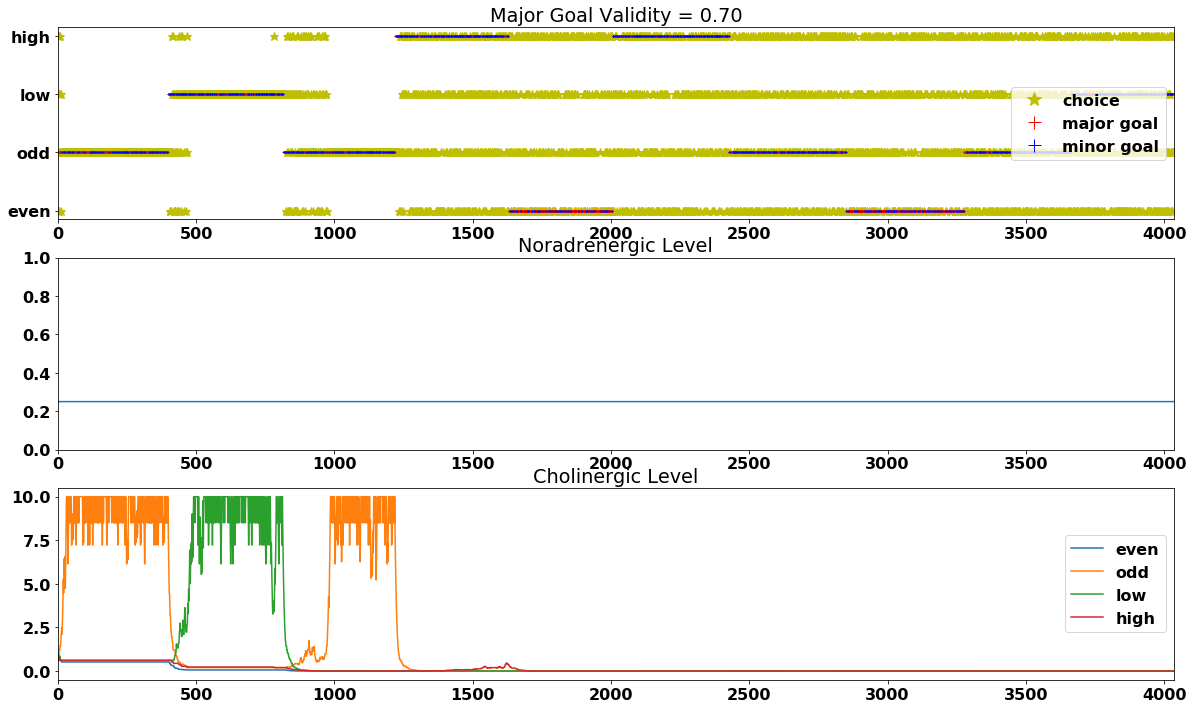

In [35]:
# trialRange+/-30 and single valid cue (9) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_70_9 = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=0.70,ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold, previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=0.70)


A cue was randomly picked among integers 0~3 (i.e. even, odd, low, high respectively) every 400+/-30 trials for 10 times.
The cue validity was randomly selected among 0.7 in each trial.
479/4035 = 11.9% trials occurred when the predicted digit matched the cued digit but the cue was invalid
2510/4035 = 62.2% trials occurred when the predicted digit did not match the cued digit.
    368/4035 trials occurred when the predicted digit did not match the guess-target digit.
    2354/4035 trials occurred when the guess-target digit did not match the cued digit, i.e. when the guessed action was wrong.
1046/4035 = 25.9% trials occurred when the predicted digit matches the major cued digit and is valid
0/4035 = 0.0% trials occurred when the predicted digit matches the minor cued digit and is valid
Lag length for stable prediction of each major cue is: [ 29  88 198 410 212 420 422 426 387 369], and mean of lag length (excluding consistently same cue) is 325.77777777777777


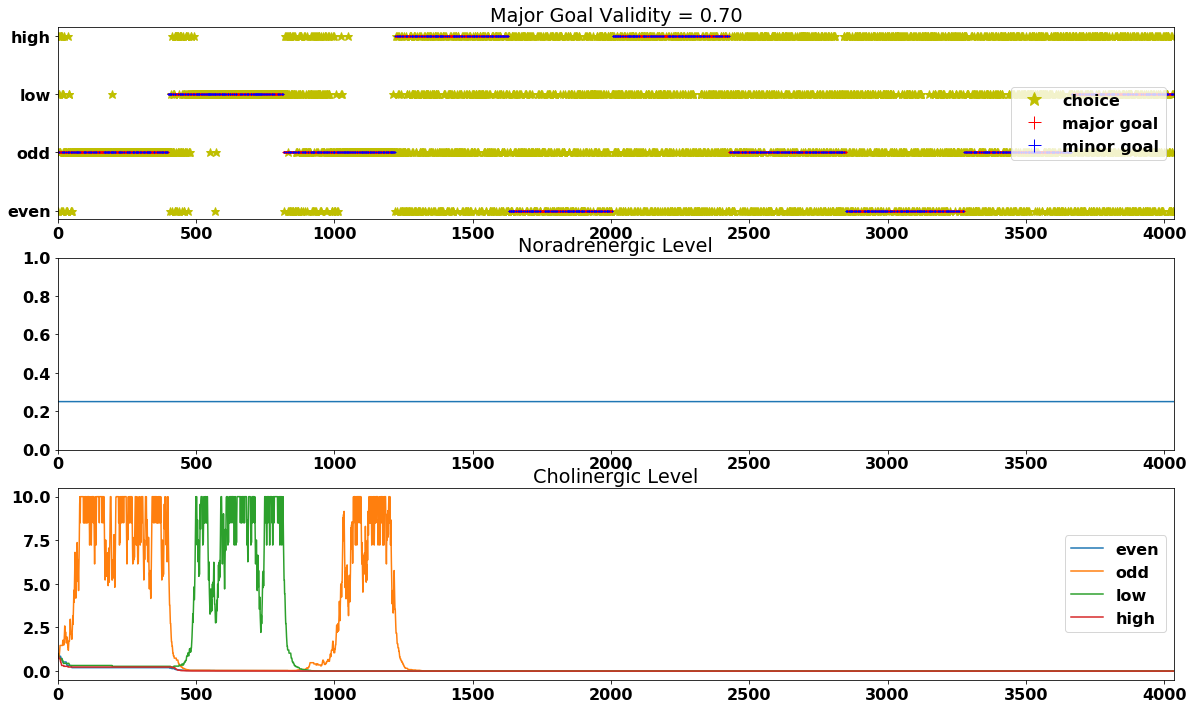

In [36]:
# trialRange+/-30 and single valid cue (10) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_70_10 = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=0.70,ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold, previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=0.70)


In [37]:
all_70_case_probs = [all_prob_70_1,all_prob_70_2,all_prob_70_3,all_prob_70_4,all_prob_70_5,\
                     all_prob_70_6,all_prob_70_7,all_prob_70_8,all_prob_70_9,all_prob_70_10]
averages_70 = average_probs(all_70_case_probs)


Average lag length is: 345
Average prob pred wrong, prob pred cue A valid, prob pred cue B valid, prob pred cue A invalid,
    prob guess not match cue, prob pred not match guess, prob match cue A invalid alter: 
[0.6314993804213135, 0.2564807930607187, 0.0, 0.11201982651796778, 0.5970260223048328, 0.0870631970260223, 0.0]


### 4.1.4: validity_choices=[0.99, 0.85, 0.70]

A cue was randomly picked among integers 0~3 (i.e. even, odd, low, high respectively) every 400+/-30 trials for 10 times.
The cue validity was randomly selected among [0.99, 0.85, 0.7] in each trial.
206/4035 = 5.1% trials occurred when the predicted digit matched the cued digit but the cue was invalid
2208/4035 = 54.7% trials occurred when the predicted digit did not match the cued digit.
    351/4035 trials occurred when the predicted digit did not match the guess-target digit.
    2042/4035 trials occurred when the guess-target digit did not match the cued digit, i.e. when the guessed action was wrong.
1621/4035 = 40.2% trials occurred when the predicted digit matches the major cued digit and is valid
0/4035 = 0.0% trials occurred when the predicted digit matches the minor cued digit and is valid
Lag length for stable prediction of each major cue is: [ 26  58  34 239 305 147 422 426 387 369], and mean of lag length (excluding consistently same cue) is 265.22222222222223


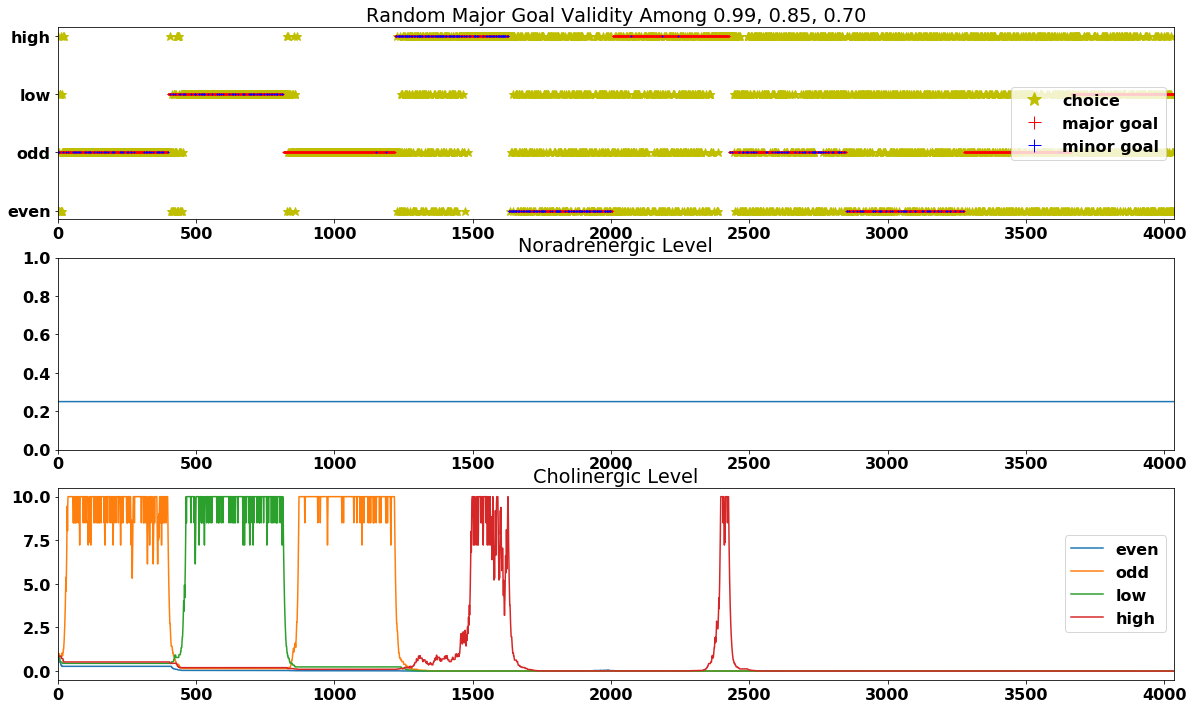

In [38]:
# trialRange+/-30 and single valid cue (1) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_multi_1 = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=[0.99,0.85,0.70],ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold,previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=[0.99,0.85,0.70])


A cue was randomly picked among integers 0~3 (i.e. even, odd, low, high respectively) every 400+/-30 trials for 10 times.
The cue validity was randomly selected among [0.99, 0.85, 0.7] in each trial.
226/4035 = 5.6% trials occurred when the predicted digit matched the cued digit but the cue was invalid
2227/4035 = 55.2% trials occurred when the predicted digit did not match the cued digit.
    365/4035 trials occurred when the predicted digit did not match the guess-target digit.
    2046/4035 trials occurred when the guess-target digit did not match the cued digit, i.e. when the guessed action was wrong.
1582/4035 = 39.2% trials occurred when the predicted digit matches the major cued digit and is valid
0/4035 = 0.0% trials occurred when the predicted digit matches the minor cued digit and is valid
Lag length for stable prediction of each major cue is: [ 22  41  49 203 375 253 422 426 177 369], and mean of lag length (excluding consistently same cue) is 257.22222222222223


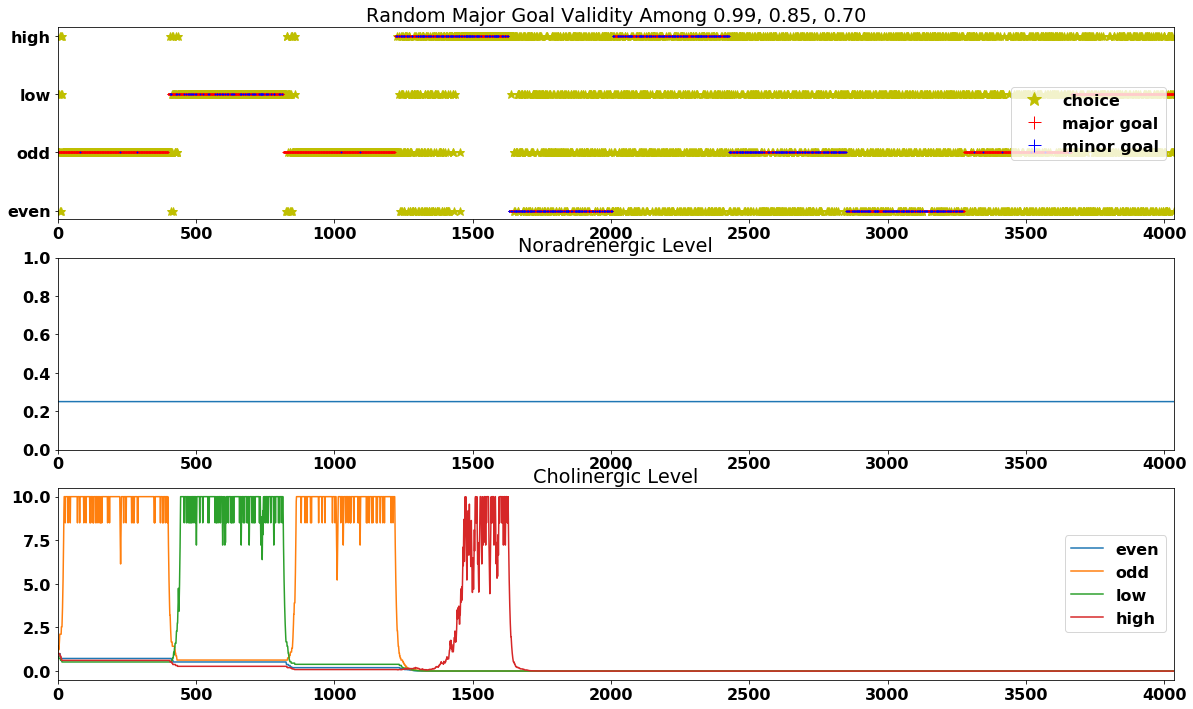

In [39]:
# trialRange+/-30 and single valid cue (2) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_multi_2 = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=[0.99,0.85,0.70],ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold,previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=[0.99,0.85,0.70])


A cue was randomly picked among integers 0~3 (i.e. even, odd, low, high respectively) every 400+/-30 trials for 10 times.
The cue validity was randomly selected among [0.99, 0.85, 0.7] in each trial.
193/4035 = 4.8% trials occurred when the predicted digit matched the cued digit but the cue was invalid
2261/4035 = 56.0% trials occurred when the predicted digit did not match the cued digit.
    365/4035 trials occurred when the predicted digit did not match the guess-target digit.
    2097/4035 trials occurred when the guess-target digit did not match the cued digit, i.e. when the guessed action was wrong.
1581/4035 = 39.2% trials occurred when the predicted digit matches the major cued digit and is valid
0/4035 = 0.0% trials occurred when the predicted digit matches the minor cued digit and is valid
Lag length for stable prediction of each major cue is: [ 22  58  91 243 375 420 422 426 387 369], and mean of lag length (excluding consistently same cue) is 310.1111111111111


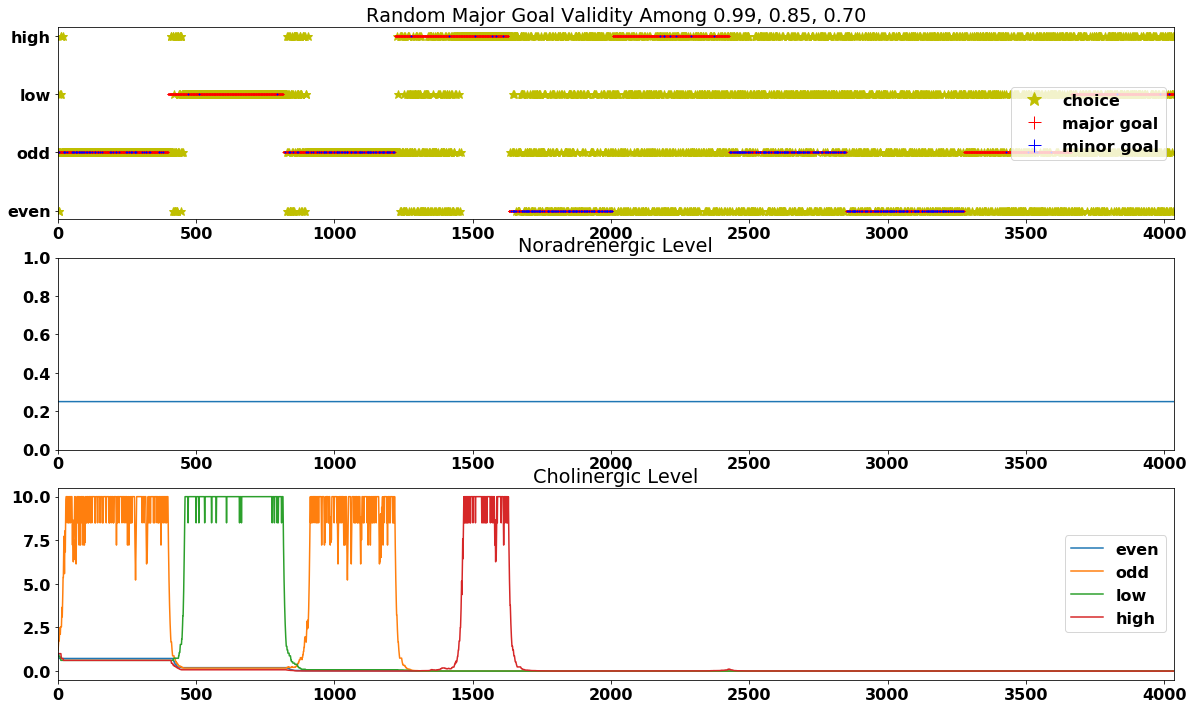

In [40]:
# trialRange+/-30 and single valid cue (3) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_multi_3 = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=[0.99,0.85,0.70],ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold,previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=[0.99,0.85,0.70])


A cue was randomly picked among integers 0~3 (i.e. even, odd, low, high respectively) every 400+/-30 trials for 10 times.
The cue validity was randomly selected among [0.99, 0.85, 0.7] in each trial.
344/4035 = 8.5% trials occurred when the predicted digit matched the cued digit but the cue was invalid
2305/4035 = 57.1% trials occurred when the predicted digit did not match the cued digit.
    402/4035 trials occurred when the predicted digit did not match the guess-target digit.
    2117/4035 trials occurred when the guess-target digit did not match the cued digit, i.e. when the guessed action was wrong.
1386/4035 = 34.3% trials occurred when the predicted digit matches the major cued digit and is valid
0/4035 = 0.0% trials occurred when the predicted digit matches the minor cued digit and is valid
Lag length for stable prediction of each major cue is: [ 21  52  95 239 375  87 422 426 387 369], and mean of lag length (excluding consistently same cue) is 272.44444444444446


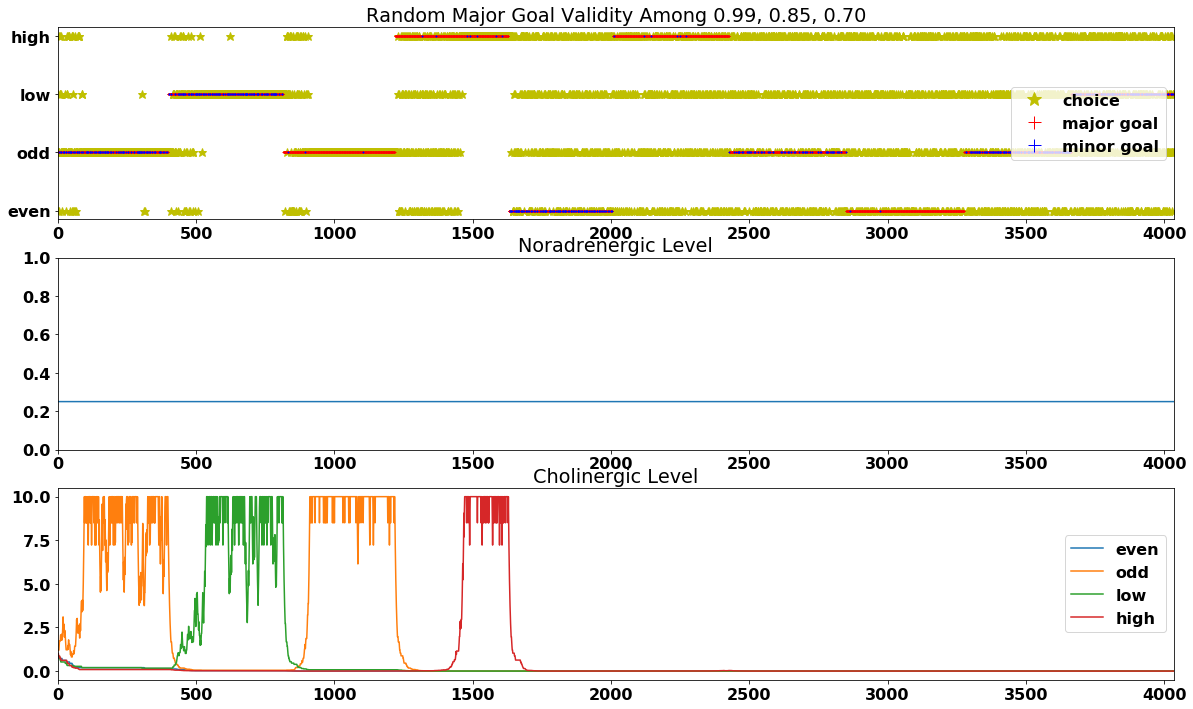

In [41]:
# trialRange+/-30 and single valid cue (4) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_multi_4 = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=[0.99,0.85,0.70],ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold,previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=[0.99,0.85,0.70])


A cue was randomly picked among integers 0~3 (i.e. even, odd, low, high respectively) every 400+/-30 trials for 10 times.
The cue validity was randomly selected among [0.99, 0.85, 0.7] in each trial.
210/4035 = 5.2% trials occurred when the predicted digit matched the cued digit but the cue was invalid
2013/4035 = 49.9% trials occurred when the predicted digit did not match the cued digit.
    350/4035 trials occurred when the predicted digit did not match the guess-target digit.
    1819/4035 trials occurred when the guess-target digit did not match the cued digit, i.e. when the guessed action was wrong.
1812/4035 = 44.9% trials occurred when the predicted digit matches the major cued digit and is valid
0/4035 = 0.0% trials occurred when the predicted digit matches the minor cued digit and is valid
Lag length for stable prediction of each major cue is: [ 20  61 109 194 232 302 422 426 387 369], and mean of lag length (excluding consistently same cue) is 278.0


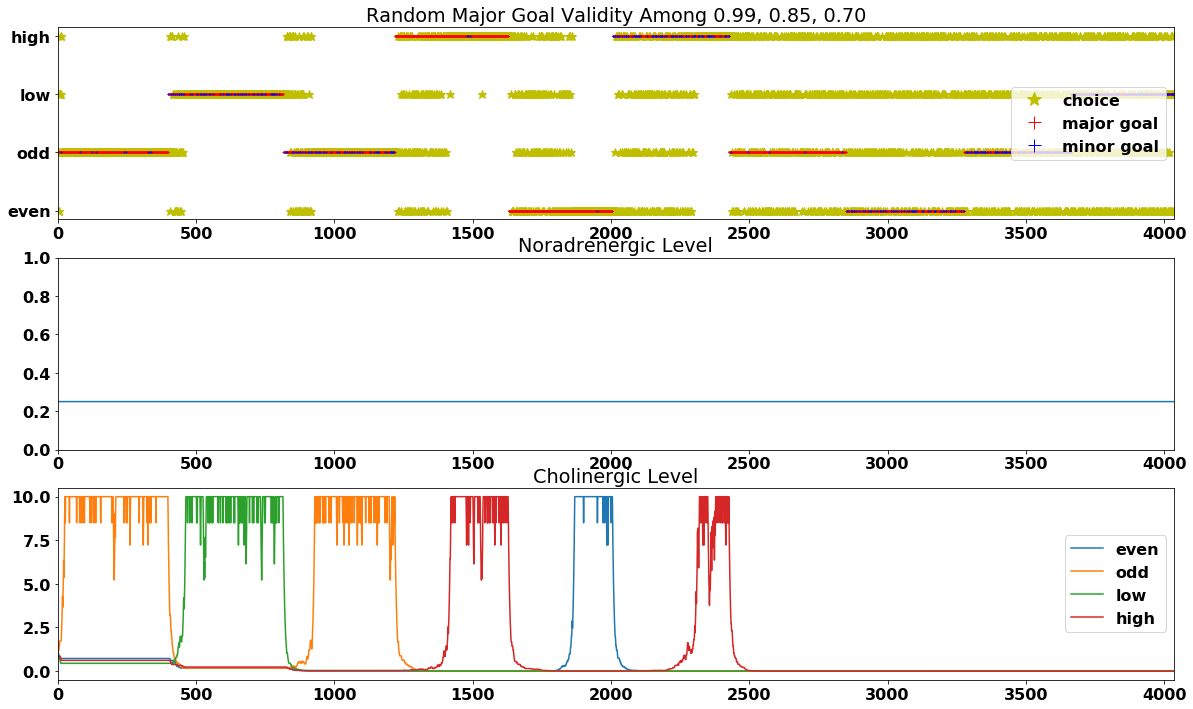

In [42]:
# trialRange+/-30 and single valid cue (5) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_multi_5 = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=[0.99,0.85,0.70],ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold,previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=[0.99,0.85,0.70])


A cue was randomly picked among integers 0~3 (i.e. even, odd, low, high respectively) every 400+/-30 trials for 10 times.
The cue validity was randomly selected among [0.99, 0.85, 0.7] in each trial.
294/4035 = 7.3% trials occurred when the predicted digit matched the cued digit but the cue was invalid
2474/4035 = 61.3% trials occurred when the predicted digit did not match the cued digit.
    322/4035 trials occurred when the predicted digit did not match the guess-target digit.
    2327/4035 trials occurred when the guess-target digit did not match the cued digit, i.e. when the guessed action was wrong.
1267/4035 = 31.4% trials occurred when the predicted digit matches the major cued digit and is valid
0/4035 = 0.0% trials occurred when the predicted digit matches the minor cued digit and is valid
Lag length for stable prediction of each major cue is: [ 44  51 231 410 375 390 422 426 387 369], and mean of lag length (excluding consistently same cue) is 340.1111111111111


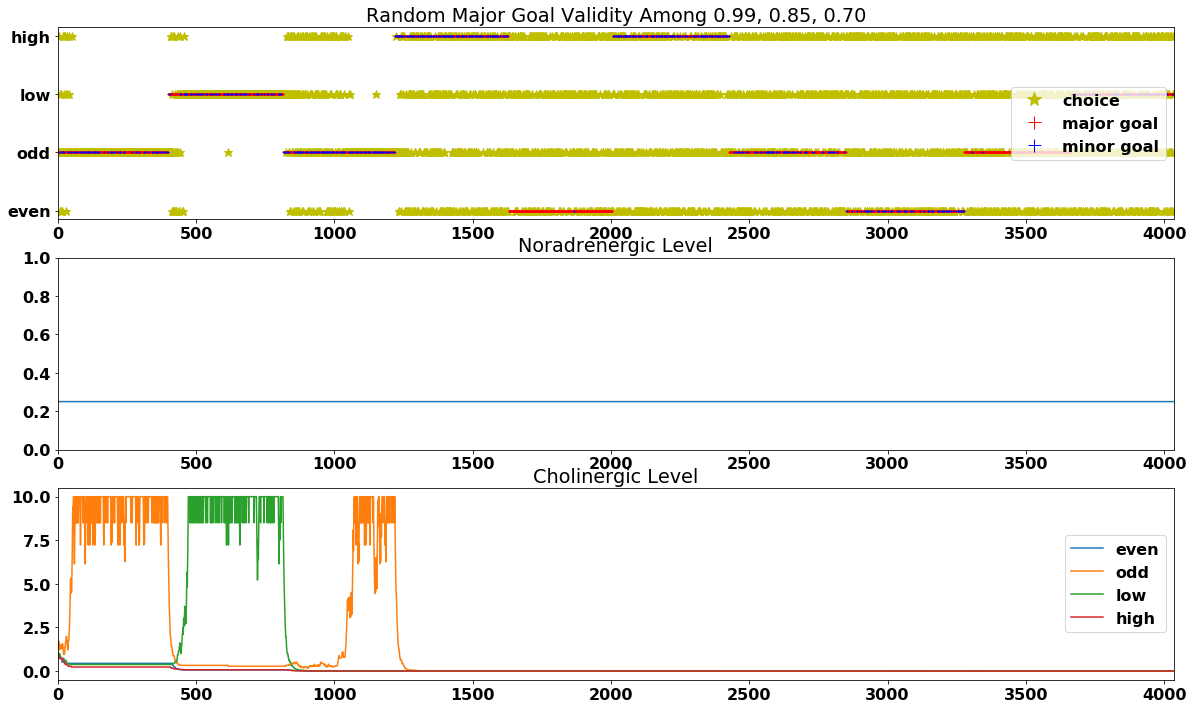

In [43]:
# trialRange+/-30 and single valid cue (6) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_multi_6 = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=[0.99,0.85,0.70],ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold,previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=[0.99,0.85,0.70])


A cue was randomly picked among integers 0~3 (i.e. even, odd, low, high respectively) every 400+/-30 trials for 10 times.
The cue validity was randomly selected among [0.99, 0.85, 0.7] in each trial.
286/4035 = 7.1% trials occurred when the predicted digit matched the cued digit but the cue was invalid
2183/4035 = 54.1% trials occurred when the predicted digit did not match the cued digit.
    345/4035 trials occurred when the predicted digit did not match the guess-target digit.
    2019/4035 trials occurred when the guess-target digit did not match the cued digit, i.e. when the guessed action was wrong.
1566/4035 = 38.8% trials occurred when the predicted digit matches the major cued digit and is valid
0/4035 = 0.0% trials occurred when the predicted digit matches the minor cued digit and is valid
Lag length for stable prediction of each major cue is: [ 20  38  69 179 305 420 422 426 387 369], and mean of lag length (excluding consistently same cue) is 290.55555555555554


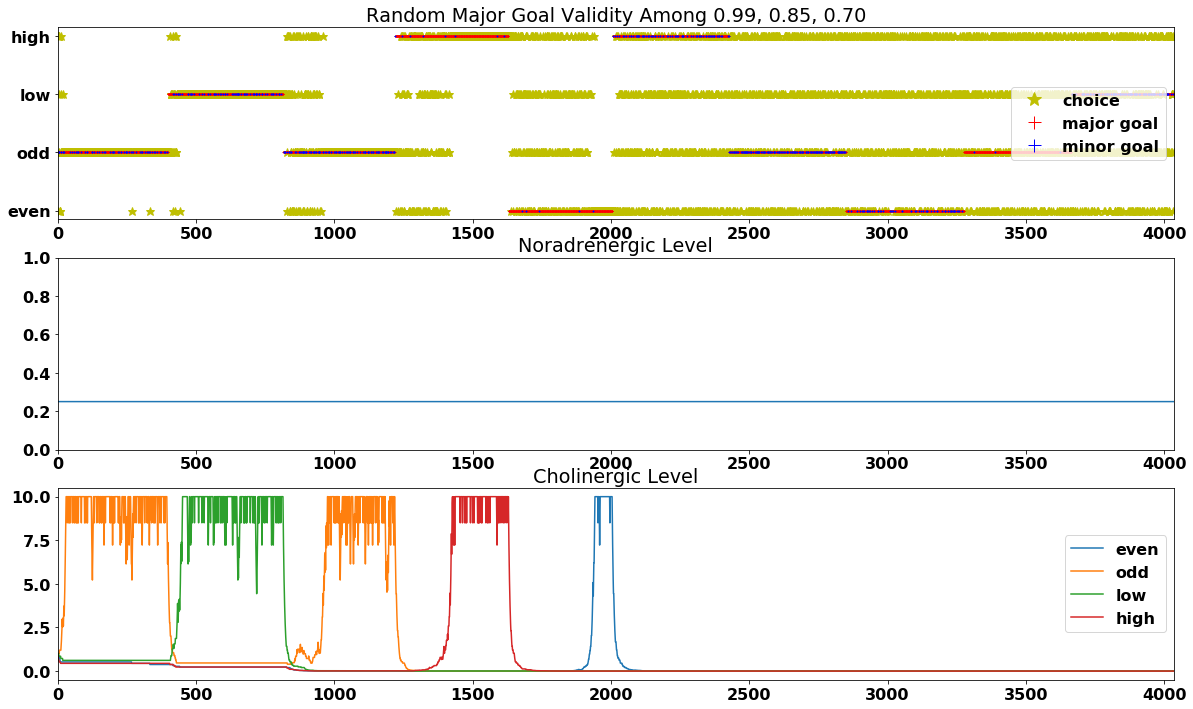

In [44]:
# trialRange+/-30 and single valid cue (7) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_multi_7 = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=[0.99,0.85,0.70],ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold,previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=[0.99,0.85,0.70])


A cue was randomly picked among integers 0~3 (i.e. even, odd, low, high respectively) every 400+/-30 trials for 10 times.
The cue validity was randomly selected among [0.99, 0.85, 0.7] in each trial.
154/4035 = 3.8% trials occurred when the predicted digit matched the cued digit but the cue was invalid
2448/4035 = 60.7% trials occurred when the predicted digit did not match the cued digit.
    350/4035 trials occurred when the predicted digit did not match the guess-target digit.
    2294/4035 trials occurred when the guess-target digit did not match the cued digit, i.e. when the guessed action was wrong.
1433/4035 = 35.5% trials occurred when the predicted digit matches the major cued digit and is valid
0/4035 = 0.0% trials occurred when the predicted digit matches the minor cued digit and is valid
Lag length for stable prediction of each major cue is: [ 28  95  83 410 375 420 422 426 387 369], and mean of lag length (excluding consistently same cue) is 331.8888888888889


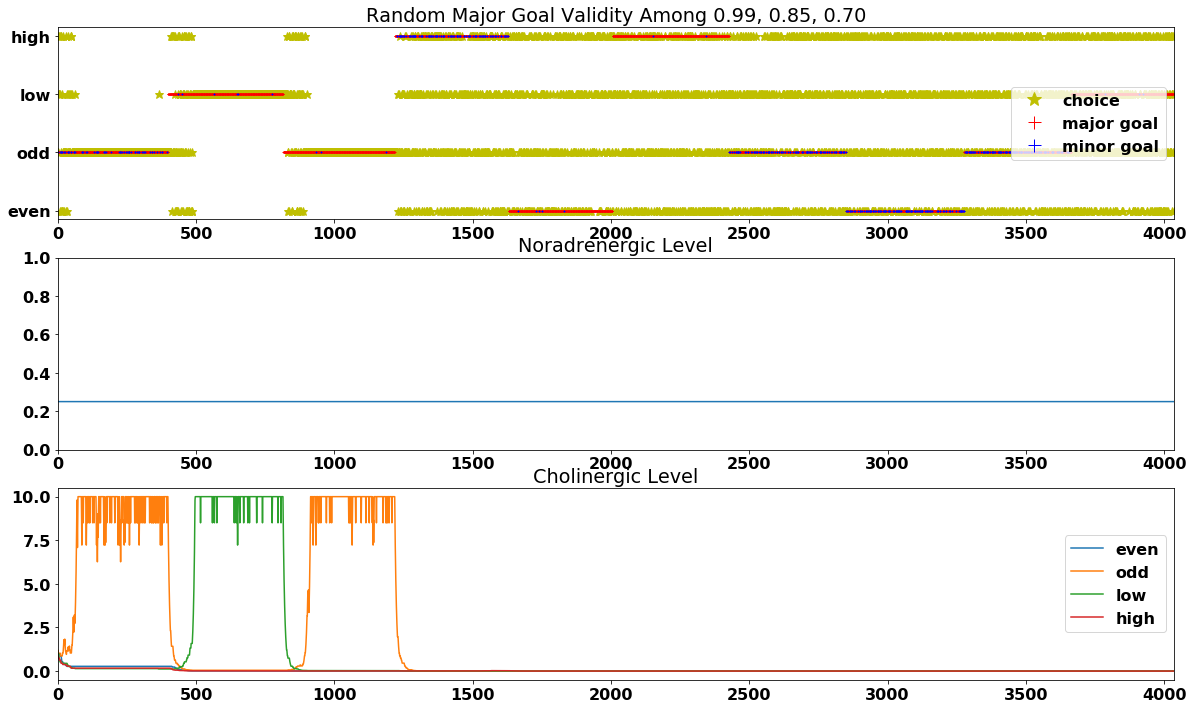

In [45]:
# trialRange+/-30 and single valid cue (8) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_multi_8 = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=[0.99,0.85,0.70],ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold,previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=[0.99,0.85,0.70])


A cue was randomly picked among integers 0~3 (i.e. even, odd, low, high respectively) every 400+/-30 trials for 10 times.
The cue validity was randomly selected among [0.99, 0.85, 0.7] in each trial.
267/4035 = 6.6% trials occurred when the predicted digit matched the cued digit but the cue was invalid
2142/4035 = 53.1% trials occurred when the predicted digit did not match the cued digit.
    343/4035 trials occurred when the predicted digit did not match the guess-target digit.
    1971/4035 trials occurred when the guess-target digit did not match the cued digit, i.e. when the guessed action was wrong.
1626/4035 = 40.3% trials occurred when the predicted digit matches the major cued digit and is valid
0/4035 = 0.0% trials occurred when the predicted digit matches the minor cued digit and is valid
Lag length for stable prediction of each major cue is: [ 48  46  36 104 375 420 422 426 387 369], and mean of lag length (excluding consistently same cue) is 287.22222222222223


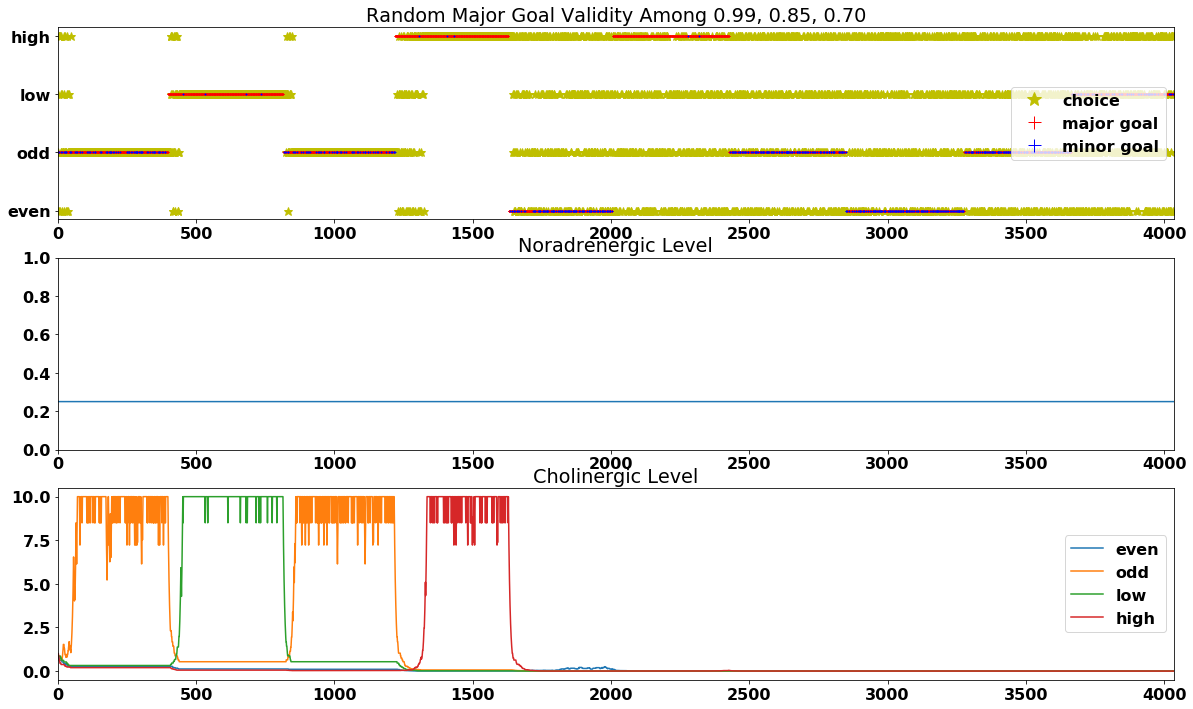

In [46]:
# trialRange+/-30 and single valid cue (9) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_multi_9 = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=[0.99,0.85,0.70],ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold,previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=[0.99,0.85,0.70])


A cue was randomly picked among integers 0~3 (i.e. even, odd, low, high respectively) every 400+/-30 trials for 10 times.
The cue validity was randomly selected among [0.99, 0.85, 0.7] in each trial.
279/4035 = 6.9% trials occurred when the predicted digit matched the cued digit but the cue was invalid
2350/4035 = 58.2% trials occurred when the predicted digit did not match the cued digit.
    324/4035 trials occurred when the predicted digit did not match the guess-target digit.
    2206/4035 trials occurred when the guess-target digit did not match the cued digit, i.e. when the guessed action was wrong.
1406/4035 = 34.8% trials occurred when the predicted digit matches the major cued digit and is valid
0/4035 = 0.0% trials occurred when the predicted digit matches the minor cued digit and is valid
Lag length for stable prediction of each major cue is: [ 30  33  45 410 375 420 422 387 387 369], and mean of lag length (excluding consistently same cue) is 316.44444444444446


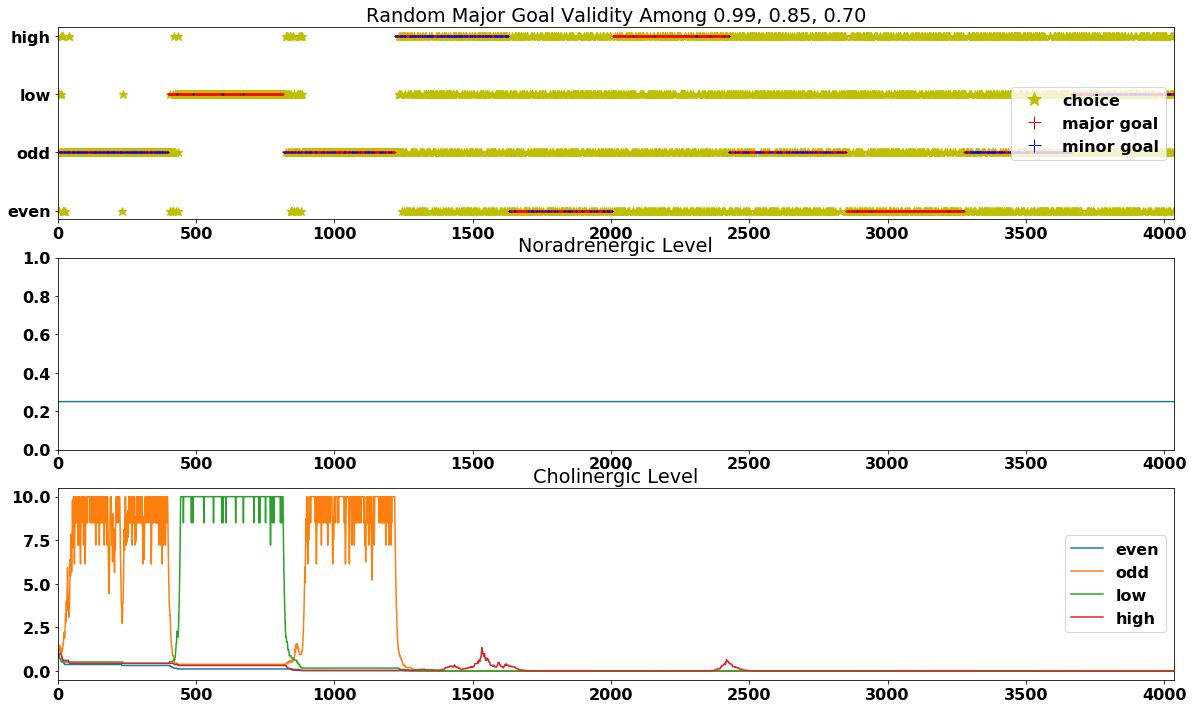

In [47]:
# trialRange+/-30 and single valid cue (10) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_multi_10 = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=[0.99,0.85,0.70],ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold,previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=[0.99,0.85,0.70])


In [48]:
all_multi_case_probs = [all_prob_multi_1,all_prob_multi_2,all_prob_multi_3,all_prob_multi_4,all_prob_multi_5,\
                        all_prob_multi_6,all_prob_multi_7,all_prob_multi_8,all_prob_multi_9,all_prob_multi_10]
averages_multi = average_probs(all_multi_case_probs)


Average lag length is: 294
Average prob pred wrong, prob pred cue A valid, prob pred cue B valid, prob pred cue A invalid,
    prob guess not match cue, prob pred not match guess, prob match cue A invalid alter: 
[0.560371747211896, 0.37868649318463443, 0.0, 0.060941759603469633, 0.5189095415117719, 0.0871623296158612, 0.0]


## 4.2: Two Possibly Valid Cues
Randomly change trial interval within the range (200+/-20) and have two possibly valid cues for each cue switch, and use one of the validity options: 0.99, 0.85, 0.70

In [49]:
alterValid=True

### 4.2.1: validity_choices=0.99

A cue was randomly picked among integers 0~3 (i.e. even, odd, low, high respectively) every 400+/-30 trials for 10 times.
The cue validity was randomly selected among 0.99 in each trial.
A major cue or its alternative is possible for each trial depends on the cue validity.
0/4035 = 0.0% trials occurred when the predicted digit matched the cued digit but the cue was invalid
1703/4035 = 42.2% trials occurred when the predicted digit did not match the cued digit.
    392/4035 trials occurred when the predicted digit did not match the guess-target digit.
    1457/4035 trials occurred when the guess-target digit did not match the cued digit, i.e. when the guessed action was wrong.
2328/4035 = 57.7% trials occurred when the predicted digit matches the major cued digit and is valid
4/4035 = 0.1% trials occurred when the predicted digit matches the minor cued digit and is valid
24/4035 = 0.6% trials occurred when the predicted digit matches the major cued digit but is invalidly altered
Lag len

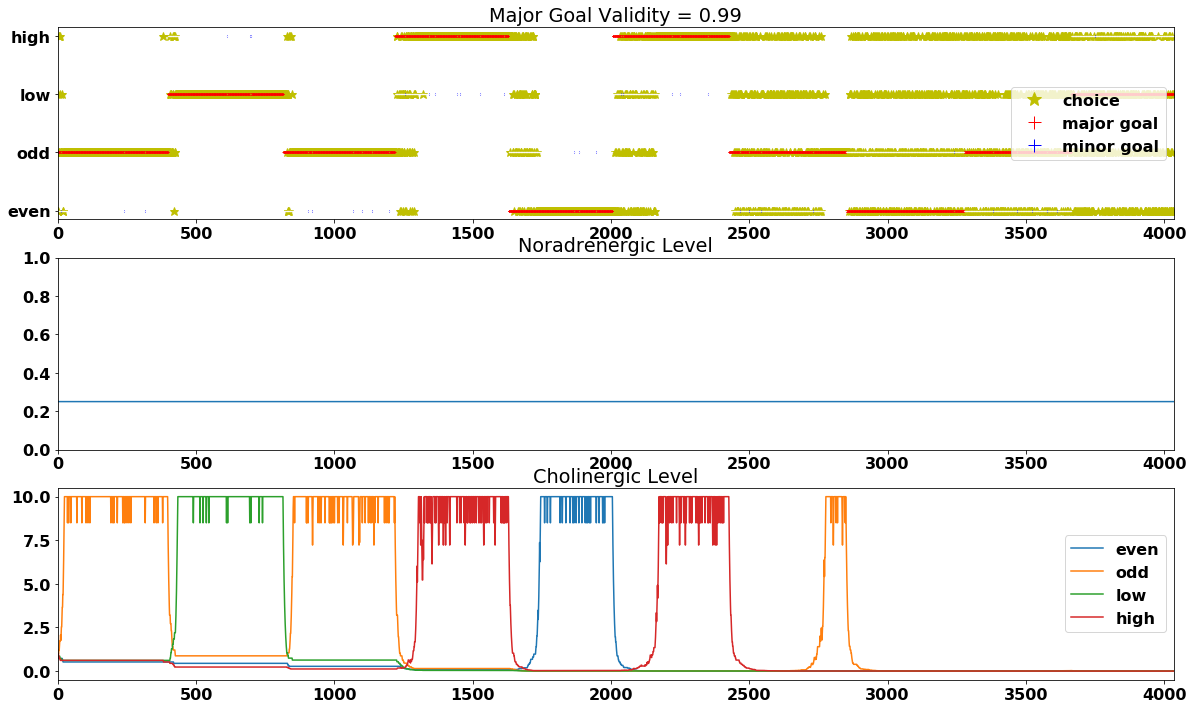

In [50]:
# trialRange+/-30 and two possibly valid cues (1) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_99_1a = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=0.99,ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold, previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=0.99,alterValid=alterValid)


A cue was randomly picked among integers 0~3 (i.e. even, odd, low, high respectively) every 400+/-30 trials for 10 times.
The cue validity was randomly selected among 0.99 in each trial.
A major cue or its alternative is possible for each trial depends on the cue validity.
0/4035 = 0.0% trials occurred when the predicted digit matched the cued digit but the cue was invalid
1902/4035 = 47.1% trials occurred when the predicted digit did not match the cued digit.
    361/4035 trials occurred when the predicted digit did not match the guess-target digit.
    1673/4035 trials occurred when the guess-target digit did not match the cued digit, i.e. when the guessed action was wrong.
2130/4035 = 52.8% trials occurred when the predicted digit matches the major cued digit and is valid
3/4035 = 0.1% trials occurred when the predicted digit matches the minor cued digit and is valid
23/4035 = 0.6% trials occurred when the predicted digit matches the major cued digit but is invalidly altered
Lag len

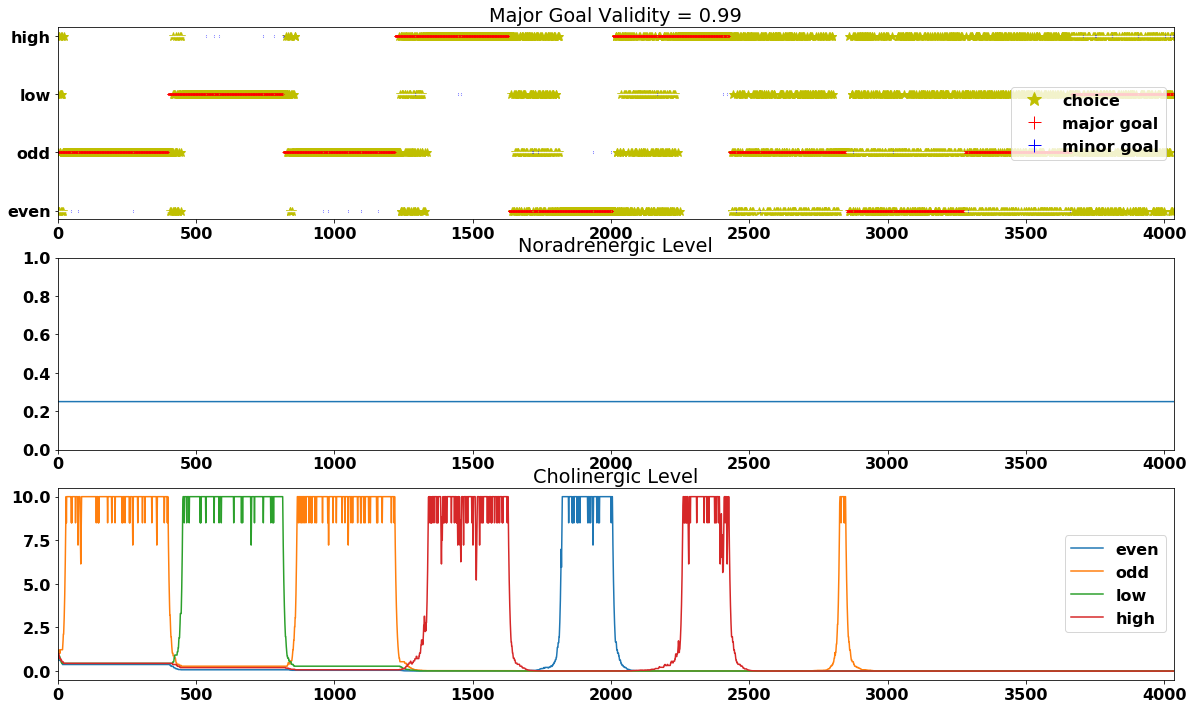

In [51]:
# trialRange+/-30 and two possibly valid cues (2) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_99_2a = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=0.99,ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold, previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=0.99,alterValid=alterValid)


A cue was randomly picked among integers 0~3 (i.e. even, odd, low, high respectively) every 400+/-30 trials for 10 times.
The cue validity was randomly selected among 0.99 in each trial.
A major cue or its alternative is possible for each trial depends on the cue validity.
0/4035 = 0.0% trials occurred when the predicted digit matched the cued digit but the cue was invalid
1833/4035 = 45.4% trials occurred when the predicted digit did not match the cued digit.
    391/4035 trials occurred when the predicted digit did not match the guess-target digit.
    1601/4035 trials occurred when the guess-target digit did not match the cued digit, i.e. when the guessed action was wrong.
2193/4035 = 54.3% trials occurred when the predicted digit matches the major cued digit and is valid
9/4035 = 0.2% trials occurred when the predicted digit matches the minor cued digit and is valid
21/4035 = 0.5% trials occurred when the predicted digit matches the major cued digit but is invalidly altered
Lag len

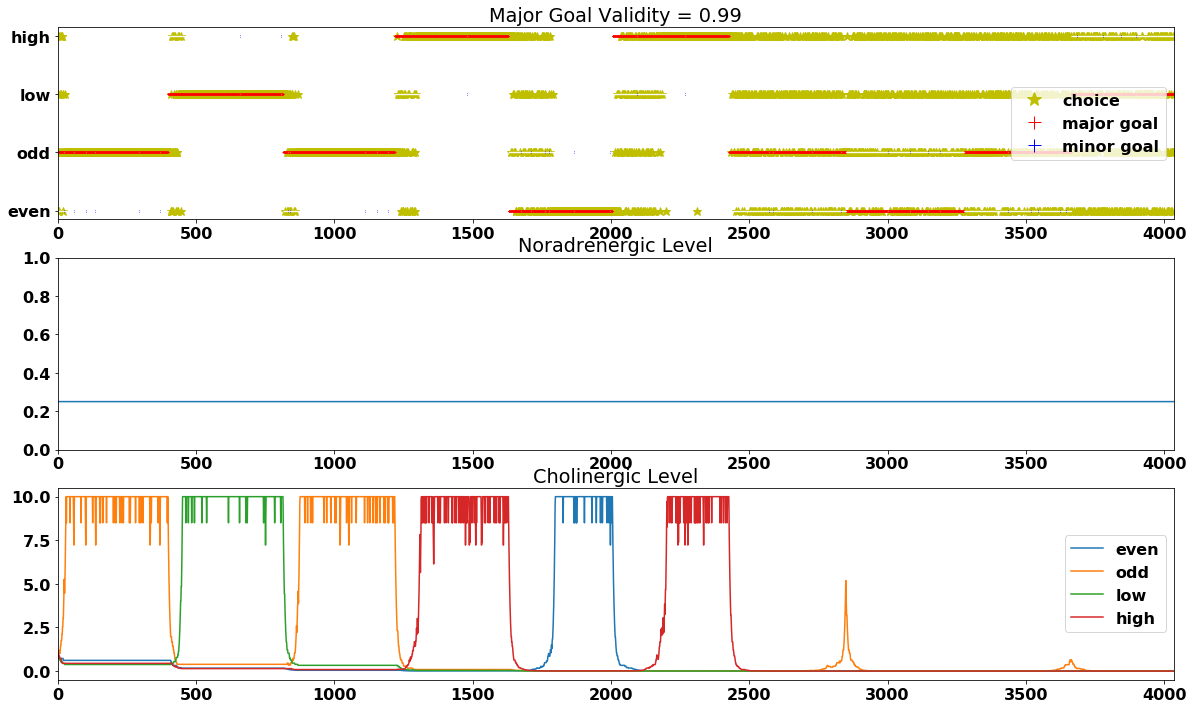

In [52]:
# trialRange+/-30 and two possibly valid cues (3) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_99_3a = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=0.99,ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold, previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=0.99,alterValid=alterValid)


A cue was randomly picked among integers 0~3 (i.e. even, odd, low, high respectively) every 400+/-30 trials for 10 times.
The cue validity was randomly selected among 0.99 in each trial.
A major cue or its alternative is possible for each trial depends on the cue validity.
0/4035 = 0.0% trials occurred when the predicted digit matched the cued digit but the cue was invalid
1436/4035 = 35.6% trials occurred when the predicted digit did not match the cued digit.
    359/4035 trials occurred when the predicted digit did not match the guess-target digit.
    1183/4035 trials occurred when the guess-target digit did not match the cued digit, i.e. when the guessed action was wrong.
2595/4035 = 64.3% trials occurred when the predicted digit matches the major cued digit and is valid
4/4035 = 0.1% trials occurred when the predicted digit matches the minor cued digit and is valid
21/4035 = 0.5% trials occurred when the predicted digit matches the major cued digit but is invalidly altered
Lag len

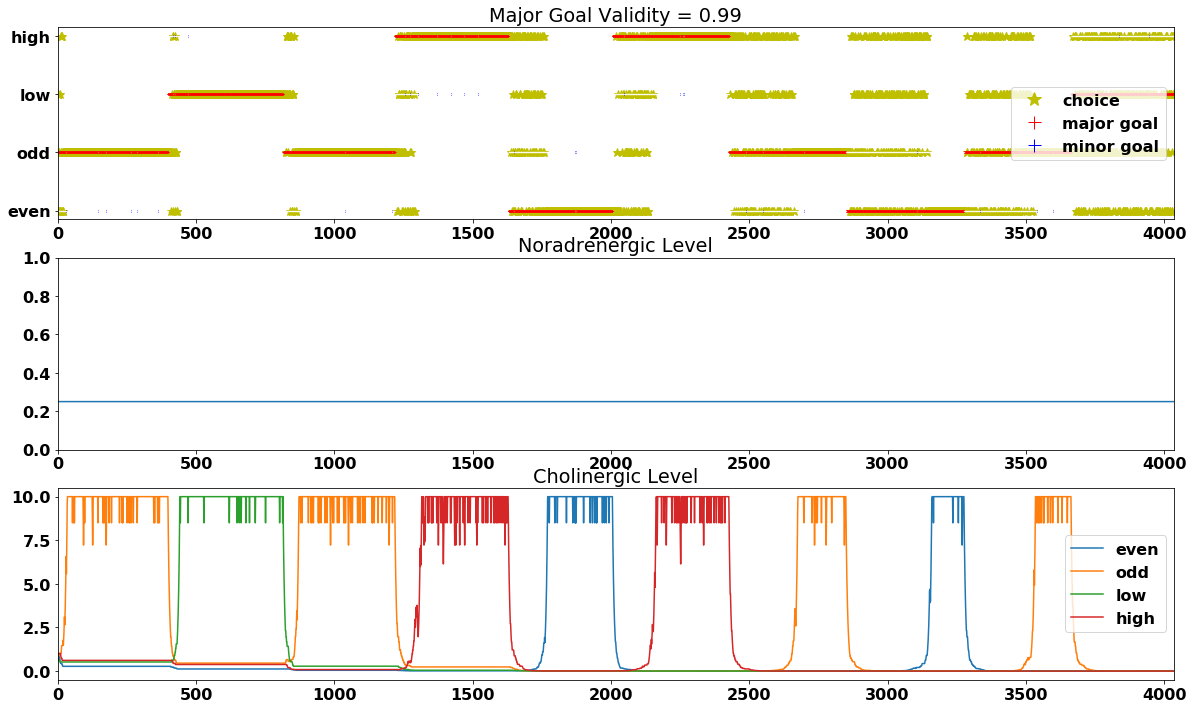

In [53]:
# trialRange+/-30 and two possibly valid cues (4) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_99_4a = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=0.99,ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold, previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=0.99,alterValid=alterValid)


A cue was randomly picked among integers 0~3 (i.e. even, odd, low, high respectively) every 400+/-30 trials for 10 times.
The cue validity was randomly selected among 0.99 in each trial.
A major cue or its alternative is possible for each trial depends on the cue validity.
0/4035 = 0.0% trials occurred when the predicted digit matched the cued digit but the cue was invalid
1700/4035 = 42.1% trials occurred when the predicted digit did not match the cued digit.
    367/4035 trials occurred when the predicted digit did not match the guess-target digit.
    1480/4035 trials occurred when the guess-target digit did not match the cued digit, i.e. when the guessed action was wrong.
2329/4035 = 57.7% trials occurred when the predicted digit matches the major cued digit and is valid
6/4035 = 0.1% trials occurred when the predicted digit matches the minor cued digit and is valid
27/4035 = 0.7% trials occurred when the predicted digit matches the major cued digit but is invalidly altered
Lag len

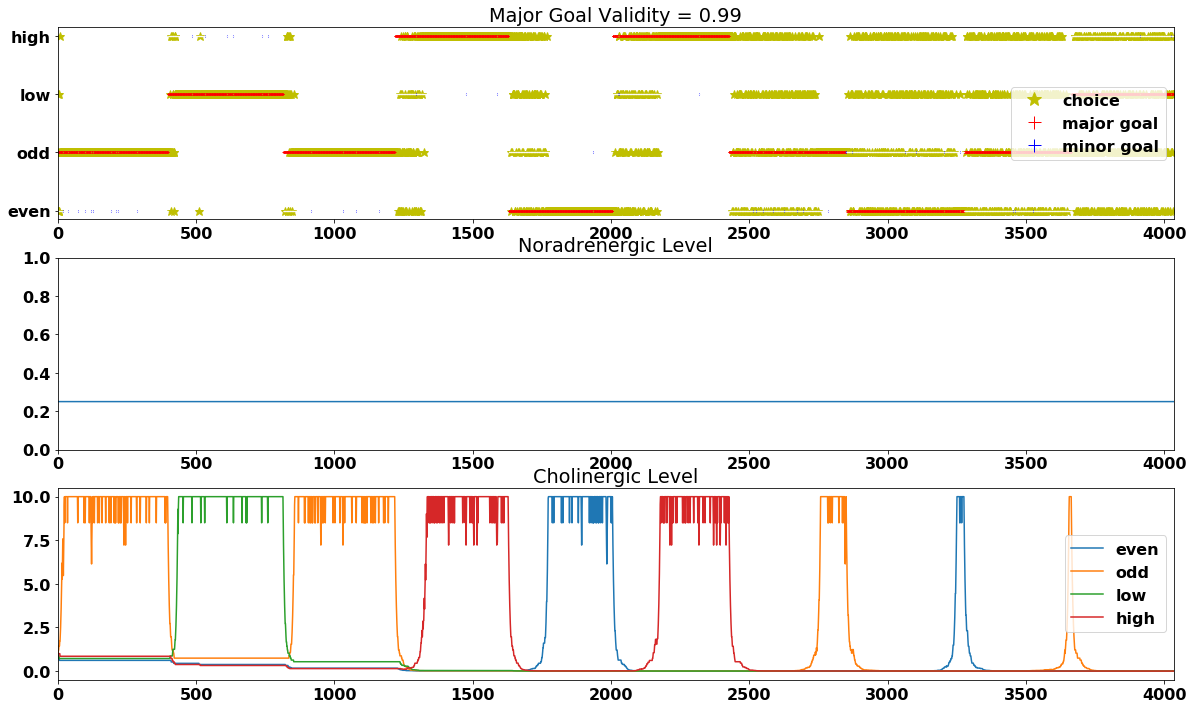

In [54]:
# trialRange+/-30 and two possibly valid cues (5) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_99_5a = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=0.99,ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold, previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=0.99,alterValid=alterValid)


A cue was randomly picked among integers 0~3 (i.e. even, odd, low, high respectively) every 400+/-30 trials for 10 times.
The cue validity was randomly selected among 0.99 in each trial.
A major cue or its alternative is possible for each trial depends on the cue validity.
0/4035 = 0.0% trials occurred when the predicted digit matched the cued digit but the cue was invalid
1316/4035 = 32.6% trials occurred when the predicted digit did not match the cued digit.
    397/4035 trials occurred when the predicted digit did not match the guess-target digit.
    1009/4035 trials occurred when the guess-target digit did not match the cued digit, i.e. when the guessed action was wrong.
2718/4035 = 67.4% trials occurred when the predicted digit matches the major cued digit and is valid
1/4035 = 0.0% trials occurred when the predicted digit matches the minor cued digit and is valid
23/4035 = 0.6% trials occurred when the predicted digit matches the major cued digit but is invalidly altered
Lag len

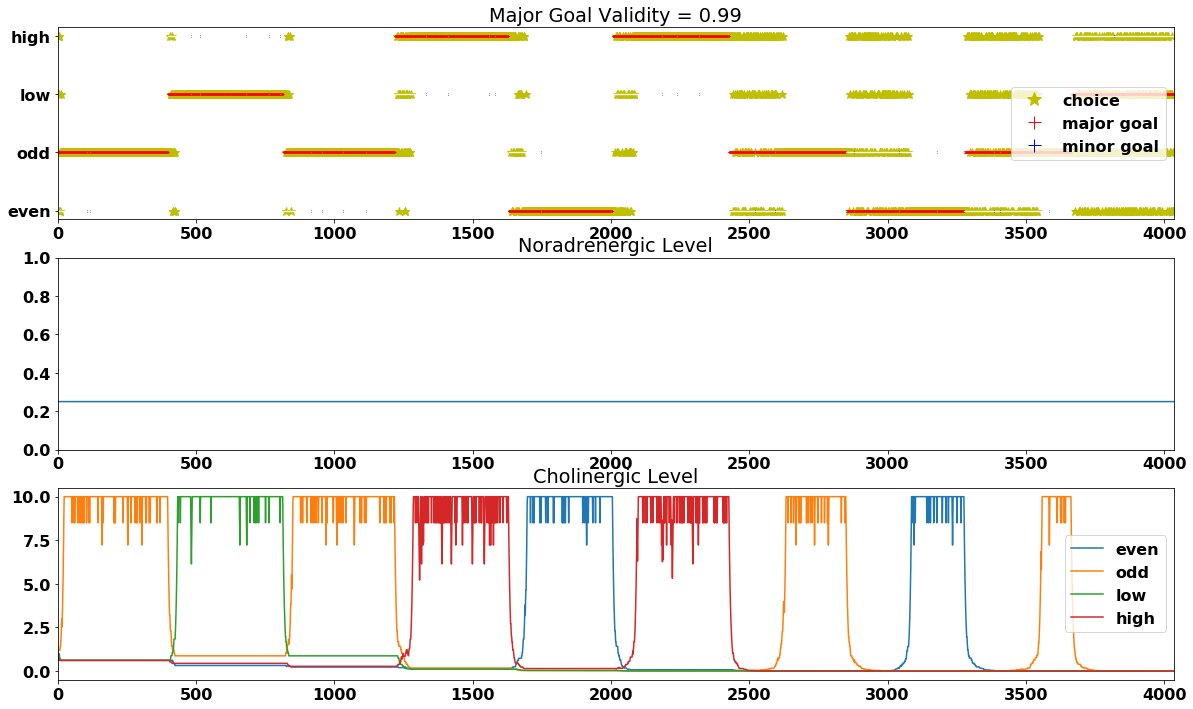

In [55]:
# trialRange+/-30 and two possibly valid cues (6) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_99_6a = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=0.99,ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold, previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=0.99,alterValid=alterValid)


A cue was randomly picked among integers 0~3 (i.e. even, odd, low, high respectively) every 400+/-30 trials for 10 times.
The cue validity was randomly selected among 0.99 in each trial.
A major cue or its alternative is possible for each trial depends on the cue validity.
0/4035 = 0.0% trials occurred when the predicted digit matched the cued digit but the cue was invalid
1923/4035 = 47.7% trials occurred when the predicted digit did not match the cued digit.
    359/4035 trials occurred when the predicted digit did not match the guess-target digit.
    1721/4035 trials occurred when the guess-target digit did not match the cued digit, i.e. when the guessed action was wrong.
2106/4035 = 52.2% trials occurred when the predicted digit matches the major cued digit and is valid
6/4035 = 0.1% trials occurred when the predicted digit matches the minor cued digit and is valid
17/4035 = 0.4% trials occurred when the predicted digit matches the major cued digit but is invalidly altered
Lag len

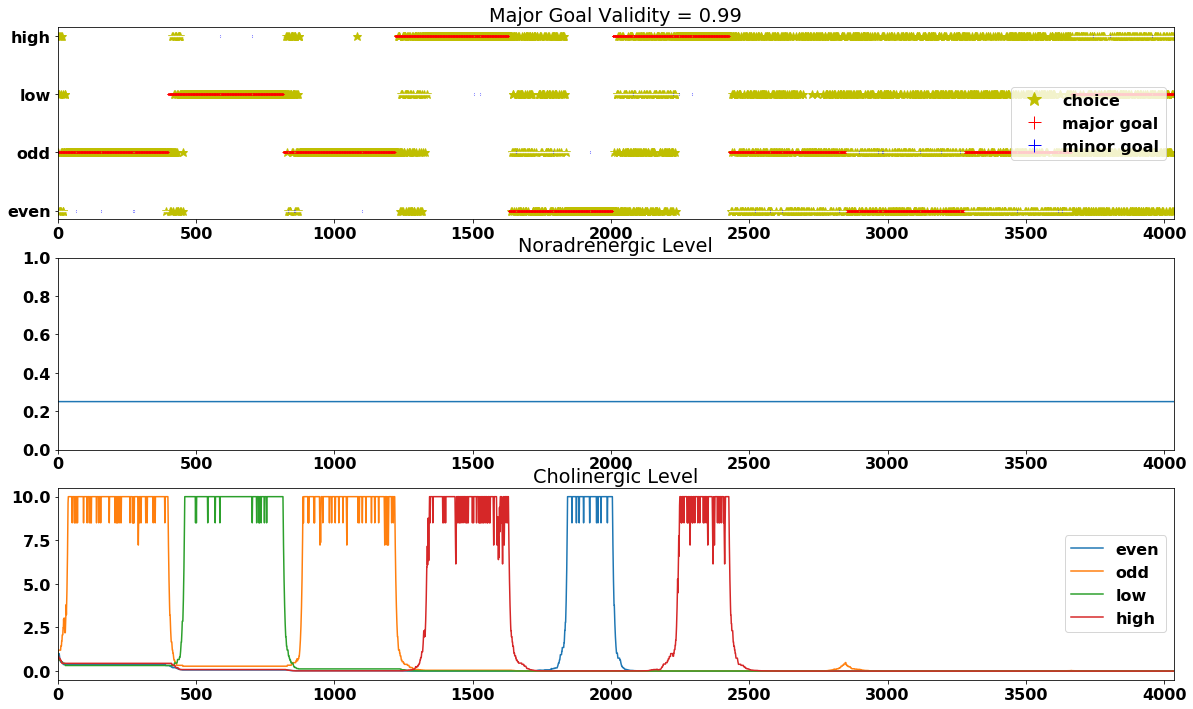

In [56]:
# trialRange+/-30 and two possibly valid cues (7) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_99_7a = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=0.99,ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold, previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=0.99,alterValid=alterValid)


A cue was randomly picked among integers 0~3 (i.e. even, odd, low, high respectively) every 400+/-30 trials for 10 times.
The cue validity was randomly selected among 0.99 in each trial.
A major cue or its alternative is possible for each trial depends on the cue validity.
0/4035 = 0.0% trials occurred when the predicted digit matched the cued digit but the cue was invalid
1830/4035 = 45.4% trials occurred when the predicted digit did not match the cued digit.
    342/4035 trials occurred when the predicted digit did not match the guess-target digit.
    1623/4035 trials occurred when the guess-target digit did not match the cued digit, i.e. when the guessed action was wrong.
2200/4035 = 54.5% trials occurred when the predicted digit matches the major cued digit and is valid
5/4035 = 0.1% trials occurred when the predicted digit matches the minor cued digit and is valid
26/4035 = 0.6% trials occurred when the predicted digit matches the major cued digit but is invalidly altered
Lag len

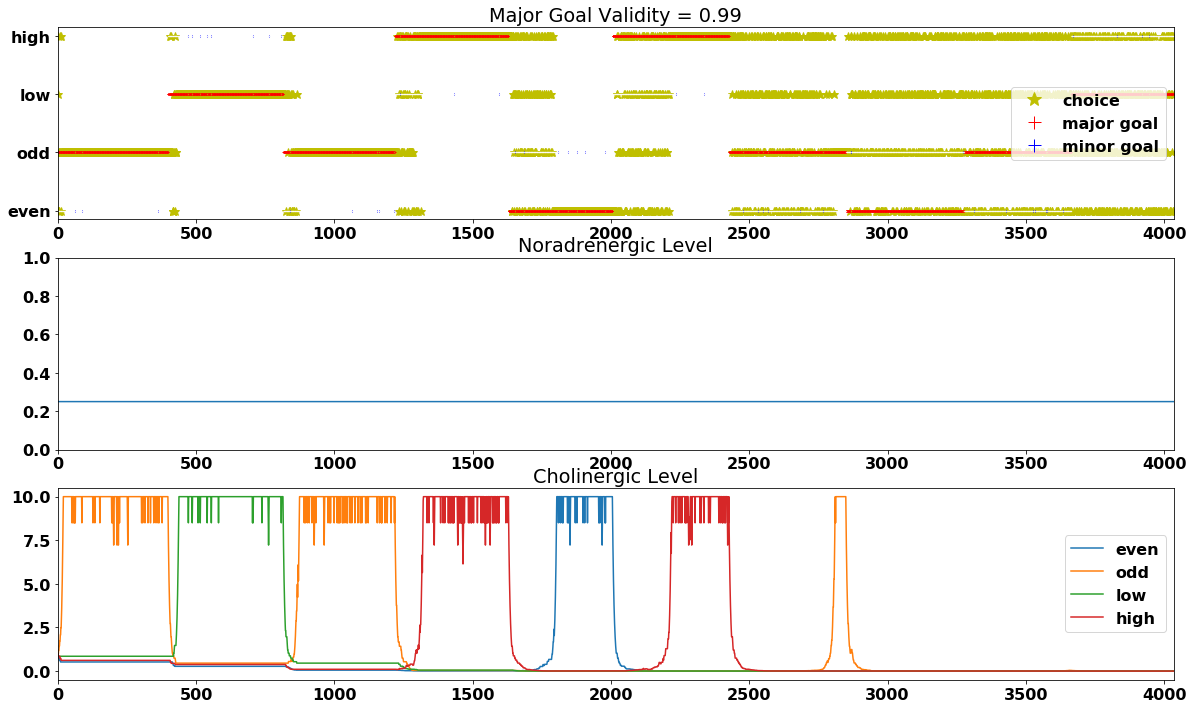

In [57]:
# trialRange+/-30 and two possibly valid cues (8) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_99_8a = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=0.99,ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold, previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=0.99,alterValid=alterValid)


A cue was randomly picked among integers 0~3 (i.e. even, odd, low, high respectively) every 400+/-30 trials for 10 times.
The cue validity was randomly selected among 0.99 in each trial.
A major cue or its alternative is possible for each trial depends on the cue validity.
0/4035 = 0.0% trials occurred when the predicted digit matched the cued digit but the cue was invalid
1404/4035 = 34.8% trials occurred when the predicted digit did not match the cued digit.
    368/4035 trials occurred when the predicted digit did not match the guess-target digit.
    1138/4035 trials occurred when the guess-target digit did not match the cued digit, i.e. when the guessed action was wrong.
2624/4035 = 65.0% trials occurred when the predicted digit matches the major cued digit and is valid
7/4035 = 0.2% trials occurred when the predicted digit matches the minor cued digit and is valid
20/4035 = 0.5% trials occurred when the predicted digit matches the major cued digit but is invalidly altered
Lag len

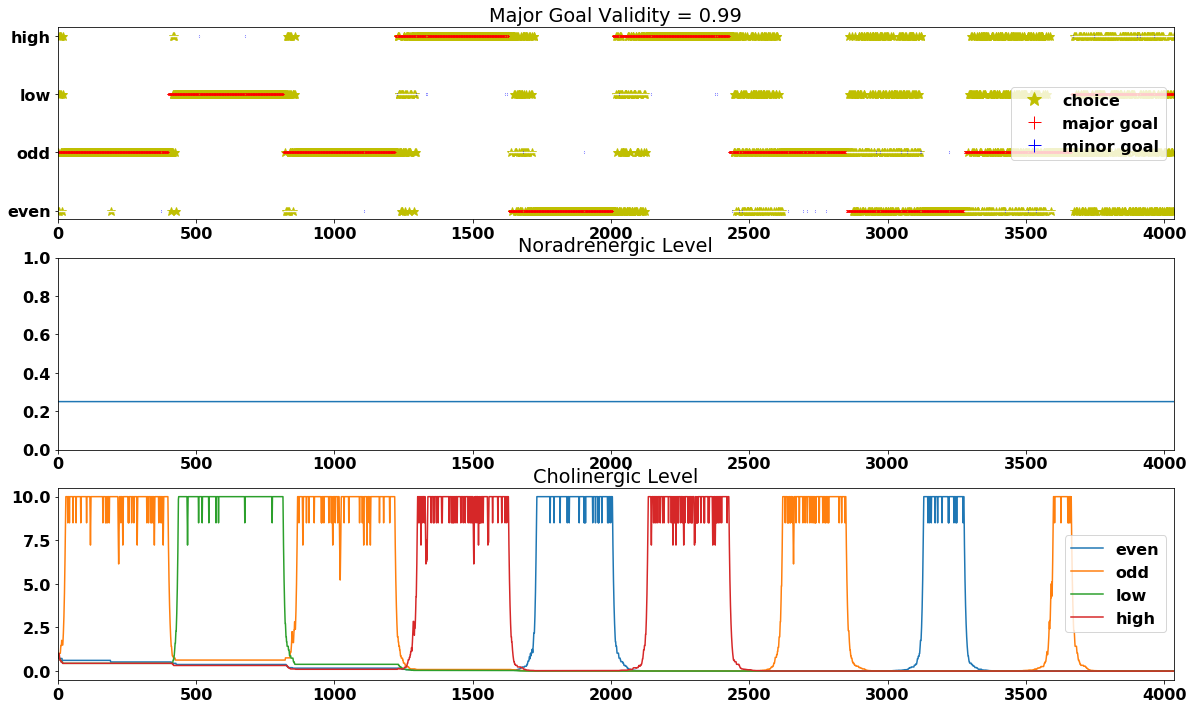

In [58]:
# trialRange+/-30 and two possibly valid cues (9) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_99_9a = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=0.99,ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold, previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=0.99,alterValid=alterValid)


A cue was randomly picked among integers 0~3 (i.e. even, odd, low, high respectively) every 400+/-30 trials for 10 times.
The cue validity was randomly selected among 0.99 in each trial.
A major cue or its alternative is possible for each trial depends on the cue validity.
0/4035 = 0.0% trials occurred when the predicted digit matched the cued digit but the cue was invalid
1994/4035 = 49.4% trials occurred when the predicted digit did not match the cued digit.
    381/4035 trials occurred when the predicted digit did not match the guess-target digit.
    1762/4035 trials occurred when the guess-target digit did not match the cued digit, i.e. when the guessed action was wrong.
2035/4035 = 50.4% trials occurred when the predicted digit matches the major cued digit and is valid
6/4035 = 0.1% trials occurred when the predicted digit matches the minor cued digit and is valid
23/4035 = 0.6% trials occurred when the predicted digit matches the major cued digit but is invalidly altered
Lag len

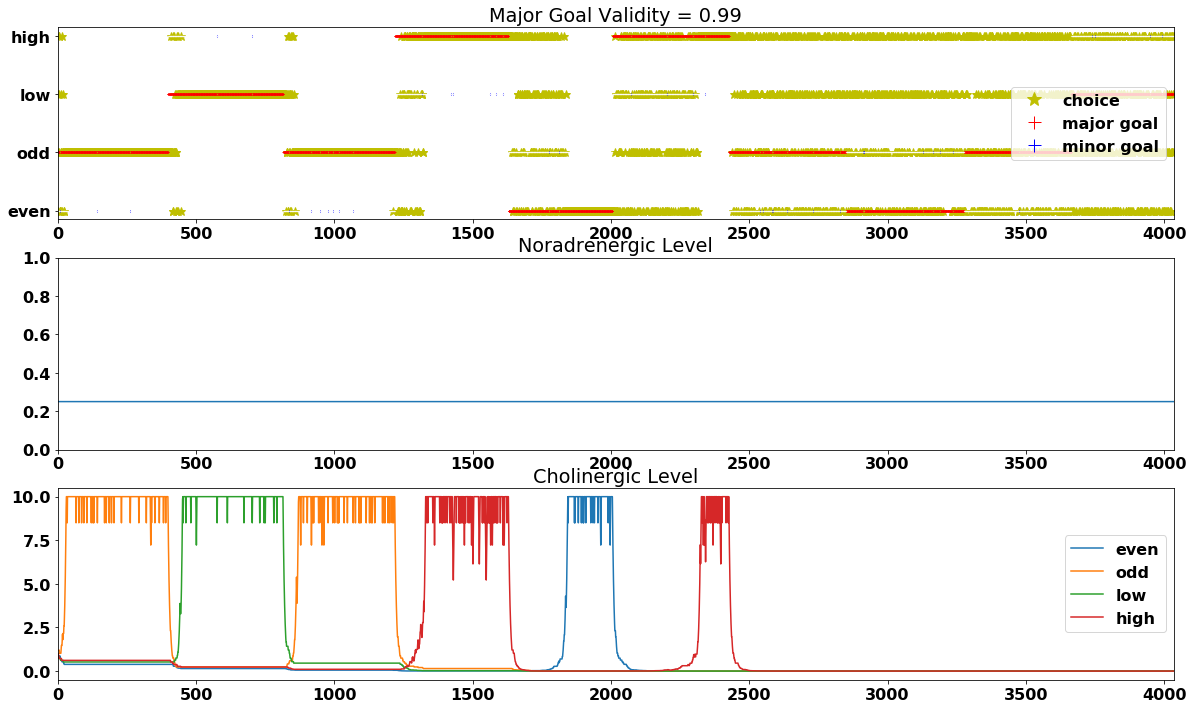

In [59]:
# trialRange+/-30 and two possibly valid cues (10) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_99_10a = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=0.99,ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold, previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=0.99,alterValid=alterValid)


In [60]:
all_99a_case_probs = [all_prob_99_1a,all_prob_99_2a,all_prob_99_3a,all_prob_99_4a,all_prob_99_5a,\
                      all_prob_99_6a,all_prob_99_7a,all_prob_99_8a,all_prob_99_9a,all_prob_99_10a]
averages_99a = average_probs(all_99a_case_probs)


Average lag length is: 206
Average prob pred wrong, prob pred cue A valid, prob pred cue B valid, prob pred cue A invalid,
    prob guess not match cue, prob pred not match guess, prob match cue A invalid alter: 
[0.4223296158612144, 0.5764064436183395, 0.0012639405204460967, 0.0, 0.362998760842627, 0.0921189591078067, 0.0055762081784386614]


### 4.2.2: validity_choices=0.85

A cue was randomly picked among integers 0~3 (i.e. even, odd, low, high respectively) every 400+/-30 trials for 10 times.
The cue validity was randomly selected among 0.85 in each trial.
A major cue or its alternative is possible for each trial depends on the cue validity.
0/4035 = 0.0% trials occurred when the predicted digit matched the cued digit but the cue was invalid
2465/4035 = 61.1% trials occurred when the predicted digit did not match the cued digit.
    390/4035 trials occurred when the predicted digit did not match the guess-target digit.
    2297/4035 trials occurred when the guess-target digit did not match the cued digit, i.e. when the guessed action was wrong.
1474/4035 = 36.5% trials occurred when the predicted digit matches the major cued digit and is valid
96/4035 = 2.4% trials occurred when the predicted digit matches the minor cued digit and is valid
263/4035 = 6.5% trials occurred when the predicted digit matches the major cued digit but is invalidly altered
Lag l

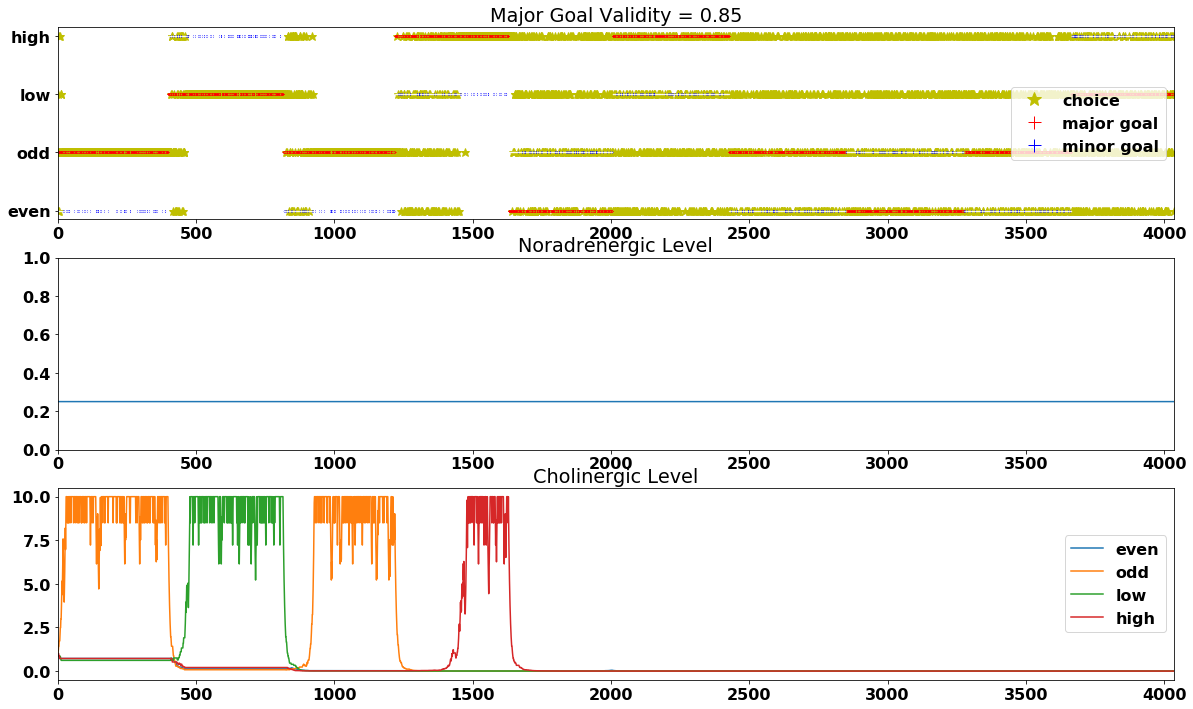

In [61]:
# trialRange+/-30 and two possibly valid cues (1) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_85_1a = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=0.85,ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold, previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=0.85,alterValid=alterValid)


A cue was randomly picked among integers 0~3 (i.e. even, odd, low, high respectively) every 400+/-30 trials for 10 times.
The cue validity was randomly selected among 0.85 in each trial.
A major cue or its alternative is possible for each trial depends on the cue validity.
0/4035 = 0.0% trials occurred when the predicted digit matched the cued digit but the cue was invalid
2203/4035 = 54.6% trials occurred when the predicted digit did not match the cued digit.
    356/4035 trials occurred when the predicted digit did not match the guess-target digit.
    2033/4035 trials occurred when the guess-target digit did not match the cued digit, i.e. when the guessed action was wrong.
1759/4035 = 43.6% trials occurred when the predicted digit matches the major cued digit and is valid
73/4035 = 1.8% trials occurred when the predicted digit matches the minor cued digit and is valid
323/4035 = 8.0% trials occurred when the predicted digit matches the major cued digit but is invalidly altered
Lag l

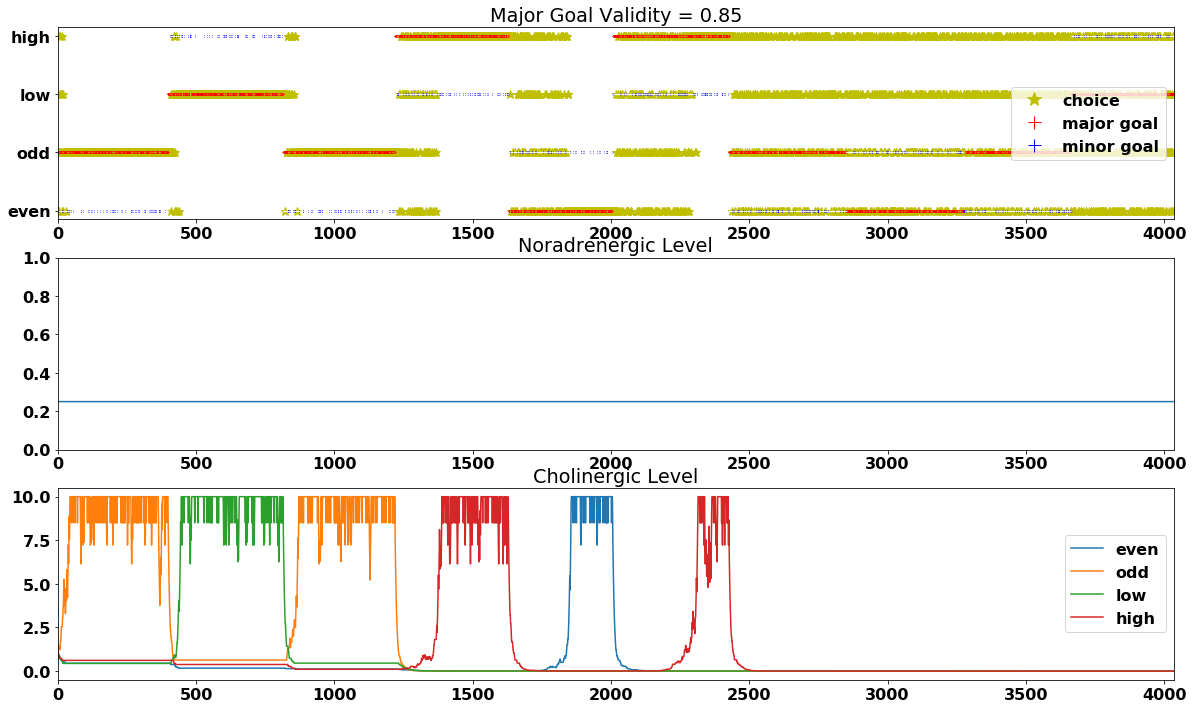

In [62]:
# trialRange+/-30 and two possibly valid cues (2) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_85_2a = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=0.85,ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold, previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=0.85,alterValid=alterValid)


A cue was randomly picked among integers 0~3 (i.e. even, odd, low, high respectively) every 400+/-30 trials for 10 times.
The cue validity was randomly selected among 0.85 in each trial.
A major cue or its alternative is possible for each trial depends on the cue validity.
0/4035 = 0.0% trials occurred when the predicted digit matched the cued digit but the cue was invalid
2568/4035 = 63.6% trials occurred when the predicted digit did not match the cued digit.
    371/4035 trials occurred when the predicted digit did not match the guess-target digit.
    2428/4035 trials occurred when the guess-target digit did not match the cued digit, i.e. when the guessed action was wrong.
1364/4035 = 33.8% trials occurred when the predicted digit matches the major cued digit and is valid
103/4035 = 2.6% trials occurred when the predicted digit matches the minor cued digit and is valid
248/4035 = 6.1% trials occurred when the predicted digit matches the major cued digit but is invalidly altered
Lag 

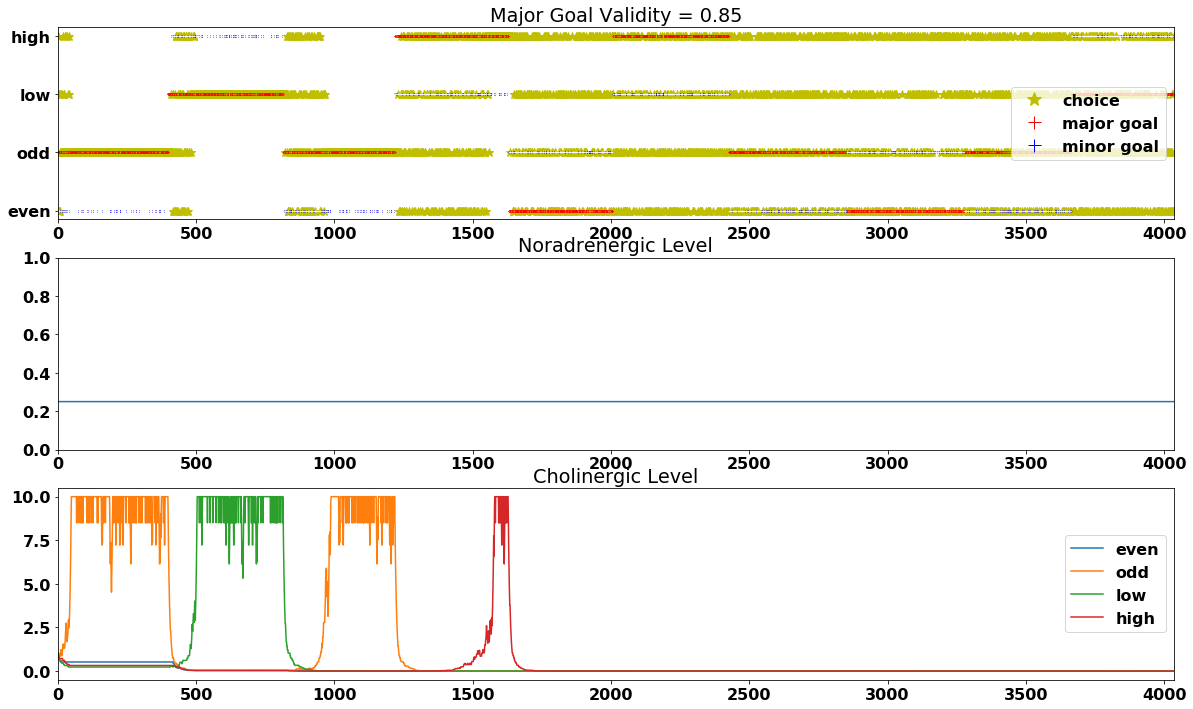

In [63]:
# trialRange+/-30 and two possibly valid cues (3) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_85_3a = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=0.85,ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold, previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=0.85,alterValid=alterValid)


A cue was randomly picked among integers 0~3 (i.e. even, odd, low, high respectively) every 400+/-30 trials for 10 times.
The cue validity was randomly selected among 0.85 in each trial.
A major cue or its alternative is possible for each trial depends on the cue validity.
0/4035 = 0.0% trials occurred when the predicted digit matched the cued digit but the cue was invalid
2481/4035 = 61.5% trials occurred when the predicted digit did not match the cued digit.
    391/4035 trials occurred when the predicted digit did not match the guess-target digit.
    2317/4035 trials occurred when the guess-target digit did not match the cued digit, i.e. when the guessed action was wrong.
1463/4035 = 36.3% trials occurred when the predicted digit matches the major cued digit and is valid
91/4035 = 2.3% trials occurred when the predicted digit matches the minor cued digit and is valid
264/4035 = 6.5% trials occurred when the predicted digit matches the major cued digit but is invalidly altered
Lag l

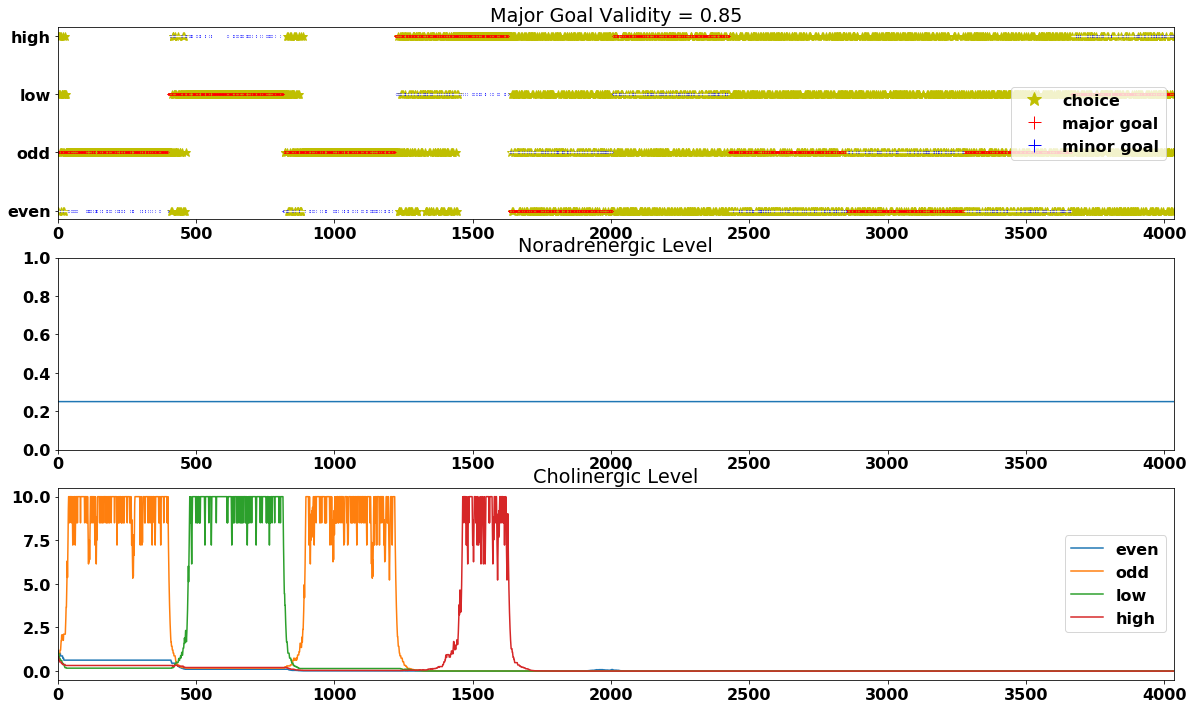

In [64]:
# trialRange+/-30 and two possibly valid cues (4) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_85_4a = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=0.85,ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold, previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=0.85,alterValid=alterValid)


A cue was randomly picked among integers 0~3 (i.e. even, odd, low, high respectively) every 400+/-30 trials for 10 times.
The cue validity was randomly selected among 0.85 in each trial.
A major cue or its alternative is possible for each trial depends on the cue validity.
0/4035 = 0.0% trials occurred when the predicted digit matched the cued digit but the cue was invalid
2467/4035 = 61.1% trials occurred when the predicted digit did not match the cued digit.
    373/4035 trials occurred when the predicted digit did not match the guess-target digit.
    2297/4035 trials occurred when the guess-target digit did not match the cued digit, i.e. when the guessed action was wrong.
1483/4035 = 36.8% trials occurred when the predicted digit matches the major cued digit and is valid
85/4035 = 2.1% trials occurred when the predicted digit matches the minor cued digit and is valid
277/4035 = 6.9% trials occurred when the predicted digit matches the major cued digit but is invalidly altered
Lag l

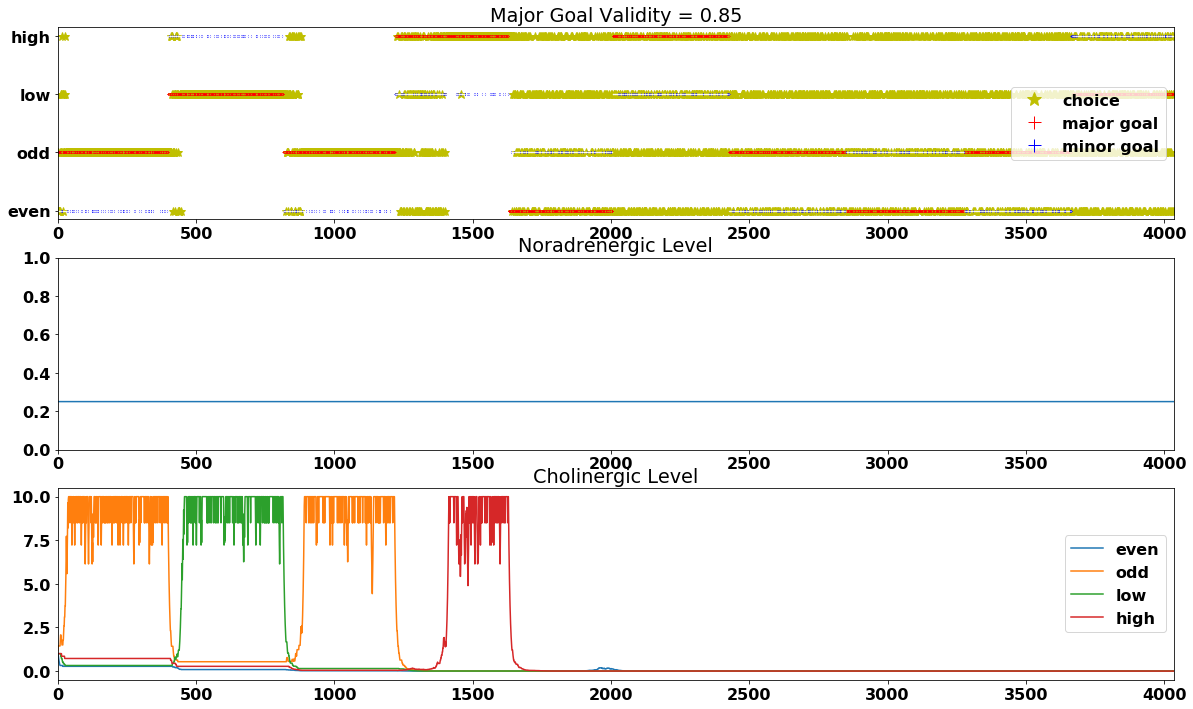

In [65]:
# trialRange+/-30 and two possibly valid cues (5) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_85_5a = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=0.85,ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold, previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=0.85,alterValid=alterValid)


A cue was randomly picked among integers 0~3 (i.e. even, odd, low, high respectively) every 400+/-30 trials for 10 times.
The cue validity was randomly selected among 0.85 in each trial.
A major cue or its alternative is possible for each trial depends on the cue validity.
0/4035 = 0.0% trials occurred when the predicted digit matched the cued digit but the cue was invalid
2362/4035 = 58.5% trials occurred when the predicted digit did not match the cued digit.
    322/4035 trials occurred when the predicted digit did not match the guess-target digit.
    2226/4035 trials occurred when the guess-target digit did not match the cued digit, i.e. when the guessed action was wrong.
1584/4035 = 39.3% trials occurred when the predicted digit matches the major cued digit and is valid
89/4035 = 2.2% trials occurred when the predicted digit matches the minor cued digit and is valid
263/4035 = 6.5% trials occurred when the predicted digit matches the major cued digit but is invalidly altered
Lag l

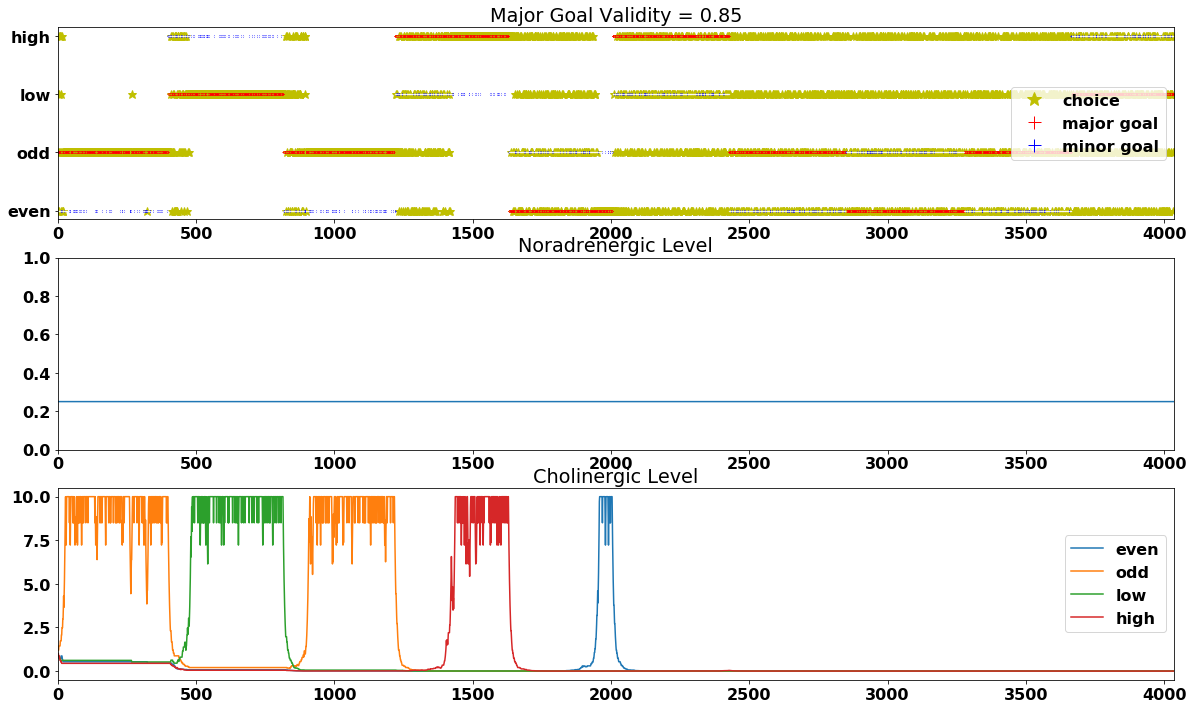

In [66]:
# trialRange+/-30 and two possibly valid cues (6) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_85_6a = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=0.85,ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold, previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=0.85,alterValid=alterValid)


A cue was randomly picked among integers 0~3 (i.e. even, odd, low, high respectively) every 400+/-30 trials for 10 times.
The cue validity was randomly selected among 0.85 in each trial.
A major cue or its alternative is possible for each trial depends on the cue validity.
0/4035 = 0.0% trials occurred when the predicted digit matched the cued digit but the cue was invalid
2033/4035 = 50.4% trials occurred when the predicted digit did not match the cued digit.
    367/4035 trials occurred when the predicted digit did not match the guess-target digit.
    1851/4035 trials occurred when the guess-target digit did not match the cued digit, i.e. when the guessed action was wrong.
1932/4035 = 47.9% trials occurred when the predicted digit matches the major cued digit and is valid
70/4035 = 1.7% trials occurred when the predicted digit matches the minor cued digit and is valid
319/4035 = 7.9% trials occurred when the predicted digit matches the major cued digit but is invalidly altered
Lag l

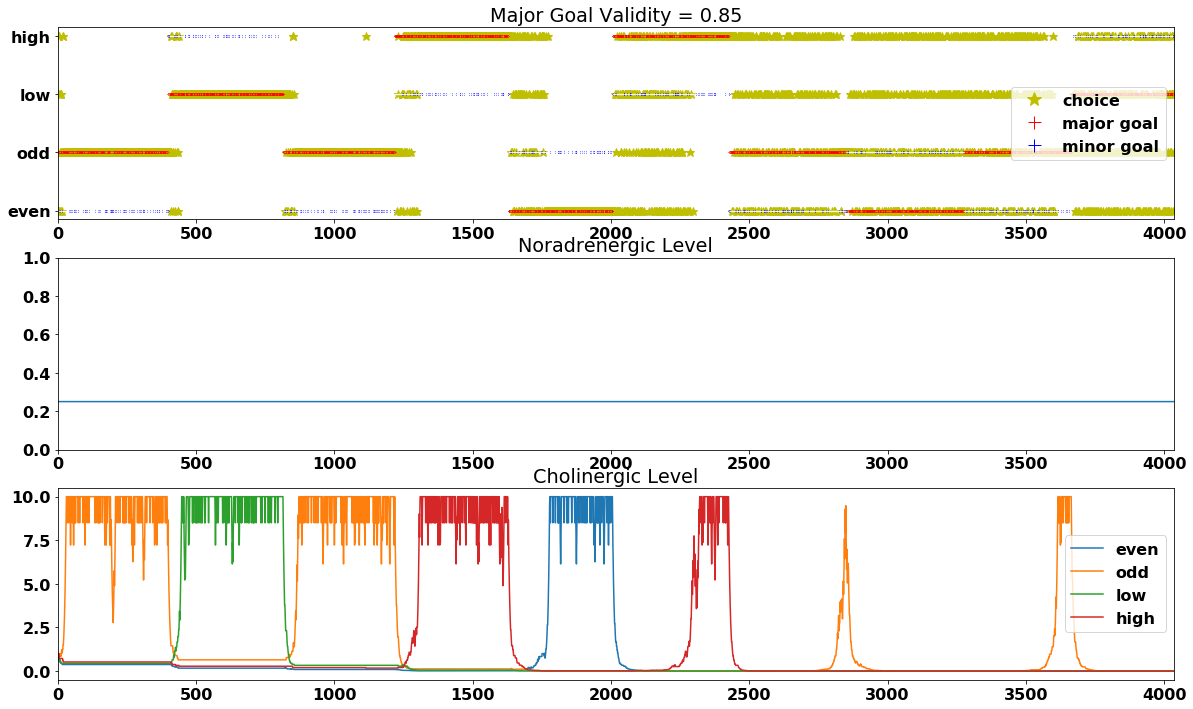

In [67]:
# trialRange+/-30 and two possibly valid cues (7) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_85_7a = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=0.85,ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold, previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=0.85,alterValid=alterValid)


A cue was randomly picked among integers 0~3 (i.e. even, odd, low, high respectively) every 400+/-30 trials for 10 times.
The cue validity was randomly selected among 0.85 in each trial.
A major cue or its alternative is possible for each trial depends on the cue validity.
0/4035 = 0.0% trials occurred when the predicted digit matched the cued digit but the cue was invalid
2557/4035 = 63.4% trials occurred when the predicted digit did not match the cued digit.
    354/4035 trials occurred when the predicted digit did not match the guess-target digit.
    2417/4035 trials occurred when the guess-target digit did not match the cued digit, i.e. when the guessed action was wrong.
1362/4035 = 33.8% trials occurred when the predicted digit matches the major cued digit and is valid
116/4035 = 2.9% trials occurred when the predicted digit matches the minor cued digit and is valid
257/4035 = 6.4% trials occurred when the predicted digit matches the major cued digit but is invalidly altered
Lag 

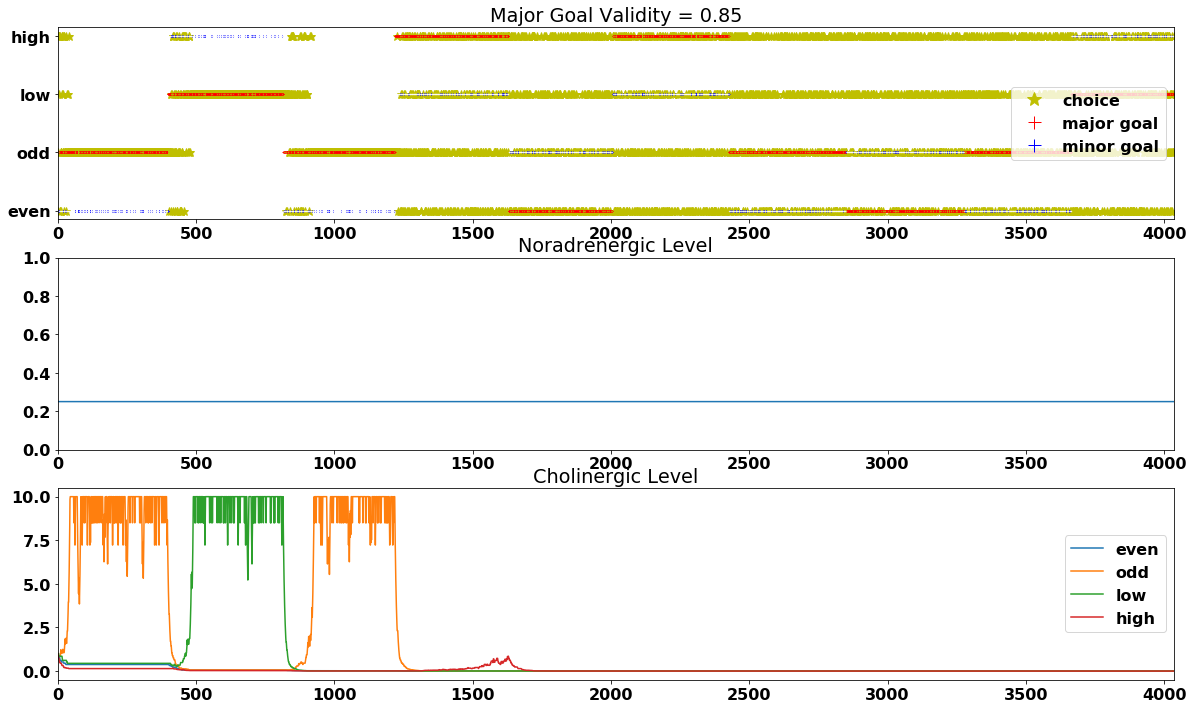

In [68]:
# trialRange+/-30 and two possibly valid cues (8) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_85_8a = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=0.85,ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold, previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=0.85,alterValid=alterValid)


A cue was randomly picked among integers 0~3 (i.e. even, odd, low, high respectively) every 400+/-30 trials for 10 times.
The cue validity was randomly selected among 0.85 in each trial.
A major cue or its alternative is possible for each trial depends on the cue validity.
0/4035 = 0.0% trials occurred when the predicted digit matched the cued digit but the cue was invalid
2443/4035 = 60.5% trials occurred when the predicted digit did not match the cued digit.
    324/4035 trials occurred when the predicted digit did not match the guess-target digit.
    2301/4035 trials occurred when the guess-target digit did not match the cued digit, i.e. when the guessed action was wrong.
1492/4035 = 37.0% trials occurred when the predicted digit matches the major cued digit and is valid
100/4035 = 2.5% trials occurred when the predicted digit matches the minor cued digit and is valid
284/4035 = 7.0% trials occurred when the predicted digit matches the major cued digit but is invalidly altered
Lag 

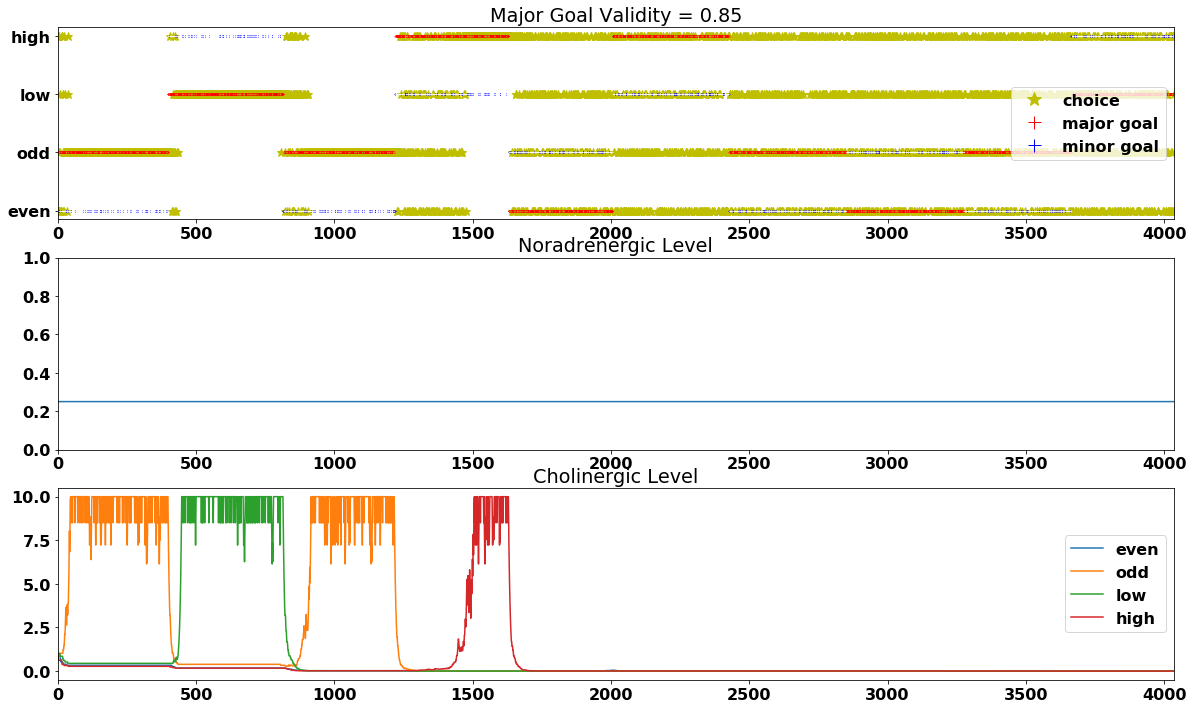

In [69]:
# trialRange+/-30 and two possibly valid cues (9) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_85_9a = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=0.85,ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold, previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=0.85,alterValid=alterValid)


A cue was randomly picked among integers 0~3 (i.e. even, odd, low, high respectively) every 400+/-30 trials for 10 times.
The cue validity was randomly selected among 0.85 in each trial.
A major cue or its alternative is possible for each trial depends on the cue validity.
0/4035 = 0.0% trials occurred when the predicted digit matched the cued digit but the cue was invalid
2426/4035 = 60.1% trials occurred when the predicted digit did not match the cued digit.
    362/4035 trials occurred when the predicted digit did not match the guess-target digit.
    2261/4035 trials occurred when the guess-target digit did not match the cued digit, i.e. when the guessed action was wrong.
1515/4035 = 37.5% trials occurred when the predicted digit matches the major cued digit and is valid
94/4035 = 2.3% trials occurred when the predicted digit matches the minor cued digit and is valid
272/4035 = 6.7% trials occurred when the predicted digit matches the major cued digit but is invalidly altered
Lag l

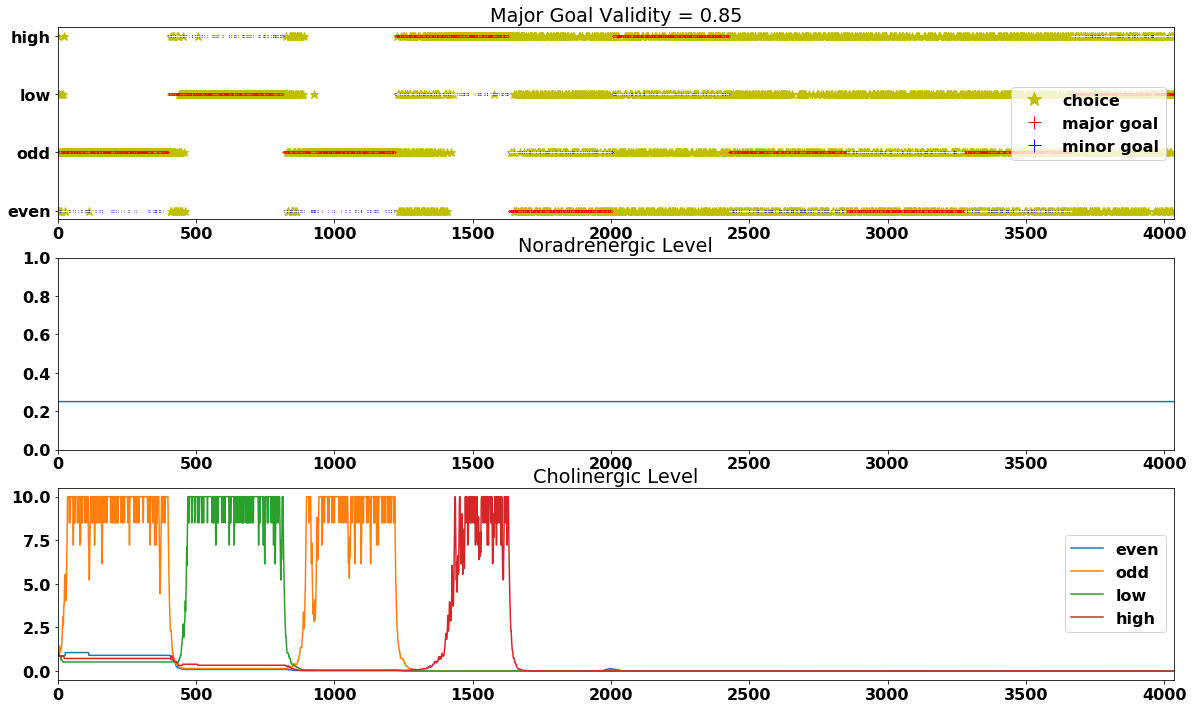

In [70]:
# trialRange+/-30 and two possibly valid cues (10) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_85_10a = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=0.85,ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold, previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=0.85,alterValid=alterValid)


In [71]:
all_85a_case_probs = [all_prob_85_1a,all_prob_85_2a,all_prob_85_3a,all_prob_85_4a,all_prob_85_5a,\
                      all_prob_85_6a,all_prob_85_7a,all_prob_85_8a,all_prob_85_9a,all_prob_85_10a]
averages_85a = average_probs(all_85a_case_probs)


Average lag length is: 284
Average prob pred wrong, prob pred cue A valid, prob pred cue B valid, prob pred cue A invalid,
    prob guess not match cue, prob pred not match guess, prob match cue A invalid alter: 
[0.5949194547707559, 0.3823543990086741, 0.02272614622057001, 0.0, 0.5558364312267658, 0.08946716232961585, 0.06864931846344485]


### 4.2.3: validity_choices=0.7

A cue was randomly picked among integers 0~3 (i.e. even, odd, low, high respectively) every 400+/-30 trials for 10 times.
The cue validity was randomly selected among 0.7 in each trial.
A major cue or its alternative is possible for each trial depends on the cue validity.
0/4035 = 0.0% trials occurred when the predicted digit matched the cued digit but the cue was invalid
2642/4035 = 65.5% trials occurred when the predicted digit did not match the cued digit.
    372/4035 trials occurred when the predicted digit did not match the guess-target digit.
    2516/4035 trials occurred when the guess-target digit did not match the cued digit, i.e. when the guessed action was wrong.
1208/4035 = 29.9% trials occurred when the predicted digit matches the major cued digit and is valid
185/4035 = 4.6% trials occurred when the predicted digit matches the minor cued digit and is valid
472/4035 = 11.7% trials occurred when the predicted digit matches the major cued digit but is invalidly altered
Lag 

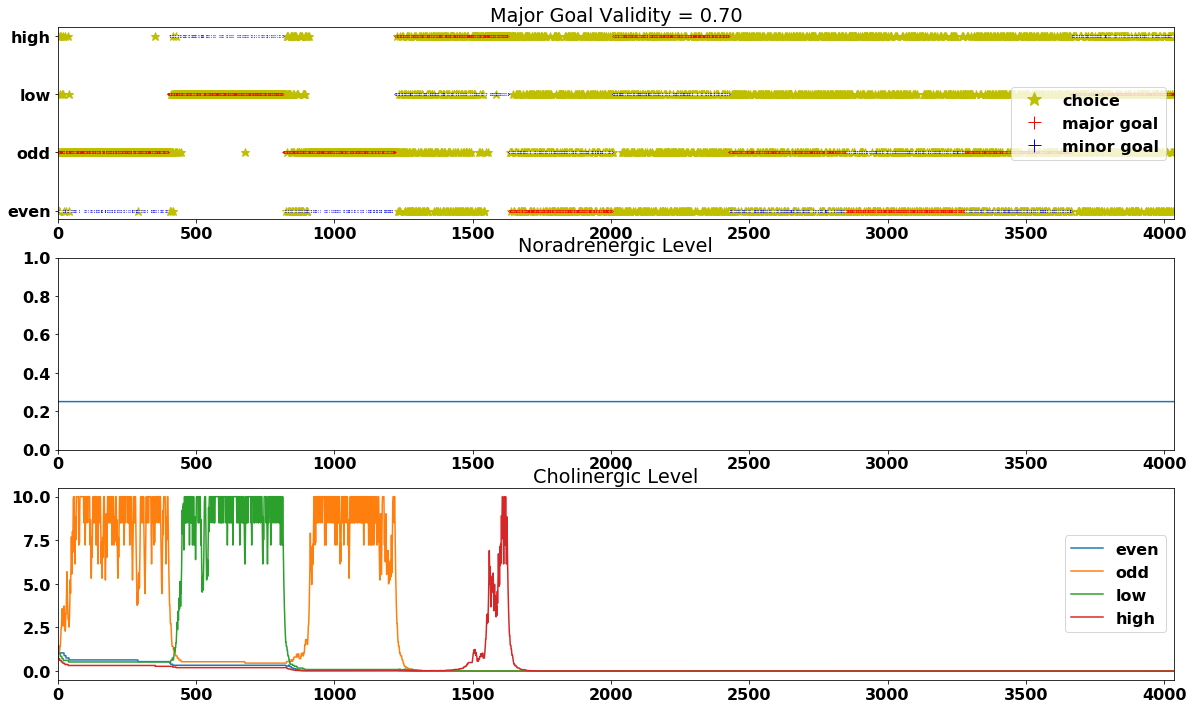

In [72]:
# trialRange+/-30 and two possibly valid cues (1) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_70_1a = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=0.70,ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold, previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=0.70,alterValid=alterValid)


A cue was randomly picked among integers 0~3 (i.e. even, odd, low, high respectively) every 400+/-30 trials for 10 times.
The cue validity was randomly selected among 0.7 in each trial.
A major cue or its alternative is possible for each trial depends on the cue validity.
0/4035 = 0.0% trials occurred when the predicted digit matched the cued digit but the cue was invalid
2725/4035 = 67.5% trials occurred when the predicted digit did not match the cued digit.
    345/4035 trials occurred when the predicted digit did not match the guess-target digit.
    2612/4035 trials occurred when the guess-target digit did not match the cued digit, i.e. when the guessed action was wrong.
1097/4035 = 27.2% trials occurred when the predicted digit matches the major cued digit and is valid
213/4035 = 5.3% trials occurred when the predicted digit matches the minor cued digit and is valid
452/4035 = 11.2% trials occurred when the predicted digit matches the major cued digit but is invalidly altered
Lag 

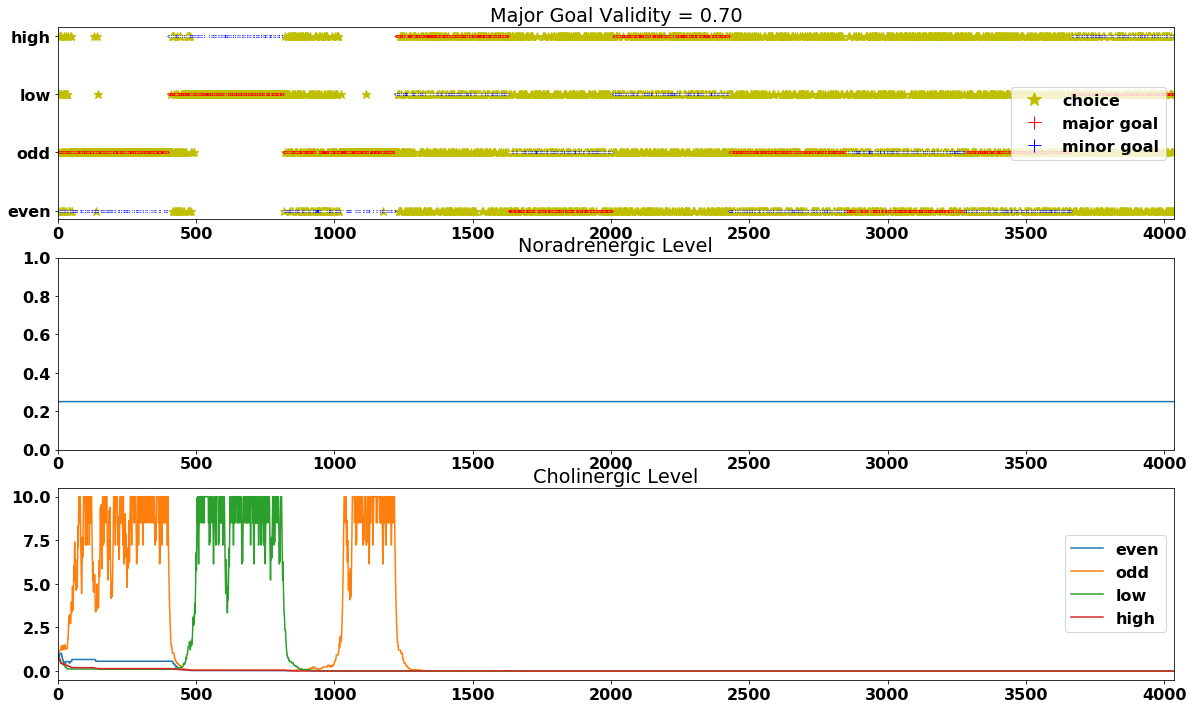

In [73]:
# trialRange+/-30 and two possibly valid cues (2) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_70_2a = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=0.70,ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold, previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=0.70,alterValid=alterValid)


A cue was randomly picked among integers 0~3 (i.e. even, odd, low, high respectively) every 400+/-30 trials for 10 times.
The cue validity was randomly selected among 0.7 in each trial.
A major cue or its alternative is possible for each trial depends on the cue validity.
0/4035 = 0.0% trials occurred when the predicted digit matched the cued digit but the cue was invalid
2846/4035 = 70.5% trials occurred when the predicted digit did not match the cued digit.
    343/4035 trials occurred when the predicted digit did not match the guess-target digit.
    2744/4035 trials occurred when the guess-target digit did not match the cued digit, i.e. when the guessed action was wrong.
951/4035 = 23.6% trials occurred when the predicted digit matches the major cued digit and is valid
238/4035 = 5.9% trials occurred when the predicted digit matches the minor cued digit and is valid
395/4035 = 9.8% trials occurred when the predicted digit matches the major cued digit but is invalidly altered
Lag le

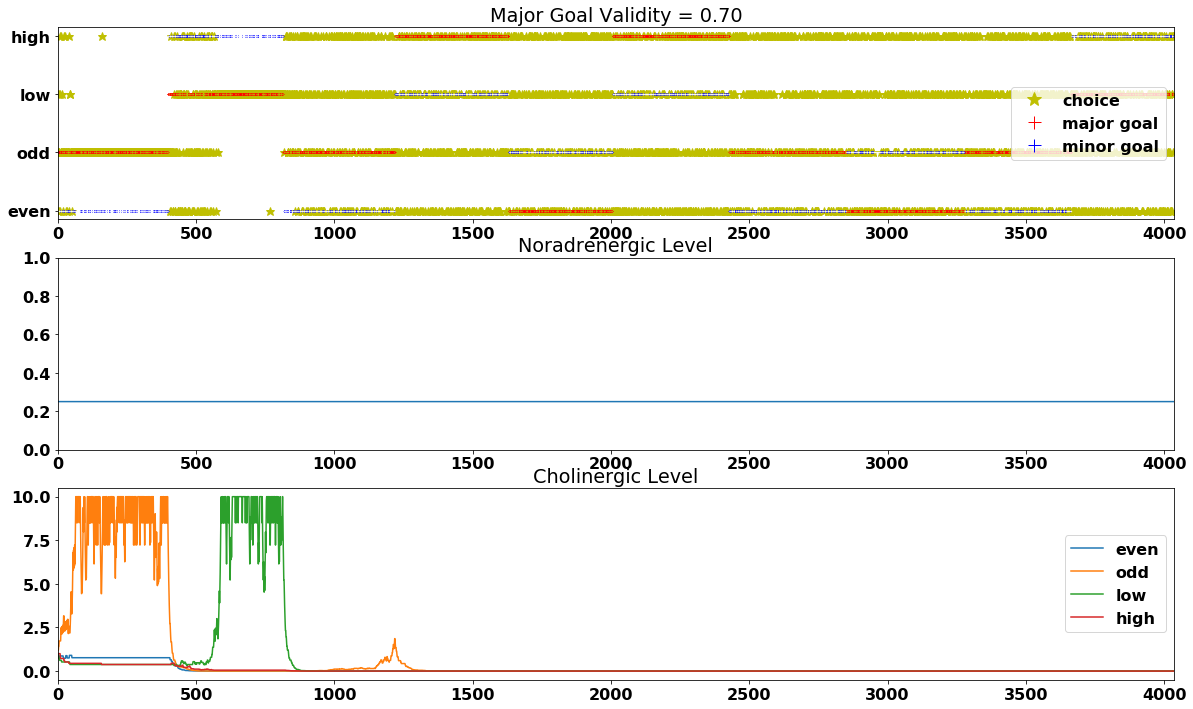

In [74]:
# trialRange+/-30 and two possibly valid cues (3) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_70_3a = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=0.70,ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold, previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=0.70,alterValid=alterValid)


A cue was randomly picked among integers 0~3 (i.e. even, odd, low, high respectively) every 400+/-30 trials for 10 times.
The cue validity was randomly selected among 0.7 in each trial.
A major cue or its alternative is possible for each trial depends on the cue validity.
0/4035 = 0.0% trials occurred when the predicted digit matched the cued digit but the cue was invalid
2781/4035 = 68.9% trials occurred when the predicted digit did not match the cued digit.
    320/4035 trials occurred when the predicted digit did not match the guess-target digit.
    2666/4035 trials occurred when the guess-target digit did not match the cued digit, i.e. when the guessed action was wrong.
1056/4035 = 26.2% trials occurred when the predicted digit matches the major cued digit and is valid
198/4035 = 4.9% trials occurred when the predicted digit matches the minor cued digit and is valid
455/4035 = 11.3% trials occurred when the predicted digit matches the major cued digit but is invalidly altered
Lag 

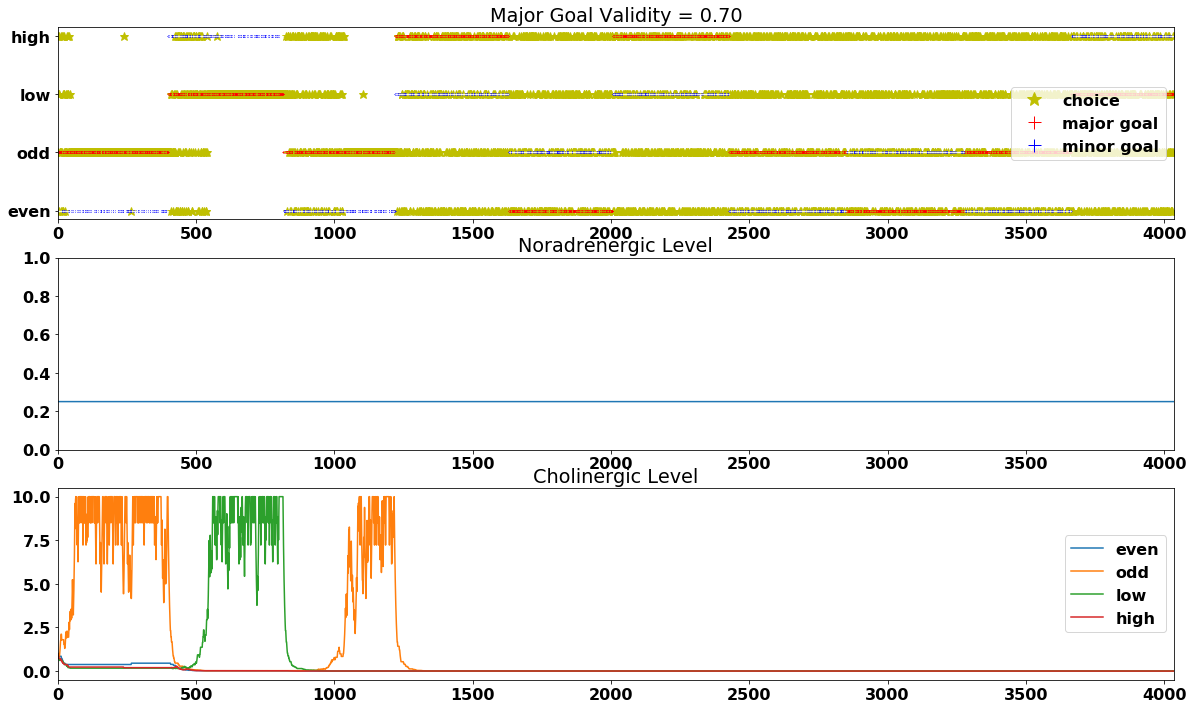

In [75]:
# trialRange+/-30 and two possibly valid cues (4) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_70_4a = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=0.70,ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold, previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=0.70,alterValid=alterValid)


A cue was randomly picked among integers 0~3 (i.e. even, odd, low, high respectively) every 400+/-30 trials for 10 times.
The cue validity was randomly selected among 0.7 in each trial.
A major cue or its alternative is possible for each trial depends on the cue validity.
0/4035 = 0.0% trials occurred when the predicted digit matched the cued digit but the cue was invalid
2662/4035 = 66.0% trials occurred when the predicted digit did not match the cued digit.
    327/4035 trials occurred when the predicted digit did not match the guess-target digit.
    2552/4035 trials occurred when the guess-target digit did not match the cued digit, i.e. when the guessed action was wrong.
1157/4035 = 28.7% trials occurred when the predicted digit matches the major cued digit and is valid
216/4035 = 5.4% trials occurred when the predicted digit matches the minor cued digit and is valid
457/4035 = 11.3% trials occurred when the predicted digit matches the major cued digit but is invalidly altered
Lag 

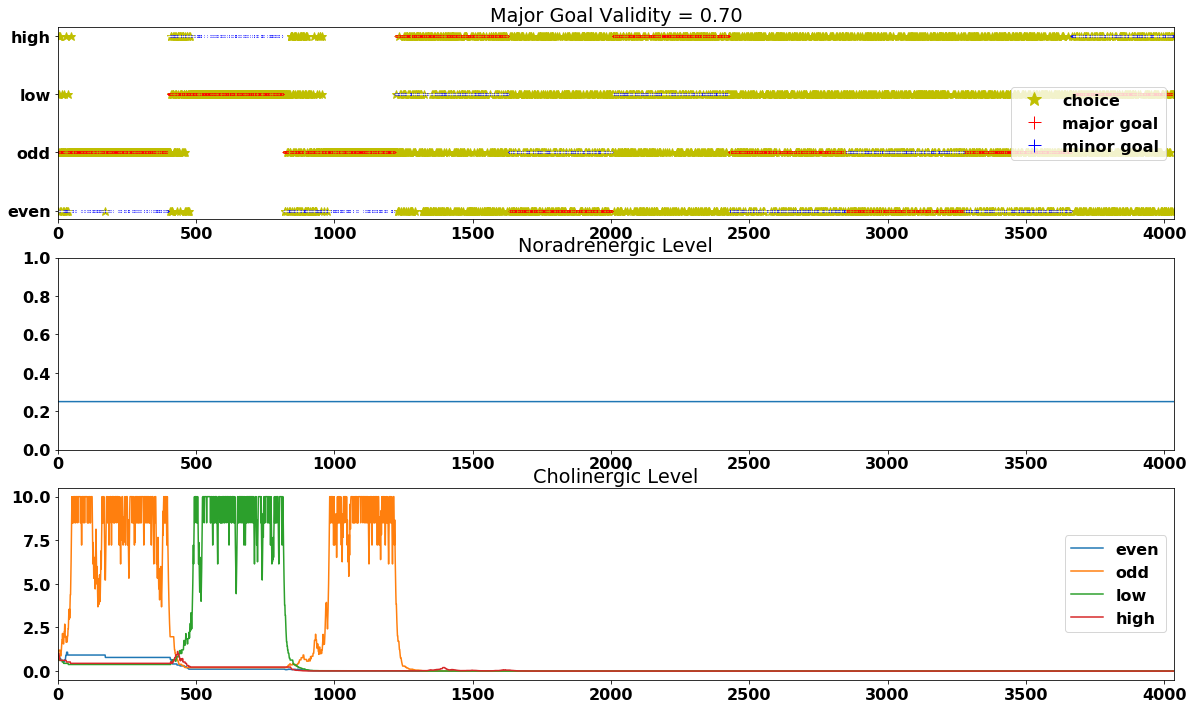

In [76]:
# trialRange+/-30 and two possibly valid cues (5) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_70_5a = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=0.70,ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold, previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=0.70,alterValid=alterValid)


A cue was randomly picked among integers 0~3 (i.e. even, odd, low, high respectively) every 400+/-30 trials for 10 times.
The cue validity was randomly selected among 0.7 in each trial.
A major cue or its alternative is possible for each trial depends on the cue validity.
0/4035 = 0.0% trials occurred when the predicted digit matched the cued digit but the cue was invalid
2858/4035 = 70.8% trials occurred when the predicted digit did not match the cued digit.
    330/4035 trials occurred when the predicted digit did not match the guess-target digit.
    2760/4035 trials occurred when the guess-target digit did not match the cued digit, i.e. when the guessed action was wrong.
909/4035 = 22.5% trials occurred when the predicted digit matches the major cued digit and is valid
268/4035 = 6.6% trials occurred when the predicted digit matches the minor cued digit and is valid
420/4035 = 10.4% trials occurred when the predicted digit matches the major cued digit but is invalidly altered
Lag l

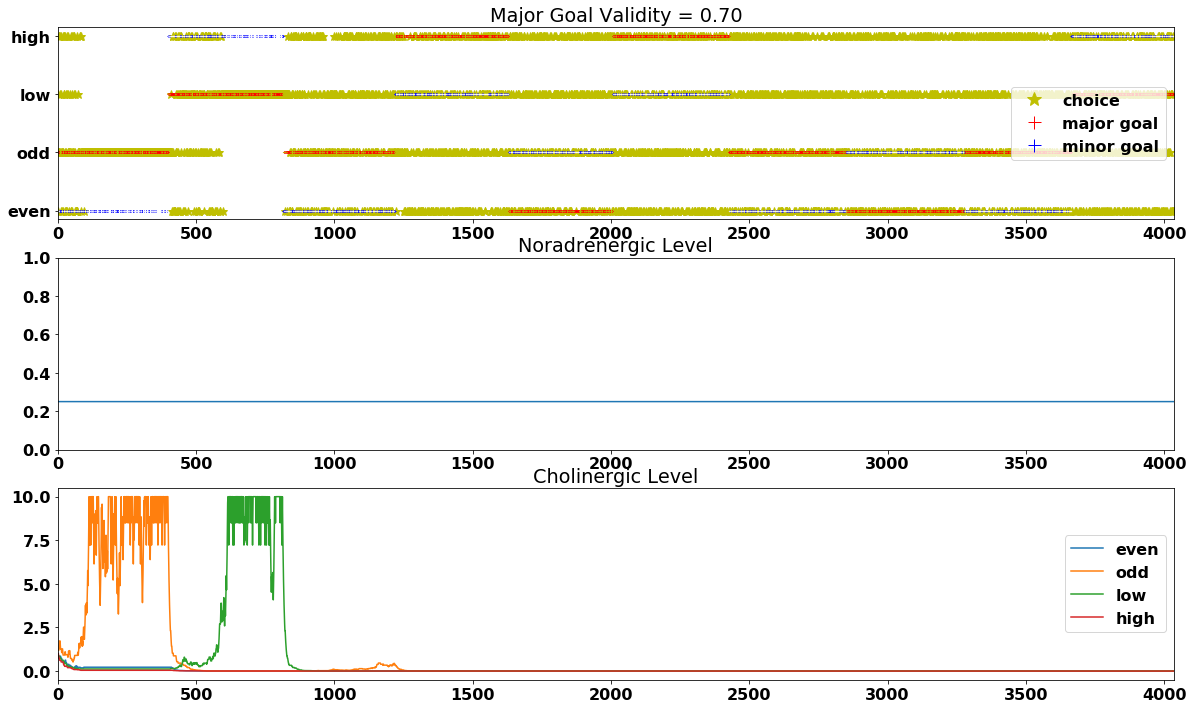

In [77]:
# trialRange+/-30 and two possibly valid cues (6) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_70_6a = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=0.70,ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold, previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=0.70,alterValid=alterValid)


A cue was randomly picked among integers 0~3 (i.e. even, odd, low, high respectively) every 400+/-30 trials for 10 times.
The cue validity was randomly selected among 0.7 in each trial.
A major cue or its alternative is possible for each trial depends on the cue validity.
0/4035 = 0.0% trials occurred when the predicted digit matched the cued digit but the cue was invalid
2878/4035 = 71.3% trials occurred when the predicted digit did not match the cued digit.
    327/4035 trials occurred when the predicted digit did not match the guess-target digit.
    2774/4035 trials occurred when the guess-target digit did not match the cued digit, i.e. when the guessed action was wrong.
929/4035 = 23.0% trials occurred when the predicted digit matches the major cued digit and is valid
228/4035 = 5.7% trials occurred when the predicted digit matches the minor cued digit and is valid
396/4035 = 9.8% trials occurred when the predicted digit matches the major cued digit but is invalidly altered
Lag le

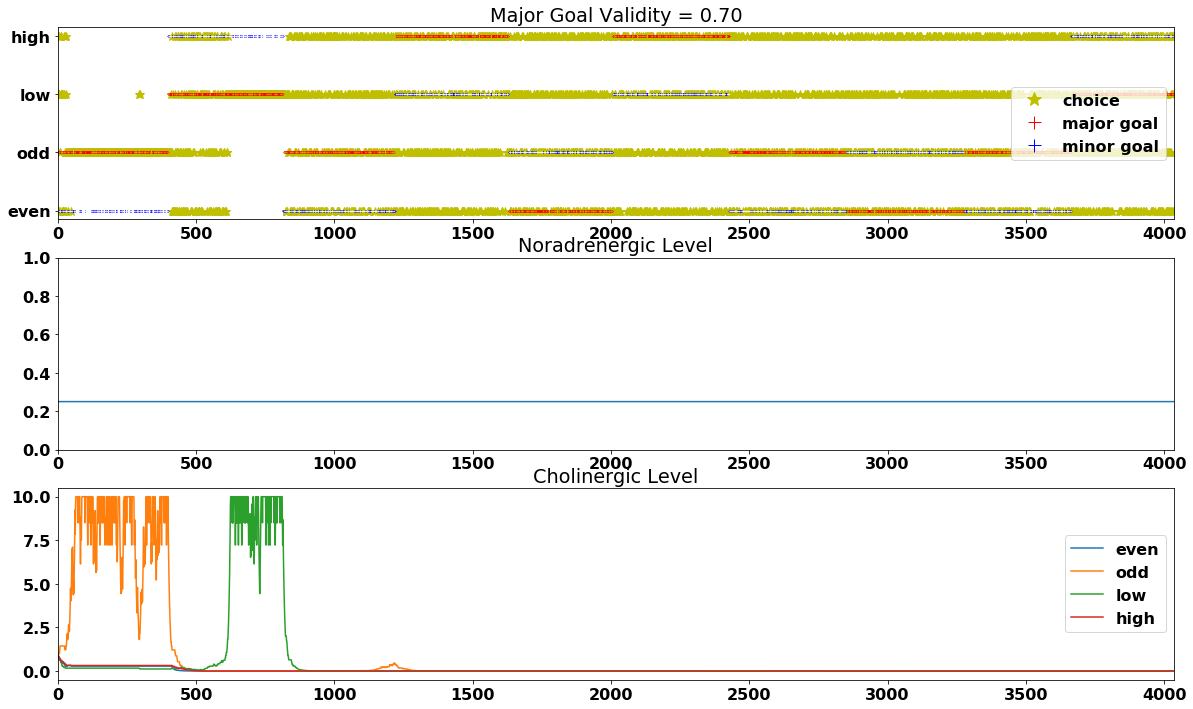

In [78]:
# trialRange+/-30 and two possibly valid cues (7) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_70_7a = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=0.70,ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold, previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=0.70,alterValid=alterValid)


A cue was randomly picked among integers 0~3 (i.e. even, odd, low, high respectively) every 400+/-30 trials for 10 times.
The cue validity was randomly selected among 0.7 in each trial.
A major cue or its alternative is possible for each trial depends on the cue validity.
0/4035 = 0.0% trials occurred when the predicted digit matched the cued digit but the cue was invalid
2910/4035 = 72.1% trials occurred when the predicted digit did not match the cued digit.
    366/4035 trials occurred when the predicted digit did not match the guess-target digit.
    2801/4035 trials occurred when the guess-target digit did not match the cued digit, i.e. when the guessed action was wrong.
901/4035 = 22.3% trials occurred when the predicted digit matches the major cued digit and is valid
224/4035 = 5.6% trials occurred when the predicted digit matches the minor cued digit and is valid
408/4035 = 10.1% trials occurred when the predicted digit matches the major cued digit but is invalidly altered
Lag l

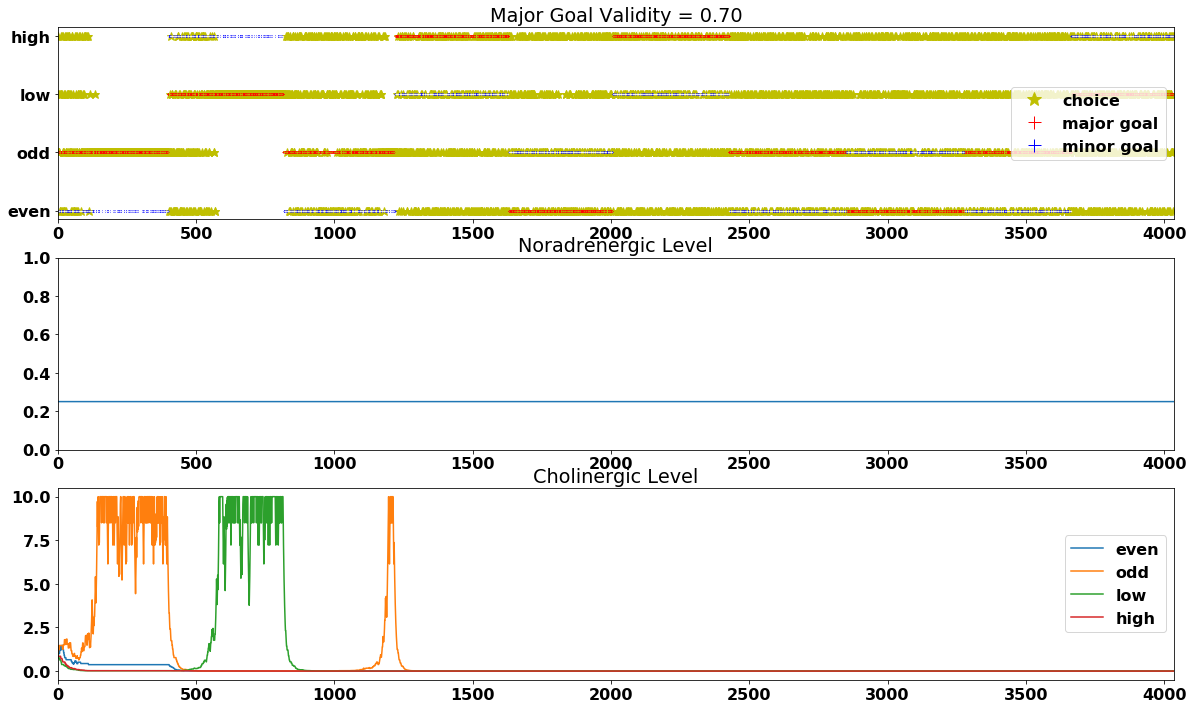

In [79]:
# trialRange+/-30 and two possibly valid cues (8) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_70_8a = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=0.70,ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold, previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=0.70,alterValid=alterValid)


A cue was randomly picked among integers 0~3 (i.e. even, odd, low, high respectively) every 400+/-30 trials for 10 times.
The cue validity was randomly selected among 0.7 in each trial.
A major cue or its alternative is possible for each trial depends on the cue validity.
0/4035 = 0.0% trials occurred when the predicted digit matched the cued digit but the cue was invalid
2854/4035 = 70.7% trials occurred when the predicted digit did not match the cued digit.
    329/4035 trials occurred when the predicted digit did not match the guess-target digit.
    2756/4035 trials occurred when the guess-target digit did not match the cued digit, i.e. when the guessed action was wrong.
952/4035 = 23.6% trials occurred when the predicted digit matches the major cued digit and is valid
229/4035 = 5.7% trials occurred when the predicted digit matches the minor cued digit and is valid
434/4035 = 10.8% trials occurred when the predicted digit matches the major cued digit but is invalidly altered
Lag l

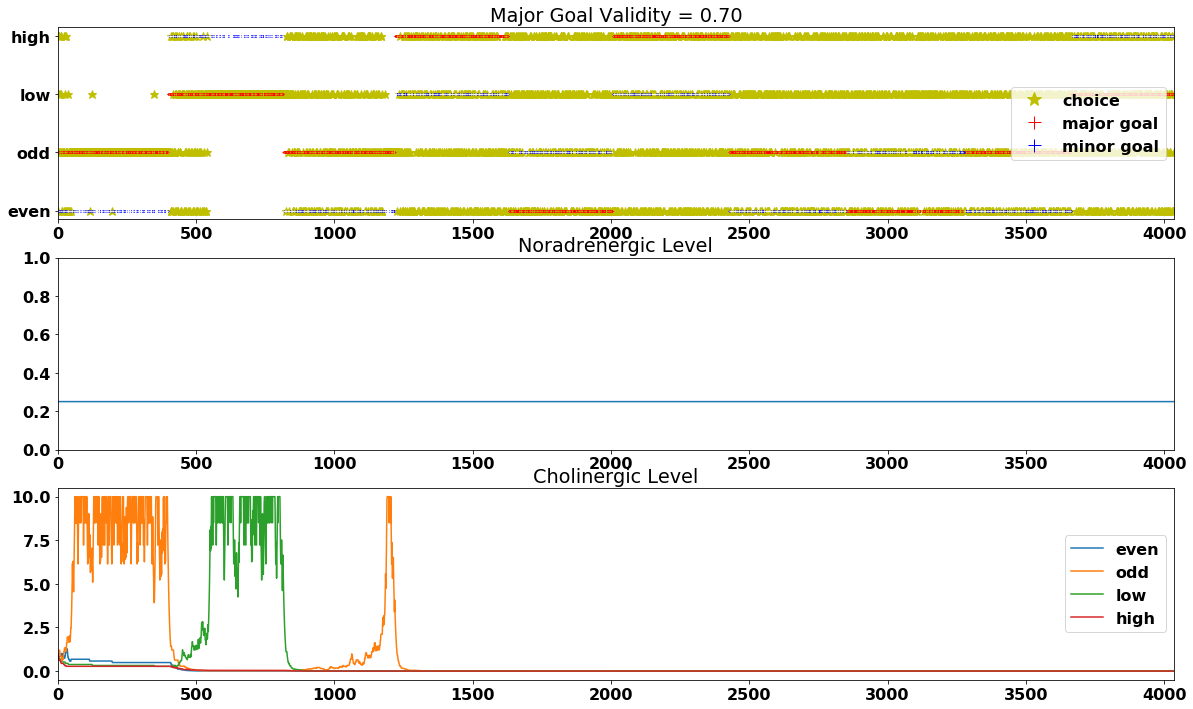

In [80]:
# trialRange+/-30 and two possibly valid cues (9) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_70_9a = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=0.70,ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold, previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=0.70,alterValid=alterValid)


A cue was randomly picked among integers 0~3 (i.e. even, odd, low, high respectively) every 400+/-30 trials for 10 times.
The cue validity was randomly selected among 0.7 in each trial.
A major cue or its alternative is possible for each trial depends on the cue validity.
0/4035 = 0.0% trials occurred when the predicted digit matched the cued digit but the cue was invalid
2696/4035 = 66.8% trials occurred when the predicted digit did not match the cued digit.
    336/4035 trials occurred when the predicted digit did not match the guess-target digit.
    2570/4035 trials occurred when the guess-target digit did not match the cued digit, i.e. when the guessed action was wrong.
1144/4035 = 28.4% trials occurred when the predicted digit matches the major cued digit and is valid
195/4035 = 4.8% trials occurred when the predicted digit matches the minor cued digit and is valid
504/4035 = 12.5% trials occurred when the predicted digit matches the major cued digit but is invalidly altered
Lag 

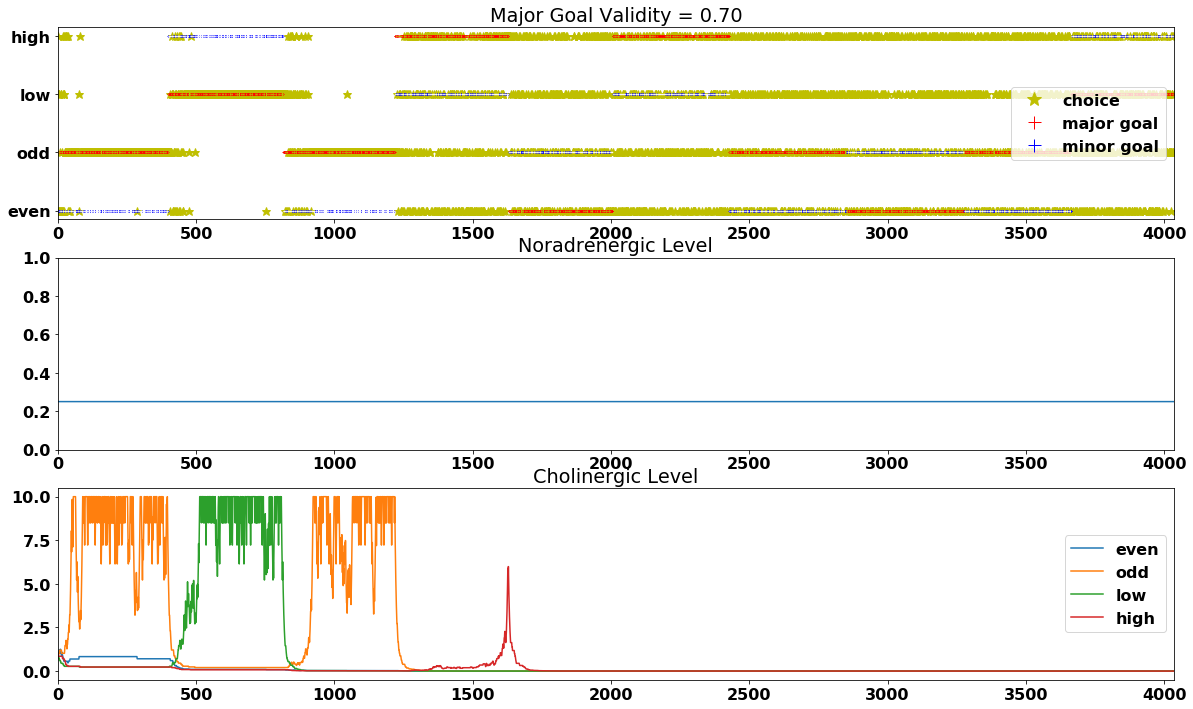

In [81]:
# trialRange+/-30 and two possibly valid cues (10) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_70_10a = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=0.70,ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold, previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=0.70,alterValid=alterValid)


In [82]:
all_70a_case_probs = [all_prob_70_1a,all_prob_70_2a,all_prob_70_3a,all_prob_70_4a,all_prob_70_5a,\
                      all_prob_70_6a,all_prob_70_7a,all_prob_70_8a,all_prob_70_9a,all_prob_70_10a]
averages_70a = average_probs(all_70a_case_probs)


Average lag length is: 337
Average prob pred wrong, prob pred cue A valid, prob pred cue B valid, prob pred cue A invalid,
    prob guess not match cue, prob pred not match guess, prob match cue A invalid alter: 
[0.690260223048327, 0.2553655514250309, 0.05437422552664188, 0.0, 0.6629739776951673, 0.08413878562577447, 0.1088723667905824]


### 4.2.4: validity_choices=[0.99, 0.85, 0.70]

A cue was randomly picked among integers 0~3 (i.e. even, odd, low, high respectively) every 400+/-30 trials for 10 times.
The cue validity was randomly selected among [0.99, 0.85, 0.7] in each trial.
A major cue or its alternative is possible for each trial depends on the cue validity.
0/4035 = 0.0% trials occurred when the predicted digit matched the cued digit but the cue was invalid
2650/4035 = 65.7% trials occurred when the predicted digit did not match the cued digit.
    343/4035 trials occurred when the predicted digit did not match the guess-target digit.
    2548/4035 trials occurred when the guess-target digit did not match the cued digit, i.e. when the guessed action was wrong.
1254/4035 = 31.1% trials occurred when the predicted digit matches the major cued digit and is valid
131/4035 = 3.2% trials occurred when the predicted digit matches the minor cued digit and is valid
267/4035 = 6.6% trials occurred when the predicted digit matches the major cued digit but is invalidly

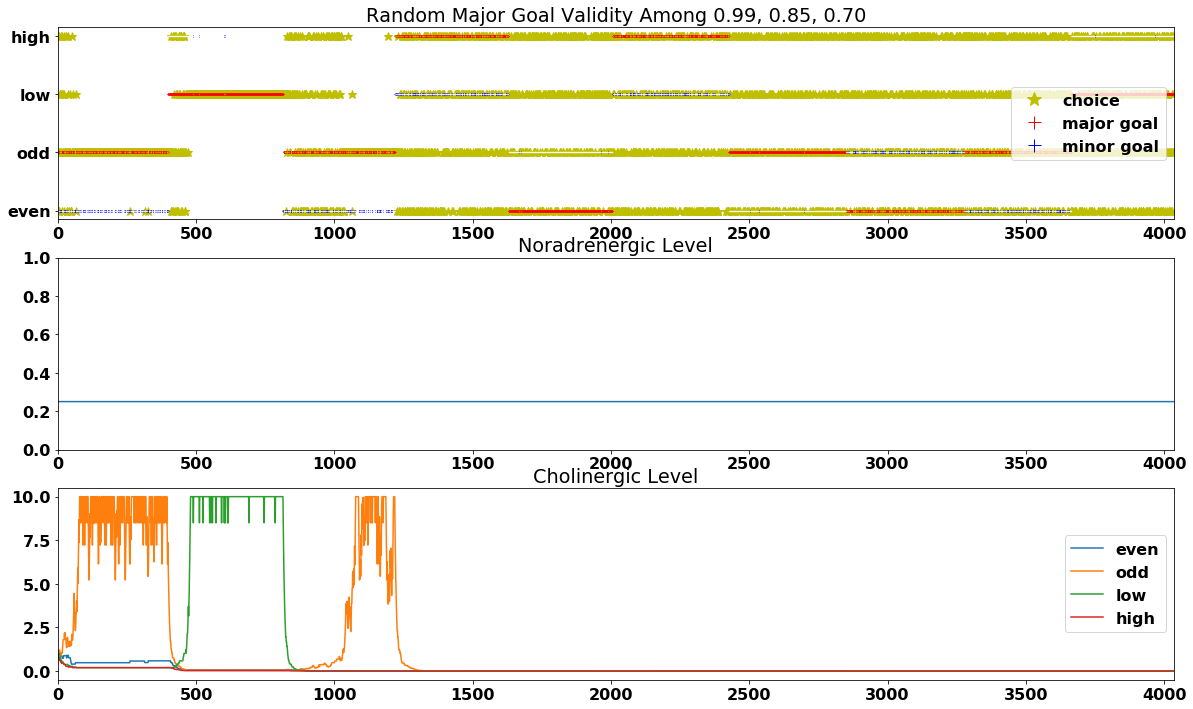

In [83]:
# trialRange+/-30 and two possibly valid cues (1) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_multia_1 = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=[0.99,0.85,0.70],ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold,previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=[0.99,0.85,0.70],alterValid=alterValid)


A cue was randomly picked among integers 0~3 (i.e. even, odd, low, high respectively) every 400+/-30 trials for 10 times.
The cue validity was randomly selected among [0.99, 0.85, 0.7] in each trial.
A major cue or its alternative is possible for each trial depends on the cue validity.
0/4035 = 0.0% trials occurred when the predicted digit matched the cued digit but the cue was invalid
2927/4035 = 72.5% trials occurred when the predicted digit did not match the cued digit.
    382/4035 trials occurred when the predicted digit did not match the guess-target digit.
    2811/4035 trials occurred when the guess-target digit did not match the cued digit, i.e. when the guessed action was wrong.
973/4035 = 24.1% trials occurred when the predicted digit matches the major cued digit and is valid
135/4035 = 3.3% trials occurred when the predicted digit matches the minor cued digit and is valid
265/4035 = 6.6% trials occurred when the predicted digit matches the major cued digit but is invalidly 

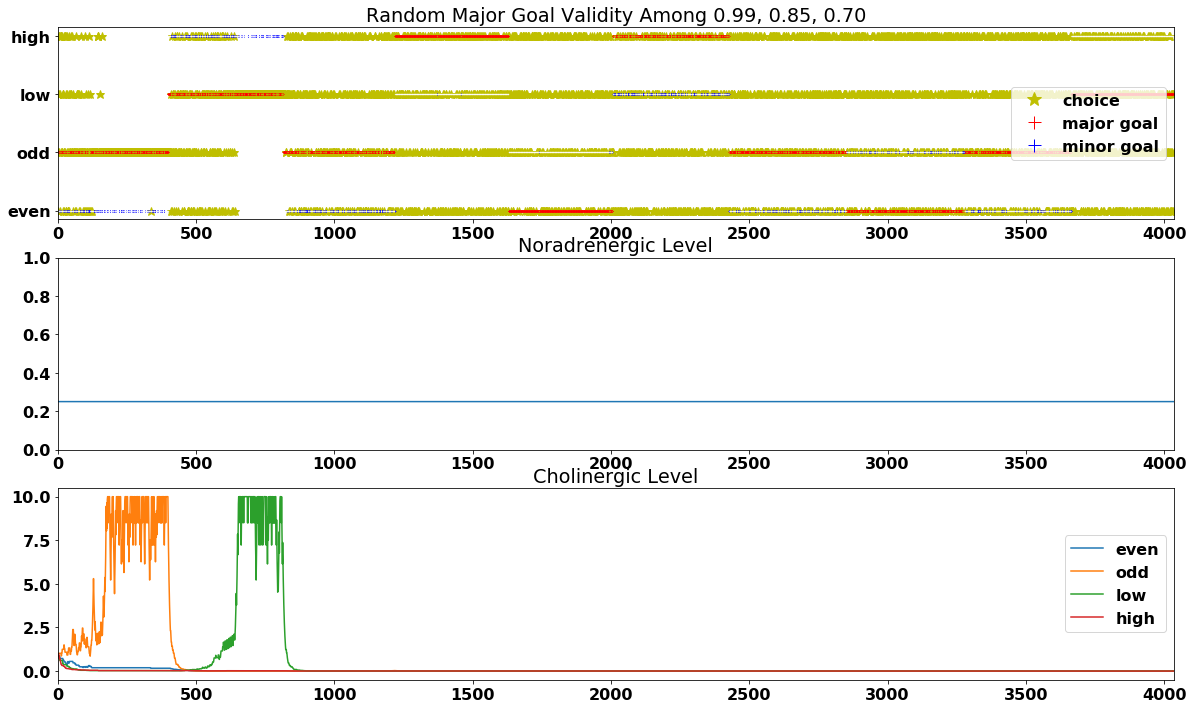

In [84]:
# trialRange+/-30 and two possibly valid cues (2) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_multia_2 = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=[0.99,0.85,0.70],ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold,previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=[0.99,0.85,0.70],alterValid=alterValid)


A cue was randomly picked among integers 0~3 (i.e. even, odd, low, high respectively) every 400+/-30 trials for 10 times.
The cue validity was randomly selected among [0.99, 0.85, 0.7] in each trial.
A major cue or its alternative is possible for each trial depends on the cue validity.
0/4035 = 0.0% trials occurred when the predicted digit matched the cued digit but the cue was invalid
2469/4035 = 61.2% trials occurred when the predicted digit did not match the cued digit.
    305/4035 trials occurred when the predicted digit did not match the guess-target digit.
    2354/4035 trials occurred when the guess-target digit did not match the cued digit, i.e. when the guessed action was wrong.
1430/4035 = 35.4% trials occurred when the predicted digit matches the major cued digit and is valid
136/4035 = 3.4% trials occurred when the predicted digit matches the minor cued digit and is valid
287/4035 = 7.1% trials occurred when the predicted digit matches the major cued digit but is invalidly

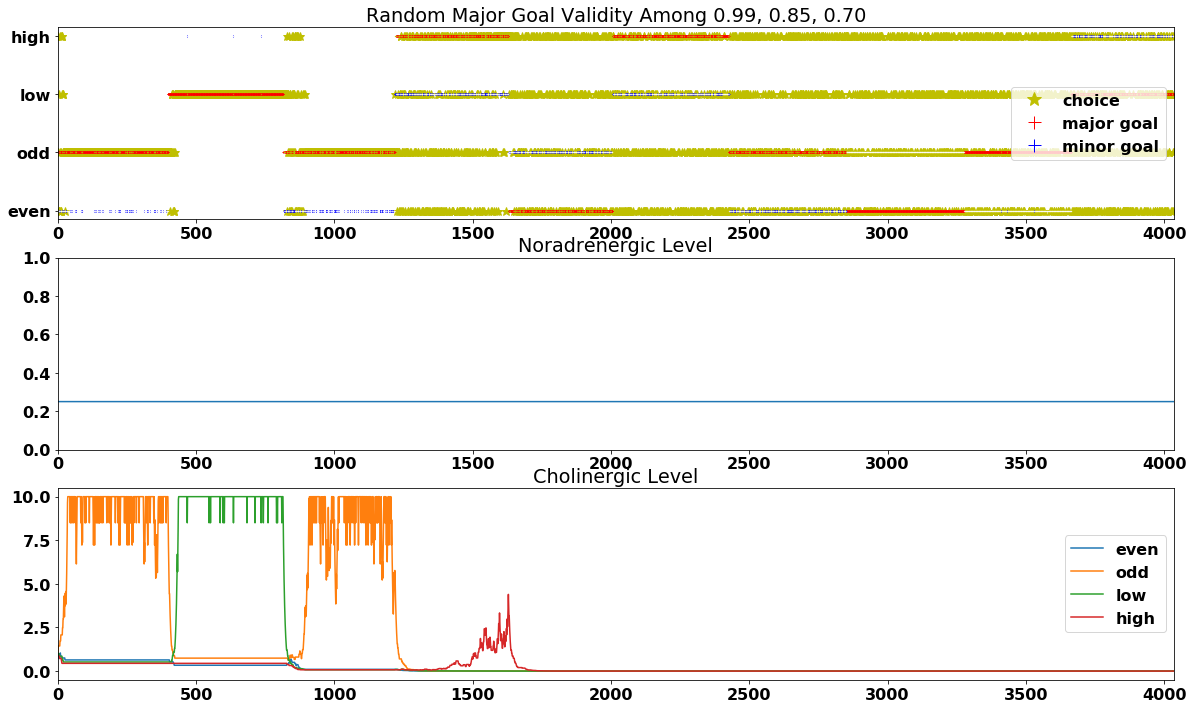

In [85]:
# trialRange+/-30 and two possibly valid cues (3) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_multia_3 = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=[0.99,0.85,0.70],ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold,previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=[0.99,0.85,0.70],alterValid=alterValid)


A cue was randomly picked among integers 0~3 (i.e. even, odd, low, high respectively) every 400+/-30 trials for 10 times.
The cue validity was randomly selected among [0.99, 0.85, 0.7] in each trial.
A major cue or its alternative is possible for each trial depends on the cue validity.
0/4035 = 0.0% trials occurred when the predicted digit matched the cued digit but the cue was invalid
2131/4035 = 52.8% trials occurred when the predicted digit did not match the cued digit.
    392/4035 trials occurred when the predicted digit did not match the guess-target digit.
    1921/4035 trials occurred when the guess-target digit did not match the cued digit, i.e. when the guessed action was wrong.
1837/4035 = 45.5% trials occurred when the predicted digit matches the major cued digit and is valid
67/4035 = 1.7% trials occurred when the predicted digit matches the minor cued digit and is valid
345/4035 = 8.6% trials occurred when the predicted digit matches the major cued digit but is invalidly 

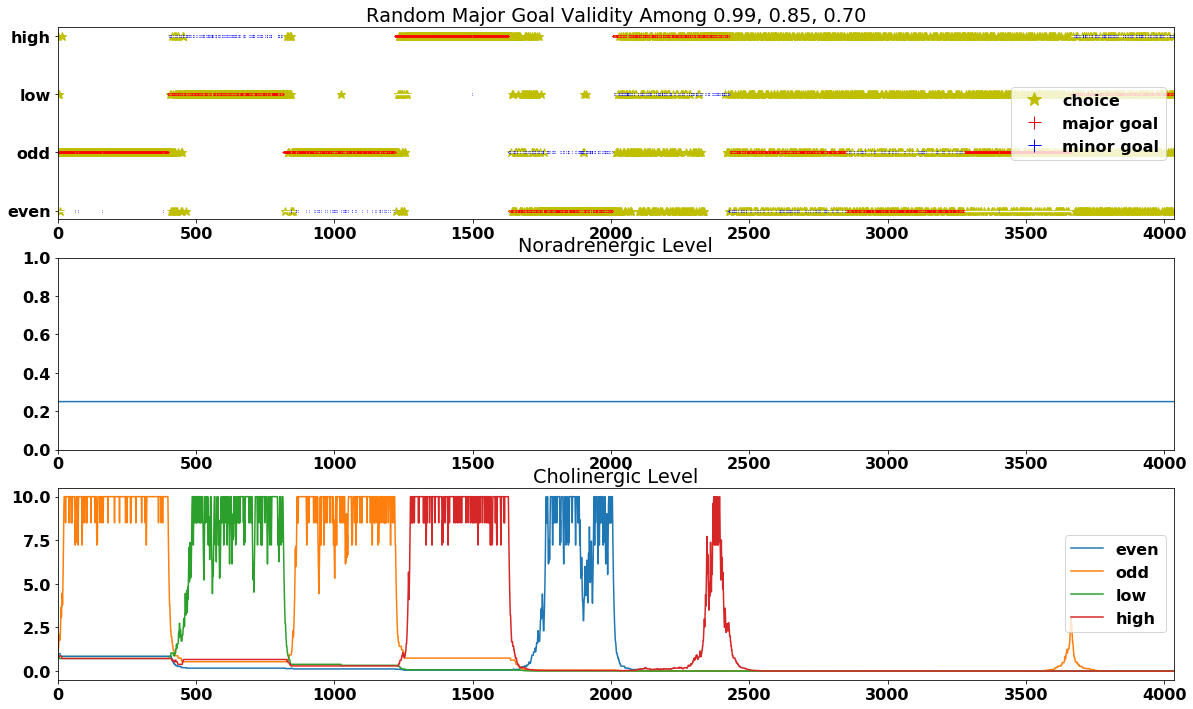

In [86]:
# trialRange+/-30 and two possibly valid cues (4) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_multia_4 = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=[0.99,0.85,0.70],ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold,previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=[0.99,0.85,0.70],alterValid=alterValid)


A cue was randomly picked among integers 0~3 (i.e. even, odd, low, high respectively) every 400+/-30 trials for 10 times.
The cue validity was randomly selected among [0.99, 0.85, 0.7] in each trial.
A major cue or its alternative is possible for each trial depends on the cue validity.
0/4035 = 0.0% trials occurred when the predicted digit matched the cued digit but the cue was invalid
2346/4035 = 58.1% trials occurred when the predicted digit did not match the cued digit.
    400/4035 trials occurred when the predicted digit did not match the guess-target digit.
    2177/4035 trials occurred when the guess-target digit did not match the cued digit, i.e. when the guessed action was wrong.
1561/4035 = 38.7% trials occurred when the predicted digit matches the major cued digit and is valid
128/4035 = 3.2% trials occurred when the predicted digit matches the minor cued digit and is valid
246/4035 = 6.1% trials occurred when the predicted digit matches the major cued digit but is invalidly

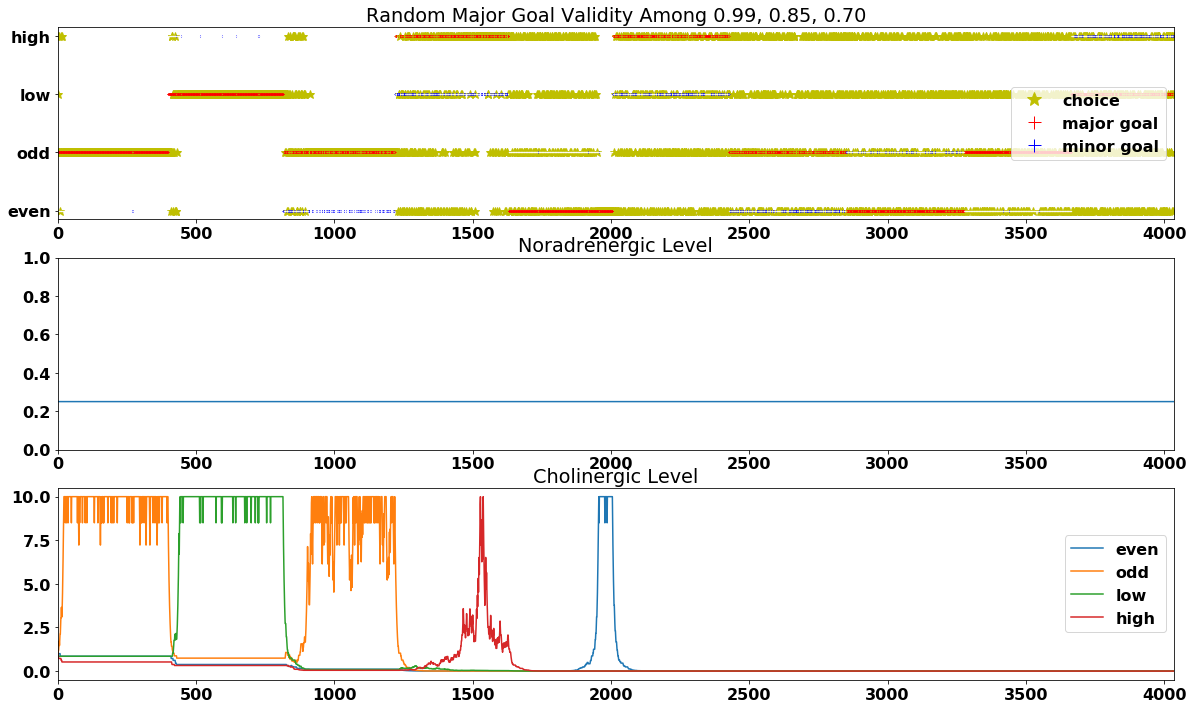

In [87]:
# trialRange+/-30 and two possibly valid cues (5) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_multia_5 = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=[0.99,0.85,0.70],ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold,previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=[0.99,0.85,0.70],alterValid=alterValid)


A cue was randomly picked among integers 0~3 (i.e. even, odd, low, high respectively) every 400+/-30 trials for 10 times.
The cue validity was randomly selected among [0.99, 0.85, 0.7] in each trial.
A major cue or its alternative is possible for each trial depends on the cue validity.
0/4035 = 0.0% trials occurred when the predicted digit matched the cued digit but the cue was invalid
2617/4035 = 64.9% trials occurred when the predicted digit did not match the cued digit.
    368/4035 trials occurred when the predicted digit did not match the guess-target digit.
    2455/4035 trials occurred when the guess-target digit did not match the cued digit, i.e. when the guessed action was wrong.
1272/4035 = 31.5% trials occurred when the predicted digit matches the major cued digit and is valid
146/4035 = 3.6% trials occurred when the predicted digit matches the minor cued digit and is valid
335/4035 = 8.3% trials occurred when the predicted digit matches the major cued digit but is invalidly

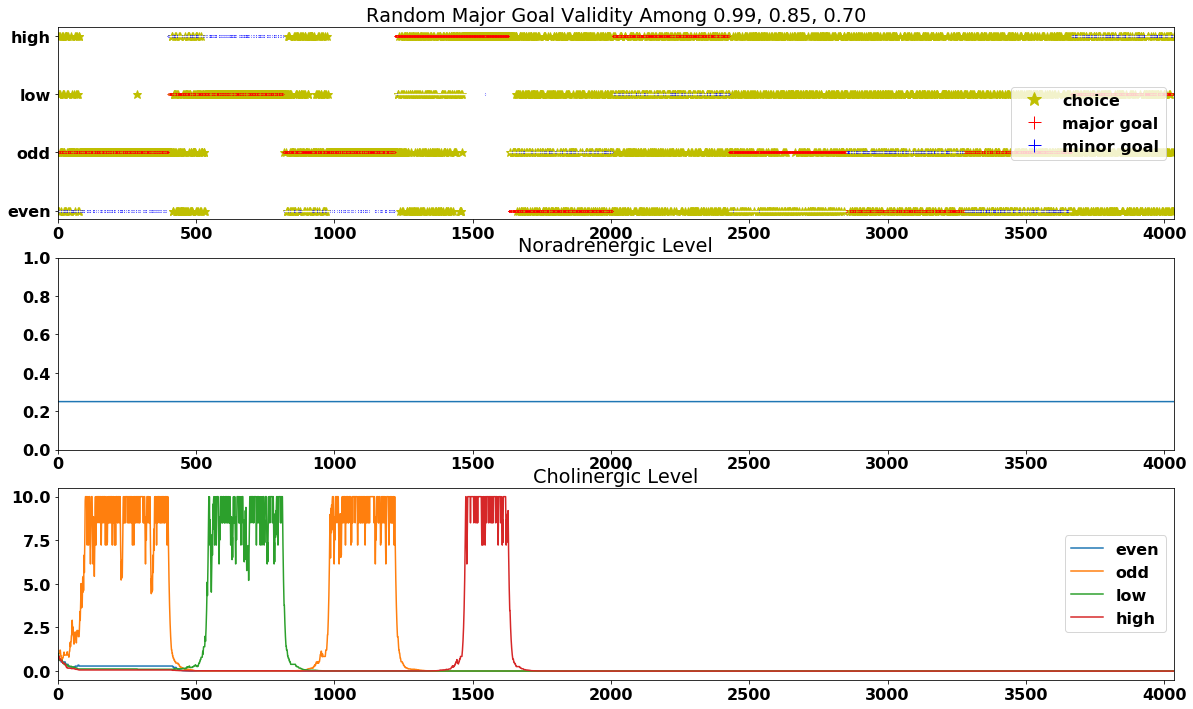

In [88]:
# trialRange+/-30 and two possibly valid cues (6) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_multia_6 = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=[0.99,0.85,0.70],ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold,previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=[0.99,0.85,0.70],alterValid=alterValid)


A cue was randomly picked among integers 0~3 (i.e. even, odd, low, high respectively) every 400+/-30 trials for 10 times.
The cue validity was randomly selected among [0.99, 0.85, 0.7] in each trial.
A major cue or its alternative is possible for each trial depends on the cue validity.
0/4035 = 0.0% trials occurred when the predicted digit matched the cued digit but the cue was invalid
2080/4035 = 51.5% trials occurred when the predicted digit did not match the cued digit.
    356/4035 trials occurred when the predicted digit did not match the guess-target digit.
    1883/4035 trials occurred when the guess-target digit did not match the cued digit, i.e. when the guessed action was wrong.
1915/4035 = 47.5% trials occurred when the predicted digit matches the major cued digit and is valid
40/4035 = 1.0% trials occurred when the predicted digit matches the minor cued digit and is valid
233/4035 = 5.8% trials occurred when the predicted digit matches the major cued digit but is invalidly 

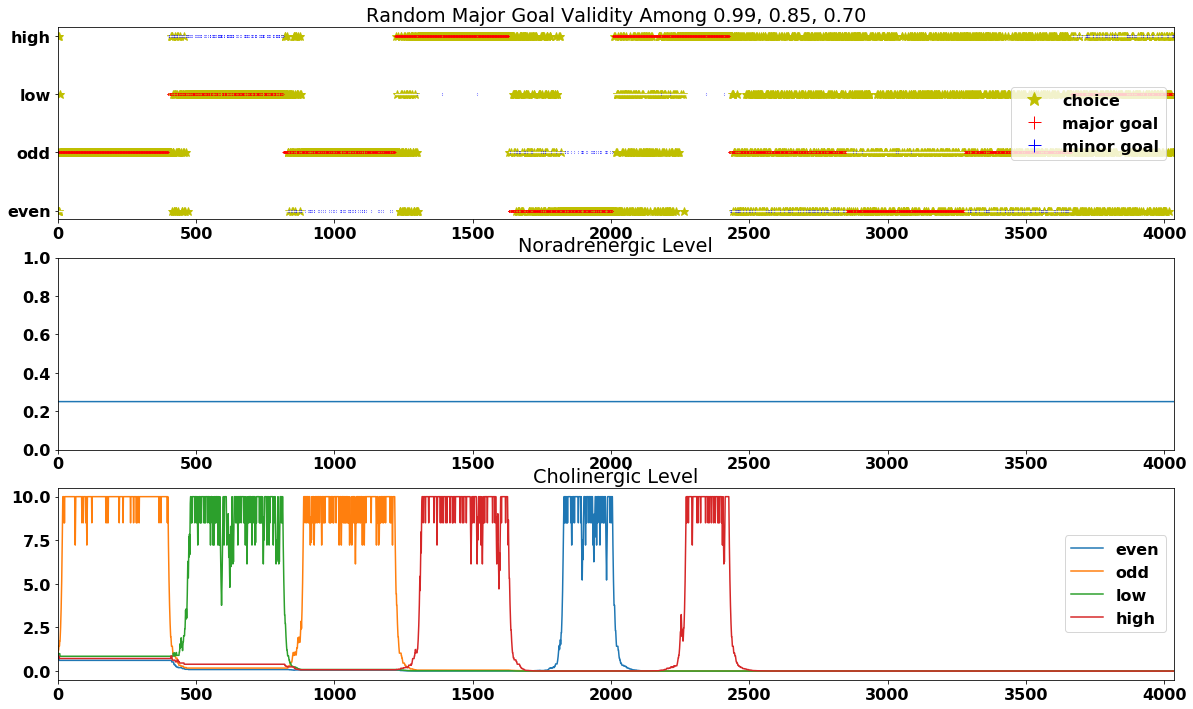

In [89]:
# trialRange+/-30 and two possibly valid cues (7) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_multia_7 = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=[0.99,0.85,0.70],ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold,previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=[0.99,0.85,0.70],alterValid=alterValid)


A cue was randomly picked among integers 0~3 (i.e. even, odd, low, high respectively) every 400+/-30 trials for 10 times.
The cue validity was randomly selected among [0.99, 0.85, 0.7] in each trial.
A major cue or its alternative is possible for each trial depends on the cue validity.
0/4035 = 0.0% trials occurred when the predicted digit matched the cued digit but the cue was invalid
2317/4035 = 57.4% trials occurred when the predicted digit did not match the cued digit.
    317/4035 trials occurred when the predicted digit did not match the guess-target digit.
    2173/4035 trials occurred when the guess-target digit did not match the cued digit, i.e. when the guessed action was wrong.
1663/4035 = 41.2% trials occurred when the predicted digit matches the major cued digit and is valid
55/4035 = 1.4% trials occurred when the predicted digit matches the minor cued digit and is valid
250/4035 = 6.2% trials occurred when the predicted digit matches the major cued digit but is invalidly 

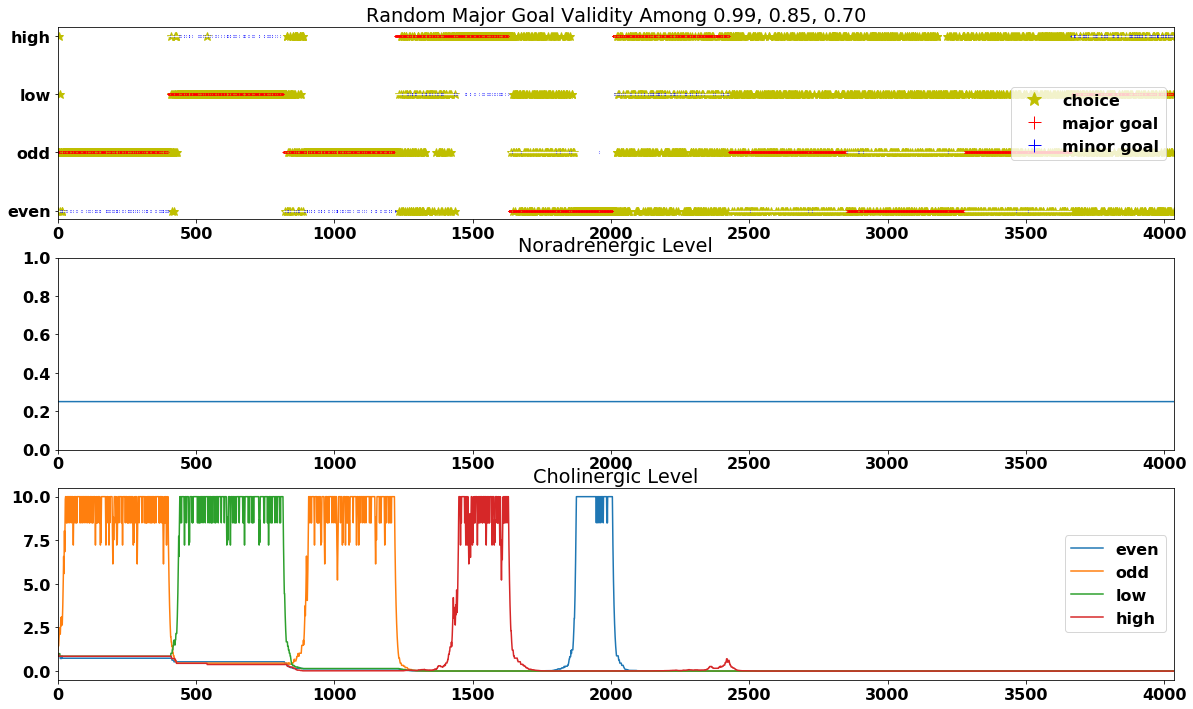

In [90]:
# trialRange+/-30 and two possibly valid cues (8) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_multia_8 = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=[0.99,0.85,0.70],ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold,previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=[0.99,0.85,0.70],alterValid=alterValid)


A cue was randomly picked among integers 0~3 (i.e. even, odd, low, high respectively) every 400+/-30 trials for 10 times.
The cue validity was randomly selected among [0.99, 0.85, 0.7] in each trial.
A major cue or its alternative is possible for each trial depends on the cue validity.
0/4035 = 0.0% trials occurred when the predicted digit matched the cued digit but the cue was invalid
1783/4035 = 44.2% trials occurred when the predicted digit did not match the cued digit.
    404/4035 trials occurred when the predicted digit did not match the guess-target digit.
    1501/4035 trials occurred when the guess-target digit did not match the cued digit, i.e. when the guessed action was wrong.
2214/4035 = 54.9% trials occurred when the predicted digit matches the major cued digit and is valid
38/4035 = 0.9% trials occurred when the predicted digit matches the minor cued digit and is valid
194/4035 = 4.8% trials occurred when the predicted digit matches the major cued digit but is invalidly 

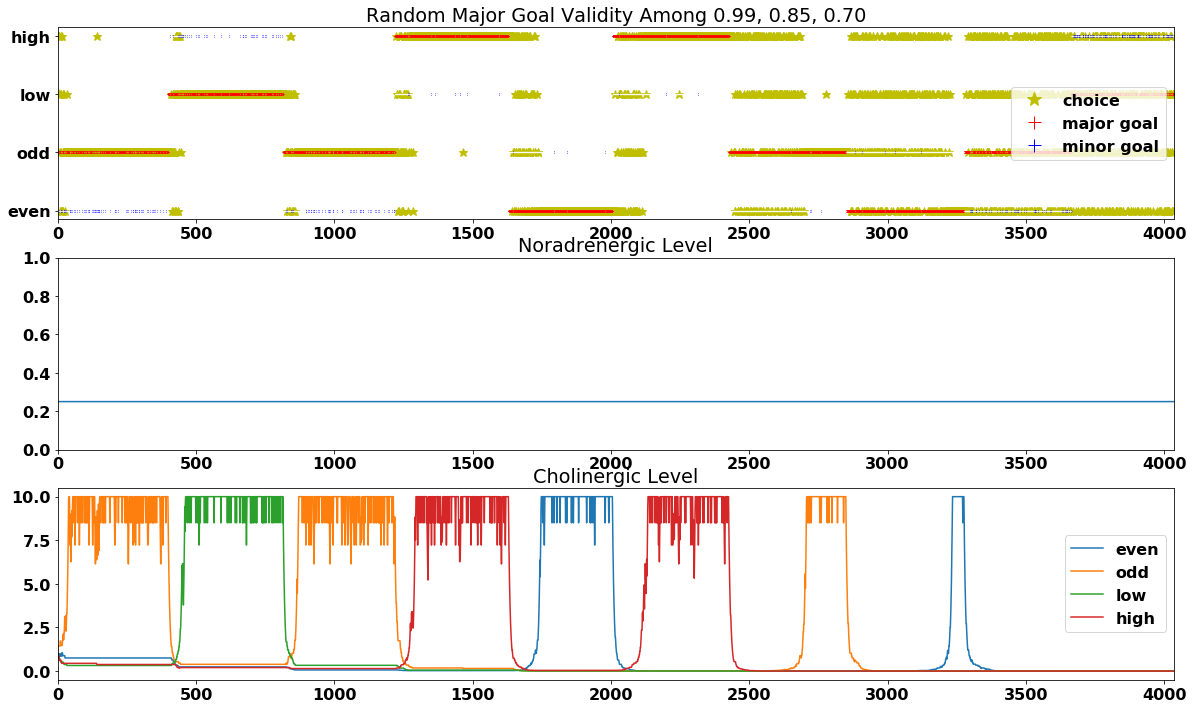

In [91]:
# trialRange+/-30 and two possibly valid cues (9) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_multia_9 = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=[0.99,0.85,0.70],ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold,previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=[0.99,0.85,0.70],alterValid=alterValid)


A cue was randomly picked among integers 0~3 (i.e. even, odd, low, high respectively) every 400+/-30 trials for 10 times.
The cue validity was randomly selected among [0.99, 0.85, 0.7] in each trial.
A major cue or its alternative is possible for each trial depends on the cue validity.
0/4035 = 0.0% trials occurred when the predicted digit matched the cued digit but the cue was invalid
2784/4035 = 69.0% trials occurred when the predicted digit did not match the cued digit.
    358/4035 trials occurred when the predicted digit did not match the guess-target digit.
    2669/4035 trials occurred when the guess-target digit did not match the cued digit, i.e. when the guessed action was wrong.
1111/4035 = 27.5% trials occurred when the predicted digit matches the major cued digit and is valid
140/4035 = 3.5% trials occurred when the predicted digit matches the minor cued digit and is valid
263/4035 = 6.5% trials occurred when the predicted digit matches the major cued digit but is invalidly

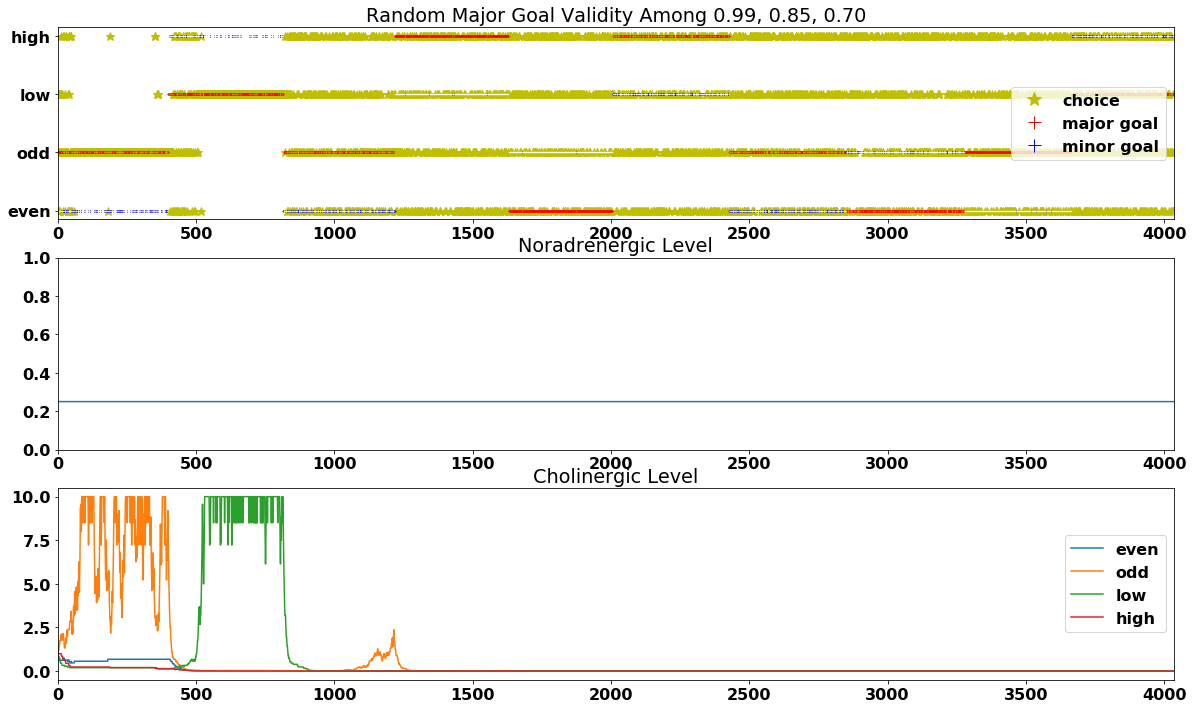

In [92]:
# trialRange+/-30 and two possibly valid cues (10) 
model_copy = copy.deepcopy(model)
correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, all_prob_multia_10 = MNIST_uncertainty_task(model_copy,dataloader,validity_choices=[0.99,0.85,0.70],ACH_CORRECT=ACH_CORRECT,ACH_INCORRECT=ACH_INCORRECT,NE_INCORRECT=NE_INCORRECT,NE_CORRECT=NE_CORRECT,trialRange=trialRange,trialInterval=trialInterval,alterValid=alterValid,num_considered=num_considered,num_threshold=num_threshold,previous_intervals=all_prob_99_1[1],previous_cues=all_prob_99_1[2],hasAChLesion=hasAChLesion,hasNELesion=hasNELesion)
plot_MNIST_uncertainty(correct, choice, ach_level, ach_avg_level, ne_level, correct_lbl, acts_prob, validity_choices=[0.99,0.85,0.70],alterValid=alterValid)


In [93]:
all_multia_case_probs = [all_prob_multia_1,all_prob_multia_2,all_prob_multia_3,all_prob_multia_4,all_prob_multia_5,\
                         all_prob_multia_6,all_prob_multia_7,all_prob_multia_8,all_prob_multia_9,all_prob_multia_10]
averages_multia = average_probs(all_multia_case_probs)


Average lag length is: 284
Average prob pred wrong, prob pred cue A valid, prob pred cue B valid, prob pred cue A invalid,
    prob guess not match cue, prob pred not match guess, prob match cue A invalid alter: 
[0.5973729863692689, 0.3774473358116481, 0.025179677819083025, 0.0, 0.5574225526641883, 0.08983890954151177, 0.06654275092936804]


plt.plot(np.arange(len(choice)),choice,'y*',markersize=9) #'y*',markersize=8
    plt.plot(ind_cue1,correct[ind_cue1],'r+',markersize=2) #'r+',markersize=1
    plt.plot(ind_cue2,correct[ind_cue2],'b+',markersize=2) #'b+',markersize=3
    if alterValid:
        alter = np.array([crt+1 if crt%2==0 else crt-1 for crt in correct.tolist()])
        plt.plot(ind_cue1,alter[ind_cue1],'w.',markersize=0.5)#1
        plt.plot(ind_cue2,alter[ind_cue2],'y.',markersize=0.5)#1
    plt.xlim(0,len(correct))